# 1. 서론

## 1.1. 분석 주제

- 국내 채용시장 및 채용 플랫폼 이용패턴 분석

## 1.2 분석 목표

- 고객 만족도와 플랫폼의 장기수익성 향상을 위한 신규 회원 분석 및 맞춤형 전략을 제시하는 것입니다.

# 2. 분석 환경 준비

## 2.1. 분석 환경 설정

In [ ]:
# 라이브러리 불러오기
!pip install koreanize_matplotlib -q
!pip install statsmodels -q
!pip install konlpy -q
!pip install mecab-python3 -q


import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
from matplotlib import rc
import numpy as np
import koreanize_matplotlib
import warnings
import seaborn as sns
import scipy.stats as stats
import statsmodels.api as sm
from konlpy.tag import Okt
import MeCab
from datetime import timedelta
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from datetime import timedelta
from collections import Counter

warnings.simplefilter(action='ignore')

%config InlineBackend.figure_format = 'retina'

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## 2.2 데이터 수집

### 2.2.1 2022-2023년 국내 채용서비스 Log 데이터

- 데이터 정의

|index|변수명|데이터유형|설명|예시|
|-----|------|----------|----|----|
|1 |user_uuid |object |유저를 고유하게 식별할 수 있는 ID (UUID 형식) |fd4912c6-8e1b-463b-afca-b8c34b18acbd
|2 |URL |object |유저가 접근한 페이지 경로 또는 행동 로그를 나타내는 URL |signup/detail
|3 |timestamp |datetime |유저의 행동이 발생한 정확한 일시 (시간까지 포함됨) |2022-01-01 01:57:13
|4 |date |datetime |유저 행동이 발생한 날짜 |2022-01-01
|5 |response_code |int |서버 응답 상태 코드 |302
|6 |method |object |	HTTP 요청 방식 |GET

데이터 불러오기
- 본 분석에서는



In [ ]:
# 2022년 로그 데이터 불러오기
path1 = '/content/drive/MyDrive/코드잇_데이터분석_6기/중급1 프로젝트/주제 1. 국내 채용시장 및 채용 플랫폼 이용패턴 분석/log_2022.csv'
log_22 = pd.read_csv(path1, index_col=0)

In [ ]:
# 2023년 로그 데이터 불러오기
path2 = '/content/drive/MyDrive/코드잇_데이터분석_6기/중급1 프로젝트/주제 1. 국내 채용시장 및 채용 플랫폼 이용패턴 분석/log_2023.csv'
log_23 = pd.read_csv(path2, index_col=0)

### 2.2.2. 국내 채용서비스 Application 데이터

- 데이터 정의

|index|변수명|데이터유형|설명|예시|
|-----|------|----------|----|----|
|1 | cdate |int |지원서 제출이 발생한 정확한 일시 |2017-02-25 23:45:01
|2 |company_uuid |object |회사를 고유하게 식별할 수 있는 ID (UUID 형식) |de4b3596-b4ab-47cd-b8ea-6f9e14170064
|3 |job_uuid |object |채용공고를 고유하게 식별할 수 있는 ID (UUID 형식) |459e461d-a571-4ed3-8751-8f4cb5b9ff37
|4 |user_uuid |obejct |유저를 고유하게 식별할 수 있는 ID (UUID 형식) |b0329bd7-fc45-4e83-993a-b73bd9d3549c
|5 |application_uuid |object |지원서를 고유하게 식별할 수 있는 ID (UUID 형식) |59c42363-f764-4cbd-aafd-20eb663ea5d7

데이터 불러오기
- 본 분석에서는

In [ ]:
# application 데이터 불러오기
path3 = '/content/drive/MyDrive/코드잇_데이터분석_6기/중급1 프로젝트/주제 1. 국내 채용시장 및 채용 플랫폼 이용패턴 분석/Application.csv'
application = pd.read_csv(path3)

In [ ]:
# 결과 확인
application

Unnamed: 0                       cdate  \
0                0         2017-02-25 23:45:01   
1                1  2020-11-23 14:46:07.329731   
2                2  2017-10-28 22:30:10.631568   
3                3  2017-07-03 17:40:05.317255   
4                4         2017-02-10 10:53:39   
...            ...                         ...   
340725      340725  2021-05-09 16:48:46.908545   
340726      340726  2022-03-20 22:21:29.175182   
340727      340727  2022-04-07 09:41:05.036134   
340728      340728  2022-07-15 04:22:09.138346   
340729      340729  2023-07-10 10:02:03.071155   

                                company_uuid  \
0       de4b3596-b4ab-47cd-b8ea-6f9e14170064   
1       f6156b12-d4d7-469f-84be-31799c765211   
2       2ed05b18-c735-474a-9faa-02095b25729a   
3       3d6730ee-b869-47b7-90c6-1e074e4eb15b   
4       de4b3596-b4ab-47cd-b8ea-6f9e14170064   
...                                      ...   
340725  214c0ee9-4fc9-46be-ba8a-2a0368510e80   
340726  214c0ee9-4fc9-46be-ba8a-2a0368510e80   
340727  565e7499-1070-49c5-a3b9-a27e5ca27a9e   
340728  79d4e2b6-e8df-4605-9c2c-b00e73698b61   
340729  1bf63e7b-f705-48ed-8958-a66508437d53   

                                    job_uuid  \
0       459e461d-a571-4ed3-8751-8f4cb5b9ff37   
1       e5ed4f4a-08aa-4f2d-9042-1e9bbd36803f   
2       0f636d7a-53f7-485e-8a08-33253ddab380   
3       3cade56a-6354-411a-82a6-f2c7774539c1   
4       459e461d-a571-4ed3-8751-8f4cb5b9ff37   
...                                      ...   
340725  201fda38-4fbd-4541-aa27-c0a529e26c83   
340726  a82d7bd3-87ee-4eaf-9519-1b60a331a474   
340727  744ab632-8193-406a-bd51-3e2c9ddd4544   
340728  5faf63f9-848e-4286-a07c-992c0883115d   
340729  87cc225b-35b3-4105-8924-69e4fa678cda   

                                   user_uuid  \
0       b0329bd7-fc45-4e83-993a-b73bd9d3549c   
1       b0329bd7-fc45-4e83-993a-b73bd9d3549c   
2       b0329bd7-fc45-4e83-993a-b73bd9d3549c   
3       b0329bd7-fc45-4e83-993a-b73bd9d3549c   
4       a7593a15-b93e-4bc3-91bf-e4074c931d33   
...                                      ...   
340725  e5cb061e-3ca1-438a-8eb2-e50bd4f133e0   
340726  dc1fb548-59dd-47bc-82aa-99d92e70f793   
340727  1e311075-359d-40fd-b606-f74cb1819499   
340728  7ba43545-bf1c-465e-8996-e55231b020c6   
340729  f8ba6181-f53d-4d78-a0ea-f8a0eb84321f   

                            application_uuid  
0       59c42363-f764-4cbd-aafd-20eb663ea5d7  
1       425db0e8-87f8-4b4d-8248-7f24c31d49d3  
2       be4d9e85-dc53-4e70-90af-64d2d6b117d2  
3       d43879d1-c424-4192-9eae-4537fa6687cb  
4       61873fd7-f075-44c0-90fe-f6521226550d  
...                                      ...  
340725  ecd4d247-8e03-4830-a4e8-c1ecb68ddf74  
340726  0ab0adef-da09-4381-baf7-a3fb017c19ea  
340727  bbd1050f-3729-45d9-8404-c8ad75dc5131  
340728  43107da9-ff4d-4e62-9dd2-1b2df5a9ae78  
340729  6c6fc132-80a2-4322-8d71-90a376f52bd7  

[340730 rows x 6 columns]

# 3. 데이터 전처리

## 3.1. 결측치 처리

- 로그데이터는 URL에 결측치가 존재하기에 결측치를 제거합니다.

In [ ]:
log_22.isnull().sum()

user_uuid             0
URL              369434
timestamp             0
date                  0
response_code         0
method                0
dtype: int64

In [ ]:
log_23.isnull().sum()

user_uuid             0
URL              274722
timestamp             0
date                  0
response_code         0
method                0
dtype: int64

In [ ]:
# NA 값 제거
log_22.dropna(inplace=True)
log_23.dropna(inplace=True)

In [ ]:
application.isnull().sum()

Unnamed: 0          0
cdate               0
company_uuid        0
job_uuid            0
user_uuid           0
application_uuid    0
dtype: int64

## 3.2. log action type 분류

- `URL`에서 나타난 값들을 분석하여 action 타입 할당

In [ ]:
# 'apply'가 포함된 URL 중에서 '?' 뒤에 'apply'가 포함된 경우 필터링

def apply_after_question_mark(url):
    if pd.isna(url):
        return False
    parts = url.split('?', 1)
    # '?' 뒤 부분이 있고, 그 부분에 'apply' 포함 여부 검사
    return len(parts) == 2 and 'apply' in parts[1]

# 필터링
filtered_df = log_22[log_22['URL'].apply(apply_after_question_mark)]

# 개수 출력
print(len(filtered_df))

# URL에서 쿼리 파라미터 제거 및 정리
log_22[['cleaned_URL', 'query_params']] = log_22['URL'].str.split('?', expand=True)
log_23[['cleaned_URL', 'query_params']] = log_23['URL'].str.split('?', expand=True)
# 명사 추출 함수
def extract_nouns(url):
    okt = Okt()
    # URL에서 '/'를 기준으로 분리하고, 각 부분에서 명사 추출
    nouns = []
    for part in url.split('/'):
        nouns.extend(okt.nouns(part))
    return ' '.join(nouns)

186039


In [ ]:
def classify_action(cleaned_URL, method=None):

    # 1. 결측값 및 문자열 정제
    if pd.isna(cleaned_URL):
        return '빈 URL'

    cleaned_URL = str(cleaned_URL).lower().strip()
    if cleaned_URL == '':
        return '빈 URL'

    # 2. method 정제 (대소문자, 공백 포함 가능성 대응)
    if method:
        method = str(method).strip().lower()

    # 3. 회원가입 관련
    if 'signup' in cleaned_URL and 'done' in cleaned_URL:
        return '회원가입완료'
    elif 'signup' in cleaned_URL:
        return '회원가입 페이지 진입'

    # 4. 지원 흐름 상세 구분
    if 'apply_progress' in cleaned_URL:
        return '지원 진행 상태 확인'
    elif 'application' in cleaned_URL or 'resume' in cleaned_URL:
        return '지원서 업데이트'
    elif 'apply' in cleaned_URL and 'step4' in cleaned_URL:
        if method == 'post':
            return '지원서 작성 - 제출 완료'
        else:
            return '지원서 작성 - step4'
    elif 'apply' in cleaned_URL and 'step3' in cleaned_URL:
        return '지원서 작성 - step3'
    elif 'apply' in cleaned_URL and 'step2' in cleaned_URL:
        return '지원서 작성 - step2'
    elif 'apply' in cleaned_URL and 'step1' in cleaned_URL:
        return '지원서 작성 - step1'
    elif 'apply' in cleaned_URL:
        return '지원서 작성 - 페이지 진입'

    # 5. 채용 관련
    if 'job' in cleaned_URL and 'bookmark' in cleaned_URL:
        return '채용공고 북마크'
    elif 'job' in cleaned_URL or 'recruit' in cleaned_URL:
        return '채용정보 조회'
    elif ('companies' in cleaned_URL or 'company'in cleaned_URL) and 'member' in cleaned_URL:
        return '기업 구성원 프로필 조회'
    elif (('companies' in cleaned_URL or 'company' in cleaned_URL) and 'view' in cleaned_URL) or 'companies/company_id' in cleaned_URL:
        return '채용 기업 페이지 조회'
    elif ('companies' in cleaned_URL or 'companies' in cleaned_URL) and 'bookmark' in cleaned_URL:
        return '채용 기업 북마크'

    # 6. 추천 및 가이드
    if 'recommend' in cleaned_URL:
        return '추천 서비스'
    elif 'current_guided_action' in cleaned_URL:
        return '가이드 흐름'

    # 7. 프로필 관련
    if any(x in cleaned_URL for x in ['profile', 'template', 'experience', 'education',
                              'career', 'project', 'overview', 'image',
                              'specialty', 'sns', 'certification', 'language', 'residence']):
        return '프로필 작성/수정'

    # 8. 일반 기능
    if 'search' in cleaned_URL:
        return '검색'
    elif 'setting' in cleaned_URL:
        return '설정'
    elif 'verify' in cleaned_URL:
        return '본인인증'
    elif 'notifications' in cleaned_URL:
        return '알림 확인'

    # 9. 소셜 기능
    if 'follower' in cleaned_URL or 'following' in cleaned_URL or 'bookmark' in cleaned_URL:
        return '소셜 기능'

    # 10. 기타
    return '기타'

In [ ]:
# 2022 액션타입 조회
log_22['action_type'] = log_22.apply(
    lambda row: classify_action(row['cleaned_URL'], row['method']),
    axis=1
)
# 2023 액션타입 조회
log_23['action_type'] = log_23.apply(
    lambda row: classify_action(row['cleaned_URL'], row['method']),
    axis=1
)

In [ ]:
# 2022년, 2023년 로그 데이터를 세로로 병합
log_df = pd.concat([log_22, log_23], ignore_index=True)

## 3.3. timestamp와 cdate를 UTC기준에서 KST기준으로 변환

- timestamp와 cdate가 UTC 기준으로 설정되어 있으므로 KST기준으로 변환하였습니다.
- 또한 마이크로초까지 나타난 값들이 있으므로, `%Y-%m-%d %H:%M:%S`으로 맞춰 변환하였습니다.

In [ ]:
# 1. 마이크로초 잘라낸 문자열로 정리 ('.' 이전까지만 자르기)
log_df['timestamp_log'] = log_df['timestamp'].str.split('.').str[0]

# 2. datetime으로 변환
log_df['timestamp_log'] = pd.to_datetime(log_df['timestamp_log'], errors='coerce')

# 3. UTC로 간주하고 → KST로 변환
log_df['timestamp_log'] = (
    log_df['timestamp_log']
    .dt.tz_localize('UTC')
    .dt.tz_convert('Asia/Seoul')
    .dt.tz_localize(None)
)

# ✅ 확인
print("변환 성공한 row 수:", log_df['timestamp_log'].notnull().sum())

변환 성공한 row 수: 16597727


In [ ]:
# 1. 마이크로초 잘라낸 문자열로 정리 ('.' 이전까지만 자르기)
application['timestamp_app'] = application['cdate'].str.split('.').str[0]

# 2. datetime으로 변환
application['timestamp_app'] = pd.to_datetime(application['timestamp_app'], errors='coerce')

# 3. UTC로 간주하고 → KST로 변환
application['timestamp_app'] = (
    application['timestamp_app']
    .dt.tz_localize('UTC')
    .dt.tz_convert('Asia/Seoul')
    .dt.tz_localize(None)
)

# 4. 원래 cdate 컬럼 삭제
application.drop(columns=['cdate'], inplace=True)

# ✅ 확인
print("변환 성공한 row 수:", application['timestamp_app'].notnull().sum())

변환 성공한 row 수: 340730


## 3.4 필요 데이터만 남기기

- application에 2022년 이전의 데이터 로그도 남아있기 때문에 2022년 이전의 데이터는 삭제하고 이후의 데이터로 분석을 진행하겠습니다.

In [ ]:
application = application[application['timestamp_app'].dt.year >= 2022]

# 4. 분석 전 기준 설정(?)

## 4.1. 신규회원 분류 기준

- URL에서 `signup`이라는 로그가 존재합니다.
- URL에서 `signup/` 뒤에 존재하는 로그는 step1, step2, step3 등이 있으며 step3 뒤에 존재하는 값은 `discover`, `import`, `done`이 존재합니다.
- step3에서 직관적으로 끝을 나타내는 `done`이라는 로그까지 도달한 유저들을 신규회원으로 분류하기로 했습니다.
- 또한 2022년과 2023년에 로그가 존재하는 유저 중, `URL`에 `signup/step3/done`이 포함된 로그를 가입일로 간주했습니다.
- `URL`의 값을 `action_type`으로 분류한 기준에서 `signup/step3/done`을 `회원가입완료`로 부여하였고, 가장 처음 나타난 `signup/step3/done`을 가입 날짜로 간주하였습니다.



In [ ]:
log_df[log_df['URL'].str.contains('signup/step3')]['URL'].value_counts()

URL
signup/step3/discover                                         5773
signup/step3/import                                           5217
signup/step3/done                                             5206
signup/step3/import?next_url=/signup/detail                    115
signup/step3/discover?next_url=/signup/detail                   99
                                                              ... 
signup/step3/discover?next_url=/jobs/138418/사용자-소통-인턴            1
signup/step3/import?next_url=/jobs/138418/사용자-소통-인턴              1
signup/step3/done?next_url=/jobs/143356/파트타임-컨설팅-경영-지원           1
signup/step3/discover?next_url=/jobs/143356/파트타임-컨설팅-경영-지원       1
signup/step3/import?next_url=/jobs/143356/파트타임-컨설팅-경영-지원         1
Name: count, Length: 96, dtype: int64

## 4.2. 분석 주제로 신규회원을 선택한 기준

### 4.2.1. 회원 유형별 유저 수

In [ ]:
total_user_counts = len(log_df['user_uuid'].value_counts())
new_user_counts = len(log_df[log_df['action_type'] == '회원가입완료']['user_uuid'].value_counts())
existing_user_counts = total_user_counts - new_user_counts
new_user_ratio = (new_user_counts / total_user_counts) * 100
existing_user_ratio = (existing_user_counts / total_user_counts) * 100


print(f'신규회원 수: {new_user_counts}명 ({new_user_ratio:.2f}%)')
print(f'기존회원 수: {existing_user_counts}명 ({existing_user_ratio:.2f}%)')

신규회원 수: 4746명 (22.23%)
기존회원 수: 16602명 (77.77%)


### 4.2.2. 회원 유형별 지원서 제출 수

In [ ]:
new_user_apply_counts = len(application[application['user_uuid'].isin(log_df[log_df['action_type'] == '회원가입완료']['user_uuid'])])
total_user_apply_counts = len(application)
existing_user_apply_counts = total_user_apply_counts - new_user_apply_counts
new_user_apply_ratio = (new_user_apply_counts / total_user_apply_counts) * 100
existing_user_apply_ratio = (existing_user_apply_counts / total_user_apply_counts) * 100

print(f'신규 회원: {new_user_apply_counts}건 ({new_user_apply_ratio:.2f}%)')
print(f'기존 회원: {existing_user_apply_counts}건 ({existing_user_apply_ratio:.2f}%)')

신규 회원: 32894건 (35.55%)
기존 회원: 59632건 (64.45%)


- 신규 회원이 전체 유저의 22.23%임에도 불구하고 제출 수는 35.55%로 비중이 큽니다. -> 전환력이 높다는 것을 알 수 있습니다.

### 4.2.3. 회원 유형별 평균 제출 수

In [ ]:
new_user_avg_apply_counts = (new_user_apply_counts / new_user_counts)
existing_user_avg_apply_counts = (existing_user_apply_counts / existing_user_counts)
print(f'신규 회원: {new_user_avg_apply_counts:.2f}건')
print(f'기존 회원: {existing_user_avg_apply_counts:.2f}건')

신규 회원: 6.93건
기존 회원: 3.59건


- 신규 회원의 1인당 제출 횟수가 약 2배 정도 많게 나타납니다.

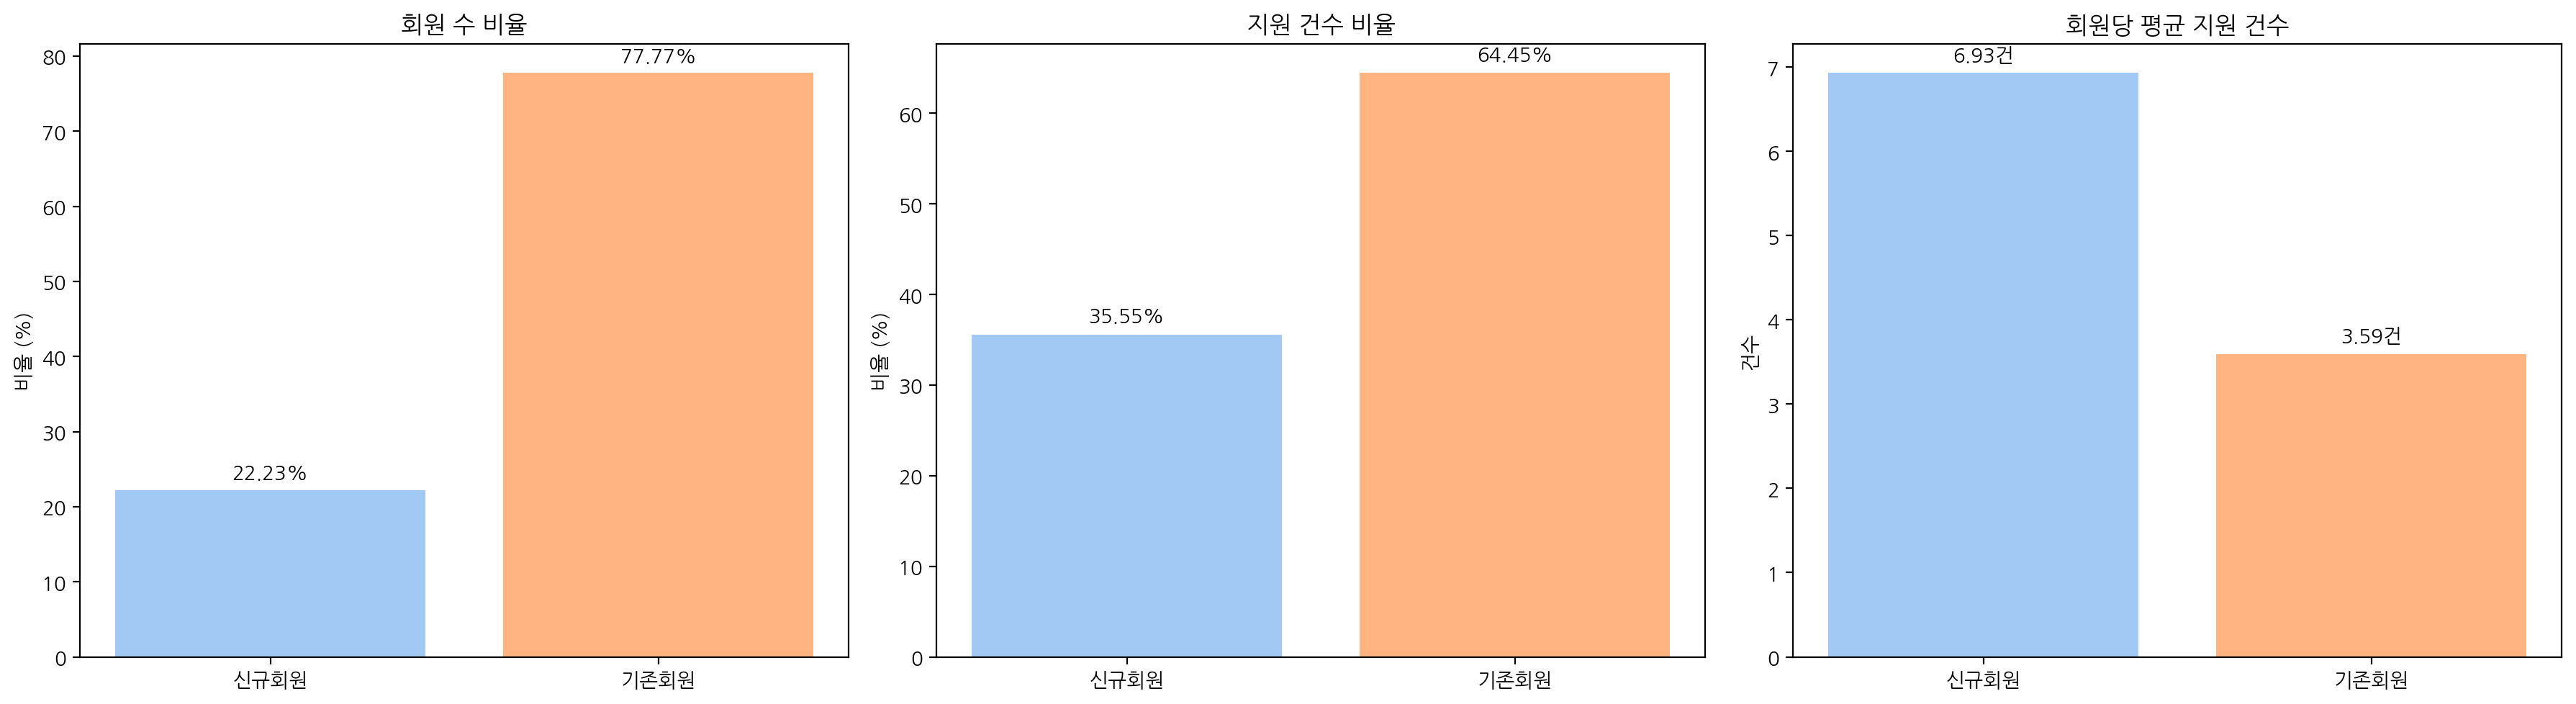

In [ ]:
# 데이터
labels = ['신규회원', '기존회원']
user_ratios = [new_user_ratio, existing_user_ratio]
apply_ratios = [new_user_apply_ratio, existing_user_apply_ratio]
avg_apply_counts = [new_user_avg_apply_counts, existing_user_avg_apply_counts]

# 그래프 크기 설정
fig, axs = plt.subplots(1, 3, figsize=(18, 5))
pastel_colors = sns.color_palette("pastel")

# 1. 회원 수 퍼센트
bars = axs[0].bar(labels, user_ratios, color= pastel_colors)
axs[0].set_title('회원 수 비율')
axs[0].set_ylabel('비율 (%)')

# 퍼센트 레이블 추가
for i, bar in enumerate(bars):
    yval = bar.get_height()
    axs[0].text(bar.get_x() + bar.get_width()/2, yval + 1, f'{yval:.2f}%',
                ha='center', va='bottom', fontsize=10)

# 2. 지원 건수 퍼센트
bars = axs[1].bar(labels, apply_ratios, color=pastel_colors)
axs[1].set_title('지원 건수 비율')
axs[1].set_ylabel('비율 (%)')

# 퍼센트 레이블 추가
for i, bar in enumerate(bars):
    yval = bar.get_height()
    axs[1].text(bar.get_x() + bar.get_width()/2, yval + 1, f'{yval:.2f}%',
                ha='center', va='bottom', fontsize=10)

# 3. 평균 지원 건수 (건수 레이블만 추가)
bars = axs[2].bar(labels, avg_apply_counts, color=pastel_colors)
axs[2].set_title('회원당 평균 지원 건수')
axs[2].set_ylabel('건수')

# 건수 레이블 추가
for i, bar in enumerate(bars):
    yval = bar.get_height()
    axs[2].text(bar.get_x() + bar.get_width()/2, yval + 0.1, f'{yval:.2f}건',
                ha='center', va='bottom', fontsize=10)

# 전체 레이아웃 정리
plt.tight_layout()
plt.show()

📌 해석
- 신규 회원은 전체 비중은 낮지만 적극적인 지원 활동을 보이고 있습니다.
- 기존 회원은 유입은 많지만 지원서 제출과 빈도는 낮게 나타납니다.
- 따라서, 신규 회원의 행동 유도와 전환 최적화 전략을 지속, 확대할 필요가 있습니다.

# 5. 신규 회원 특성 파악

## 5.1. AARRR 프레임워크

### 5.1.1. Acquisition(획득)

- 신규 회원을 분석 고객 기준으로 설정하겠습니다.

In [ ]:
new_user_df = log_df[log_df['action_type']=='회원가입완료']['user_uuid'].unique()

In [ ]:
log_df = log_df[log_df['user_uuid'].isin(new_user_df)]
log_df

user_uuid  \
0         8a7e70cd-1630-4a8a-8303-0706af3a7908   
1         8a7e70cd-1630-4a8a-8303-0706af3a7908   
2         8a7e70cd-1630-4a8a-8303-0706af3a7908   
3         8a7e70cd-1630-4a8a-8303-0706af3a7908   
4         8a7e70cd-1630-4a8a-8303-0706af3a7908   
...                                        ...   
16597620  2583ab0a-408e-4d76-a9dc-bbd4012c0c9c   
16597621  2583ab0a-408e-4d76-a9dc-bbd4012c0c9c   
16597622  2583ab0a-408e-4d76-a9dc-bbd4012c0c9c   
16597623  2583ab0a-408e-4d76-a9dc-bbd4012c0c9c   
16597624  2583ab0a-408e-4d76-a9dc-bbd4012c0c9c   

                                                        URL  \
0              api/search/language?name=한국어&_=1655915651225   
1                                           api/signup/form   
2                                     api/users/id/template   
3                                     api/users/id/template   
4         api/users/id/phone/verify/template?_=165591488...   
...                                                     ...   
16597620                                           @user_id   
16597621                       api/current_guided_action/id   
16597622                       api/current_guided_action/id   
16597623                              api/users/id/template   
16597624                              api/users/id/template   

                               timestamp        date  response_code method  \
0         2022-06-22 16:42:48.247454 UTC  2022-06-23            200    GET   
1         2022-06-22 16:19:07.770741 UTC  2022-06-23            200   POST   
2         2022-06-22 16:41:54.449837 UTC  2022-06-23            200   POST   
3         2022-06-23 02:53:47.040932 UTC  2022-06-23            200   POST   
4         2022-06-22 16:21:58.154299 UTC  2022-06-23            200    GET   
...                                  ...         ...            ...    ...   
16597620  2023-11-08 06:27:09.909335 UTC  2023-11-08            200    GET   
16597621  2023-11-08 06:27:10.161323 UTC  2023-11-08            200   POST   
16597622  2023-11-08 06:26:44.040185 UTC  2023-11-08            200   POST   
16597623  2023-11-08 06:26:52.120019 UTC  2023-11-08            200   POST   
16597624  2023-11-08 06:27:10.582503 UTC  2023-11-08            200   POST   

                                 cleaned_URL              query_params  \
0                        api/search/language  name=한국어&_=1655915651225   
1                            api/signup/form                      None   
2                      api/users/id/template                      None   
3                      api/users/id/template                      None   
4         api/users/id/phone/verify/template           _=1655914889887   
...                                      ...                       ...   
16597620                            @user_id                      None   
16597621        api/current_guided_action/id                      None   
16597622        api/current_guided_action/id                      None   
16597623               api/users/id/template                      None   
16597624               api/users/id/template                      None   

          action_type       timestamp_log  
0           프로필 작성/수정 2022-06-23 01:42:48  
1         회원가입 페이지 진입 2022-06-23 01:19:07  
2           프로필 작성/수정 2022-06-23 01:41:54  
3           프로필 작성/수정 2022-06-23 11:53:47  
4           프로필 작성/수정 2022-06-23 01:21:58  
...               ...                 ...  
16597620           기타 2023-11-08 15:27:09  
16597621       가이드 흐름 2023-11-08 15:27:10  
16597622       가이드 흐름 2023-11-08 15:26:44  
16597623    프로필 작성/수정 2023-11-08 15:26:52  
16597624    프로필 작성/수정 2023-11-08 15:27:10  

[5281132 rows x 10 columns]

### 5.1.2. Activation(활성화)

- 저희는 핵심가치를 '지원서를 제출완료'하는 것으로 설정하였기에, 지원서 제출의 근거를 파악하였습니다.

In [ ]:
# step4/done POST만 필터링
step4_logs = log_df[(log_df['URL'].str.contains('apply/step4')) & (log_df['method'] == 'POST')]

# 결과 저장용
matched = []

# log_time과 apply_times 모두 tz 제거해서 비교
for user in step4_logs['user_uuid'].unique():
    step4_times = step4_logs[step4_logs['user_uuid'] == user]['timestamp_log'].dt.tz_localize(None)
    apply_times = application[application['user_uuid'] == user]['timestamp_app'].dt.tz_localize(None)

    for log_time in step4_times:
        if not apply_times.empty:
            time_diffs = (apply_times - log_time).abs()
            min_diff = time_diffs.min()

            if min_diff <= pd.Timedelta(seconds=10):
                matched.append({
                    'user_uuid': user,
                    'log_timestamp': log_time,
                    'apply_timestamp': apply_times[time_diffs.idxmin()],
                    'time_diff_sec': min_diff.total_seconds()
                })


matched_df = pd.DataFrame(matched)

In [ ]:
print(matched_df.head())

# 몇 건이 매칭됐는지
print(f"\n총 {len(matched_df)}명의 지원서 제출 로그가 매칭되었습니다.")

                              user_uuid       log_timestamp  \
0  8a7e70cd-1630-4a8a-8303-0706af3a7908 2022-06-23 02:01:05   
1  7e92fb11-d00d-4db4-8574-bbba6355be6c 2022-10-15 23:42:32   
2  7e92fb11-d00d-4db4-8574-bbba6355be6c 2023-02-22 14:58:30   
3  343efc9a-2de4-4dd9-b04c-9eabeb185700 2022-06-02 14:31:31   
4  4bcbe008-1fec-45ba-b3c7-cf2d3c2207f1 2022-07-11 11:04:02   

      apply_timestamp  time_diff_sec  
0 2022-06-23 02:01:05            0.0  
1 2022-10-15 23:42:32            0.0  
2 2023-02-22 14:58:30            0.0  
3 2022-06-02 14:31:31            0.0  
4 2022-07-11 11:04:02            0.0  

총 31387명의 지원서 제출 로그가 매칭되었습니다.


In [ ]:
match_count = len(matched_df)
total_logs = len(step4_logs)
match_rate = (match_count / total_logs) * 100

print(f"✔️ 지원서 제출 로그 중 {match_count:,}건이 실제 지원서와 매칭됨 ({match_rate:.2f}%)")

✔️ 지원서 제출 로그 중 31,387건이 실제 지원서와 매칭됨 (99.57%)


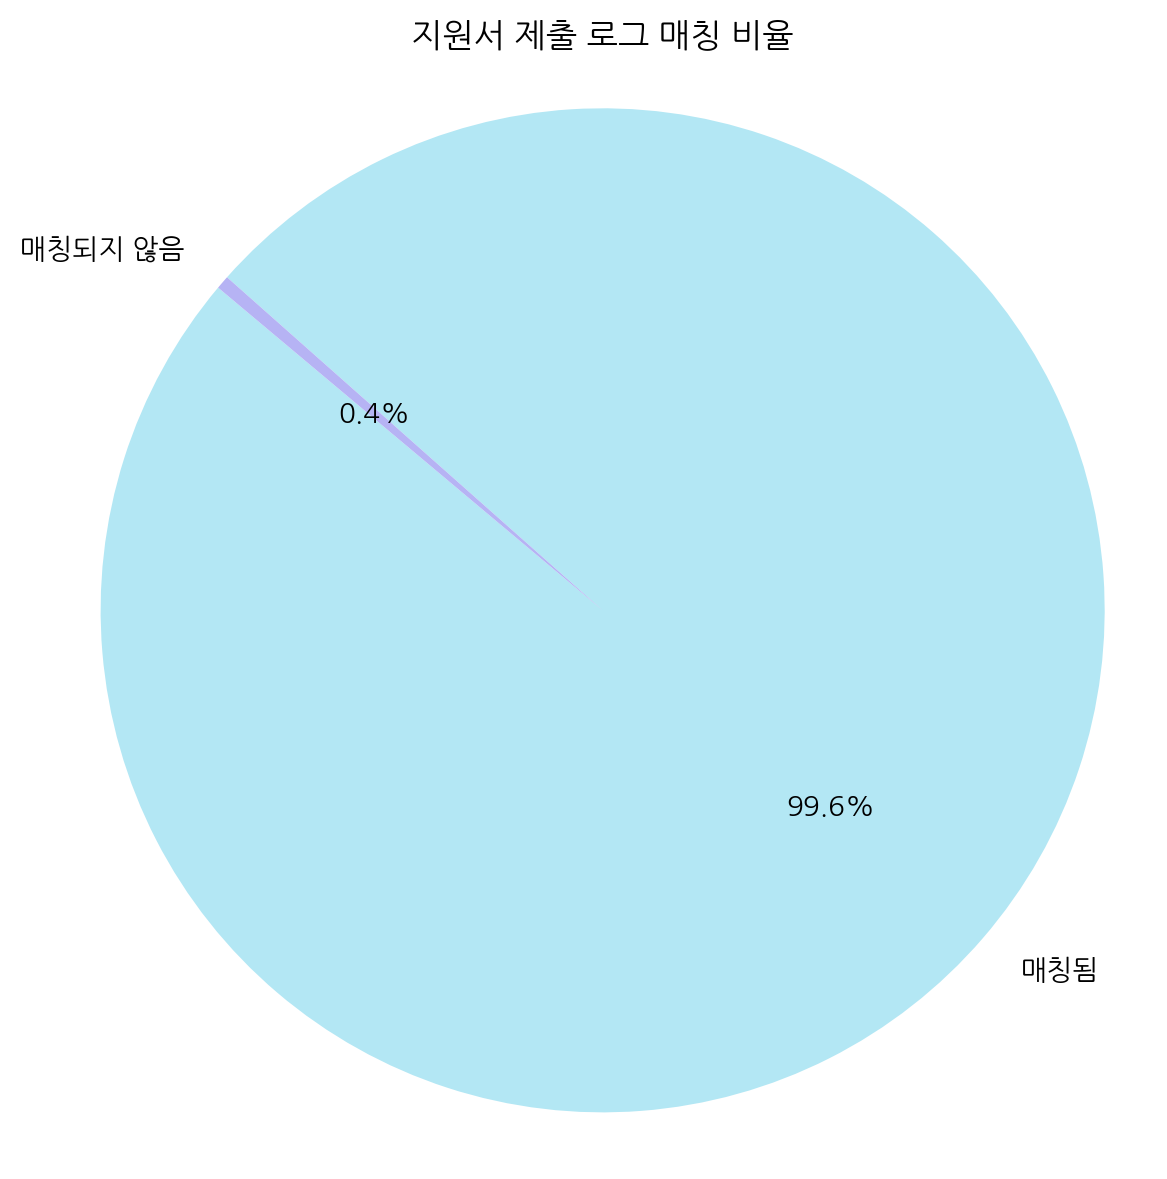

In [ ]:
labels = ['매칭됨', '매칭되지 않음']
sizes = [match_count, total_logs - match_count]
colors = ['#b3e7f4', '#b6b3f4']

plt.figure(figsize=(6, 6))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', colors=colors, startangle=140)
plt.title('지원서 제출 로그 매칭 비율')
plt.axis('equal')
plt.tight_layout()
plt.show()

- `application`에 있는 user_uuid별로 지원서가 제출된 시간과 `log`데이터에서 `URL`에 `apply/step4`가 존재하고 `method`가 `POST`인 user_uuid의 시간이 10초 이내로 일치하는 값을 계산했을 때 99.6%의 값이 일치하는 것을 확인할 수 있었습니다. 그렇기에 저희는 이 값을 제출완료된 시간으로 간주했습니다.

### 5.1.3. Retention(유지율)

#### 5.1.3.1 신규회원 한 달 리텐션 비교

In [ ]:
# 신규회원만 추출
signup_done_user_id = log_df[log_df['URL'].str.contains('signup/step3/done')]['user_uuid'].drop_duplicates().reset_index(drop=True)
new_users_log = log_df[log_df['user_uuid'].isin(signup_done_user_id)]

In [ ]:
# 가입일자는 signup/step3/done이 가장 먼저 찍힌 timestamp_kst
signup_logs = new_users_log[new_users_log['URL'].str.contains('signup/step3/done')]
signup_dates = signup_logs.sort_values('timestamp_log').groupby('user_uuid', as_index=False).first()
signup_dates = signup_dates[['user_uuid', 'timestamp_log']].rename(columns={'timestamp_log': 'signup_date'})

In [ ]:
# 전체 로그와 병합, 활동일 계산
log_with_signup = new_users_log.merge(signup_dates, on='user_uuid', how='inner')
log_with_signup['activity_day'] = (log_with_signup['timestamp_log'] - log_with_signup['signup_date']).dt.days

In [ ]:
# 0~6일 내 활동한 유저 카운트
retention_days = list(range(7))  # 0~6일
retention_df_all = log_with_signup[log_with_signup['activity_day'].isin(retention_days)]
retention_summary_all = (
    retention_df_all
    .drop_duplicates(['user_uuid', 'activity_day'])  # 유저별 하루 1회만
    .groupby('activity_day')['user_uuid']
    .nunique()
    .reset_index(name='retained_users')
)

# 총 가입자 수 기준 비율 계산
total_users = signup_dates['user_uuid'].nunique()
retention_summary_all['retention_rate'] = retention_summary_all['retained_users'] / total_users

In [ ]:
retention_summary_all

activity_day  retained_users  retention_rate
0           0.0            4746        1.000000
1           1.0            1531        0.322587
2           2.0            1258        0.265065
3           3.0            1159        0.244206
4           4.0            1156        0.243574
5           5.0            1151        0.242520
6           6.0            1170        0.246523

##### 5.1.3.1.1. 신규회원 전체 활동 기준 한 달 리텐션

In [ ]:
#################
## 전체 활동 기준 ##
################

# 0~29일 리텐션만 추출
retention_df_all_1month = log_with_signup[log_with_signup['activity_day'].between(0, 29)]

# 일별 유니크 유저 수 집계
retention_summary_all_1month = (
    retention_df_all_1month
    .drop_duplicates(['user_uuid', 'activity_day'])
    .groupby('activity_day')['user_uuid']
    .nunique()
    .reset_index(name='retained_users')
)

# 전체 유저 수로 나눠서 리텐션율 계산
total_users_1month = signup_dates['user_uuid'].nunique()
retention_summary_all_1month['retention_rate_1month'] = retention_summary_all_1month['retained_users'] / total_users_1month

##### 5.1.3.1.2. 신규회원 주요 이벤트 기준 한 달 리텐션

In [ ]:
##################
## 주요 이벤트 기준 ##
##################

##### 수정
new_user_df = pd.DataFrame(new_user_df)
new_user_df.rename(columns = {0:'user_uuid'}, inplace=True)
new_user_df
##########################

application2 = new_user_df.reset_index()


# new_user_df의 user_uuid 이용해서 정제된 appication 구하기
filtered_application = application[
    application['user_uuid'].isin(application2['user_uuid'])
]


# 지원일 기준으로 활동일 계산
app_with_signup = filtered_application.merge(signup_dates, on='user_uuid', how='inner')
app_with_signup['activity_day'] = (app_with_signup['timestamp_app'] - app_with_signup['signup_date']).dt.days

# 0~29일 내 지원한 유저 필터링
retention_df_app_1month = app_with_signup[app_with_signup['activity_day'].between(0, 29)]

# 일별 중복 제거 후 리텐션 요약
retention_summary_app_1month = (
    retention_df_app_1month
    .drop_duplicates(['user_uuid', 'activity_day'])
    .groupby('activity_day')['user_uuid']
    .nunique()
    .reset_index(name='retained_users_1month')
)

# 전체 유저 수로 나누어 리텐션율 계산
retention_summary_app_1month['retention_rate_1month'] = retention_summary_app_1month['retained_users_1month'] / total_users

##### 5.1.3.1.3. 시각화

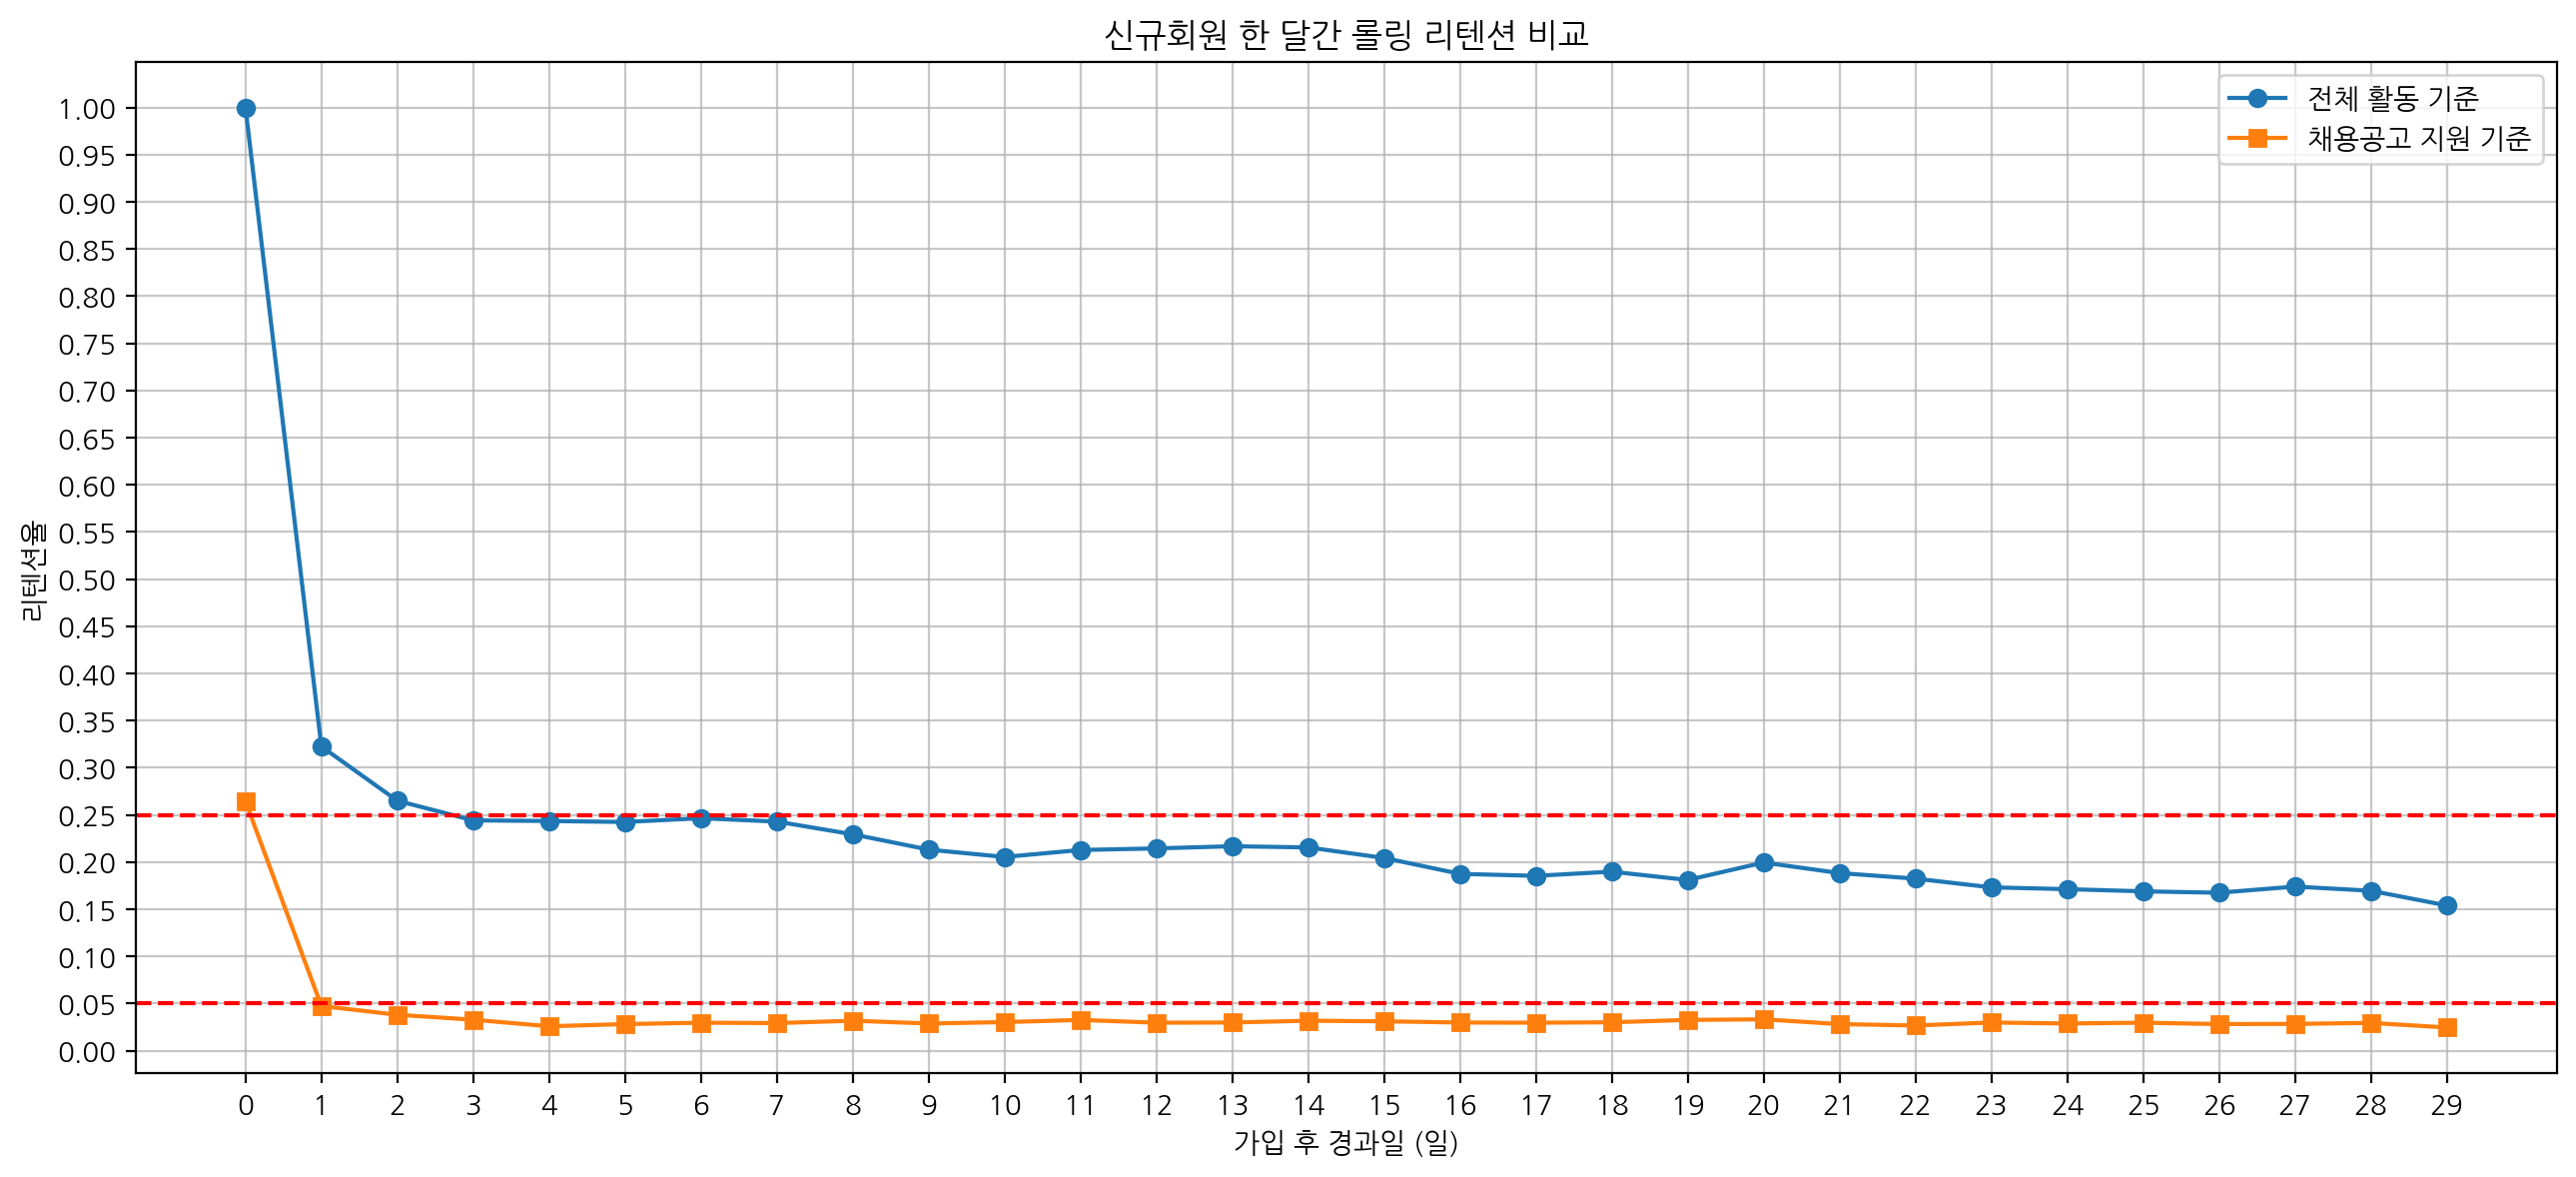

In [ ]:
##########
## 시각화 ##
##########

plt.figure(figsize=(13, 6))

# 전체 활동 기준 리텐션
plt.plot(
    retention_summary_all_1month['activity_day'],
    retention_summary_all_1month['retention_rate_1month'],
    marker='o',
    label='전체 활동 기준'
)

# 채용공고 지원 기준 리텐션
plt.plot(
    retention_summary_app_1month['activity_day'],
    retention_summary_app_1month['retention_rate_1month'],
    marker='s',
    label='채용공고 지원 기준'
)

plt.xticks(range(30))
plt.xlabel('가입 후 경과일 (일)')
plt.ylabel('리텐션율')
plt.yticks(np.arange(0, 1.05, 0.05))
plt.title('신규회원 한 달간 롤링 리텐션 비교')
plt.legend()
plt.grid(True, alpha=0.7)
plt.axhline(y=0.25, color='red', ls='--')
plt.axhline(y=0.05, color='red', ls='--')
plt.tight_layout()

plt.show()

📌 신규회원 30일간 롤링 리텐션 비교(전체 활동 기준 vs. 채용공고 지원 기준)

``` python
1️⃣ Day1~6 비교
    - 파란선(전체 활동 기준)의 리텐션율은 시간이 지날수록 점점 감소하는 경향을 보입니다.
    - 주황선(채용공고 지원 기준)의 리텐션율은 약 5% 이내로 매우 작지만, 일정 수준을 유지하고 있는 것으로 보입니다.
    💡 적긴 하지만, 지속적으로 이용하고 있는 사용자들이 있다는 것으로 볼 수 있습니다.
```

#### 5.1.3.2. 신규회원 일주일 리텐션 비교

##### 5.1.3.2.1. 신규회원 전체 활동기준 일주일 리텐션

In [ ]:
#################
## 전체 활동 기준 ##
################

# 가입 주차 정보 추출 (코호트 열 생성)
signup_dates['cohort_week'] = signup_dates['signup_date'].dt.to_period('W').astype(str)

# 전체 활동 기준 리텐션 (코호트 포함)
log_with_signup = new_users_log.merge(signup_dates, on='user_uuid', how='inner')
log_with_signup['activity_day'] = (log_with_signup['timestamp_log'] - log_with_signup['signup_date']).dt.days
log_with_signup['cohort_week'] = log_with_signup['cohort_week']

# 0~6일 리텐션만
retention_df_all = log_with_signup[log_with_signup['activity_day'].between(0, 6)]

# 코호트별 리텐션 테이블 생성
cohort_retention_all = (
    retention_df_all
    .drop_duplicates(['user_uuid', 'activity_day'])  # 중복 제거
    .groupby(['cohort_week', 'activity_day'])['user_uuid']
    .nunique()
    .reset_index(name='retained_users')
)

# 코호트별 총 가입자 수로 나누기
cohort_user_counts = signup_dates.groupby('cohort_week')['user_uuid'].nunique().reset_index(name='total_users')
cohort_retention_all = cohort_retention_all.merge(cohort_user_counts, on='cohort_week')
cohort_retention_all['retention_rate'] = cohort_retention_all['retained_users'] / cohort_retention_all['total_users']

##### 5.1.3.2.2. 신규회원 채용 공고 지원 기준 일주일 리텐션

In [ ]:
##################
## 주요 이벤트 기준 ##
##################


##### 수정
new_user_df = pd.DataFrame(new_user_df)
new_user_df.rename(columns = {0:'user_uuid'}, inplace=True)
new_user_df
##########################


application2 = new_user_df.reset_index()

# new_user_df user_uuid 이용해서 정제된 appication 구하기
filtered_application = application[
    application['user_uuid'].isin(application2['user_uuid'])
]

# 지원일 기준으로 활동일 계산
app_with_signup = filtered_application.merge(signup_dates, on='user_uuid', how='inner')
app_with_signup['activity_day'] = (app_with_signup['timestamp_app'] - app_with_signup['signup_date']).dt.days

# 신규회원 user_uuid에 해당하는 지원 기록만 추출
#test1 = filtered_application[filtered_application['user_uuid'].isin(signup_dates['user_uuid'])]
# 그냥 filtered_application 사용해도 동일!

# 0~6일내 지원한 유저 리텐션
retention_df_app = app_with_signup[app_with_signup['activity_day'].isin(retention_days)]
retention_summary_app = (
    retention_df_app
    .drop_duplicates(['user_uuid', 'activity_day'])
    .groupby('activity_day')['user_uuid']
    .nunique()
    .reset_index(name='retained_users')
)

retention_summary_app['retention_rate'] = retention_summary_app['retained_users'] / total_users

##### 5.1.3.2.3. 시각화

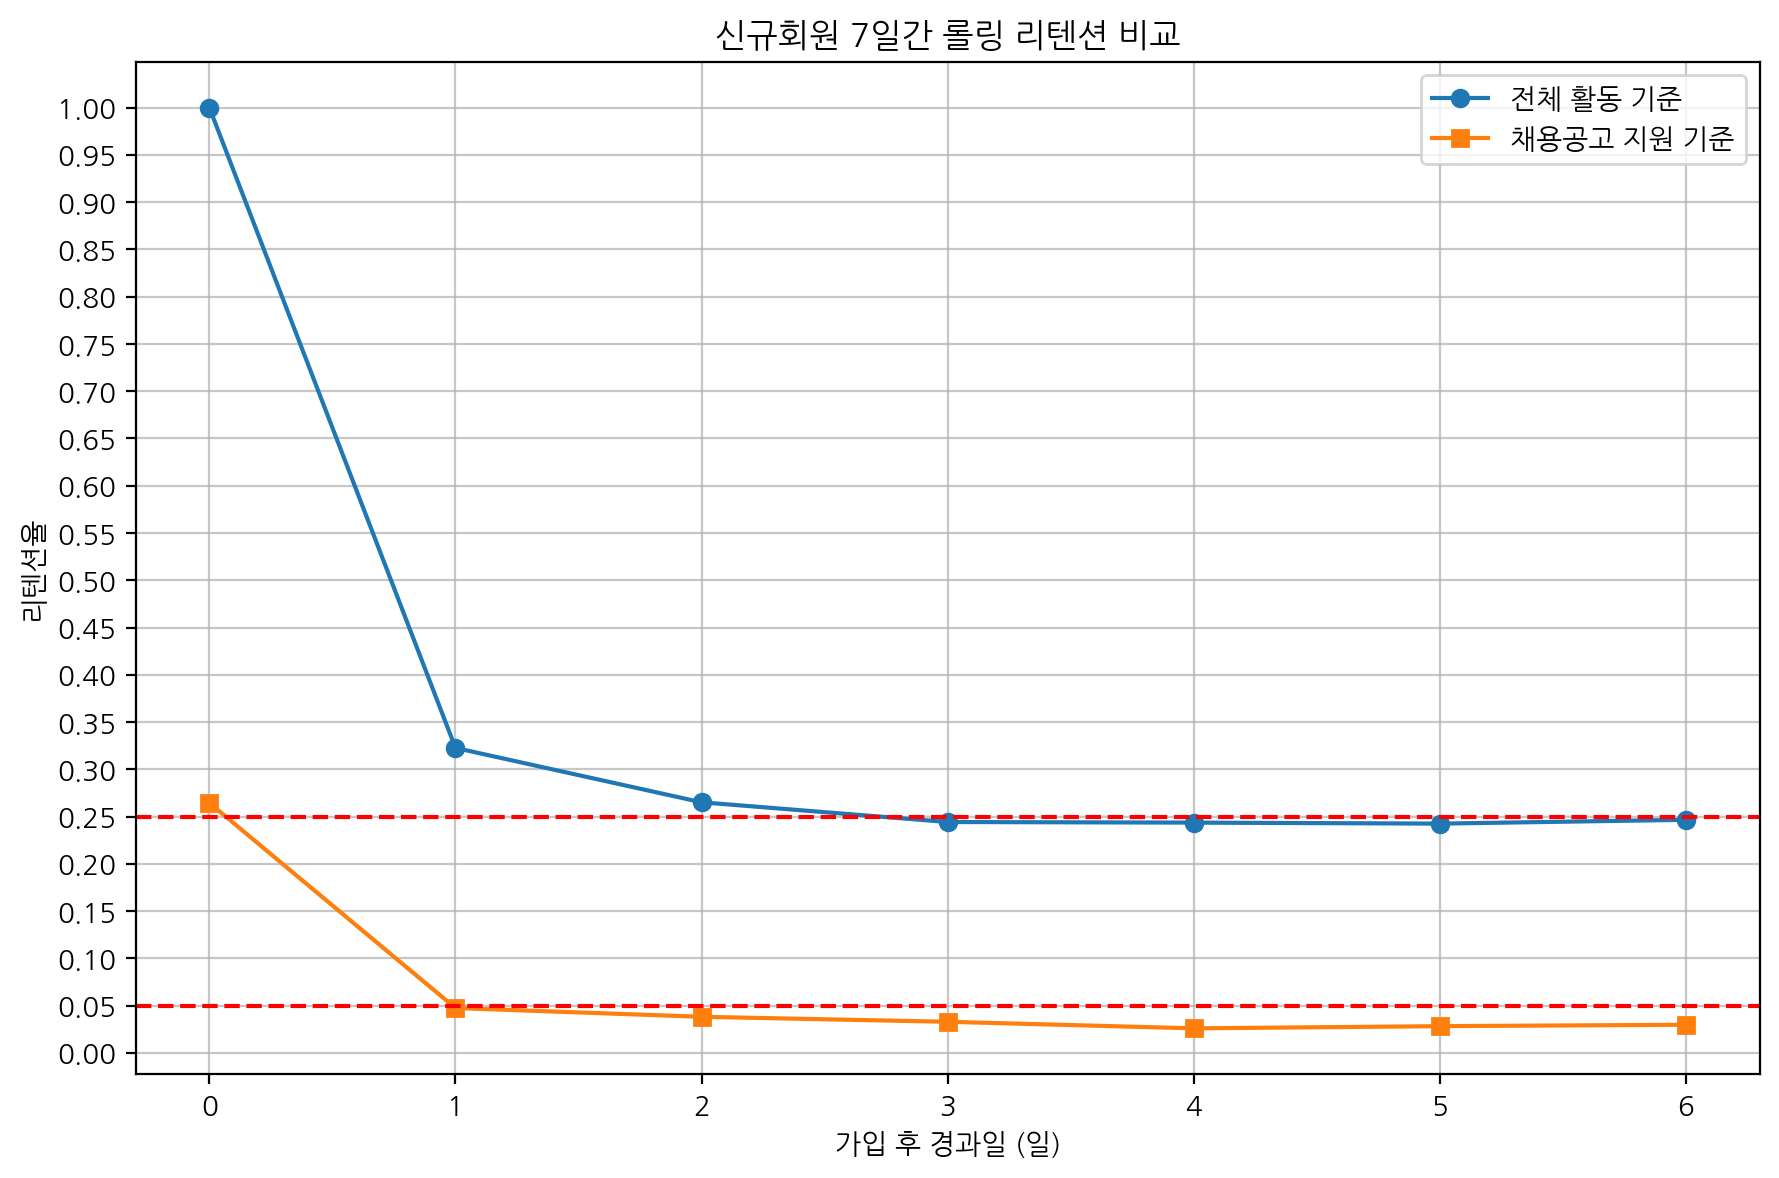

In [ ]:
# 시각화(두 그래프 비교)
plt.figure(figsize=(9, 6))
plt.plot(retention_summary_all['activity_day'], retention_summary_all['retention_rate'], marker='o', label='전체 활동 기준')
plt.plot(retention_summary_app['activity_day'], retention_summary_app['retention_rate'], marker='s', label='채용공고 지원 기준')

plt.xticks(retention_days)
plt.xlabel('가입 후 경과일 (일)')
plt.ylabel('리텐션율')
plt.yticks(np.arange(0, 1.05, 0.05))
plt.title('신규회원 7일간 롤링 리텐션 비교')
plt.legend()
plt.grid(True, alpha=.7)
plt.axhline(y=0.25, color = 'red', ls = '--')
plt.axhline(y=0.05, color = 'red', ls = '--')
plt.tight_layout()

plt.show()

📌 신규회원 7일간 롤링 리텐션 비교(전체 활동 기준 vs. 채용공고 지원 기준)

``` python
1️⃣ Day 0(가입일) 비교
    - 파란선(전체 활동 기준)의 리텐션율은 1.0이므로, 모든 유저가 Day 0에 최소한 한 번은 활동을 했다고 할 수 있습니다.
    - 주황선(채용공고 지원 기준)의 리텐션율은 0.24이므로, 가입 당일에 채용공고까지 지원한 유저는 약 24%입니다.

2️⃣ Day 1~6 비교
    - 파란선(전체 활동 기준): 리텐션율 급격히 감소한 후 약 25% 수준에서 평탄하게 유지됩니다.
    💡 가입 후 첫날 대다수 유저가 이탈, 이후에는 어느 정도 안정적인 사용자층이 남습니다.

    - 주황선(채용공고 지원 기준): Day 1부터 리텐션율이 5%미만으로 크게 감소하고, 이후에는 1~2% 내외로 매우 낮습니다.
    💡 주요 이벤트(채용공고 지원)는 극히 일부 사용자만 수행하고, 다른 것을 탐색하는 사용자가 많습니다.
```

💭 인사이트

``` python
1️⃣ Day1에 리텐션이 급격하게 떨어지므로(초기 이탈), 출석체크 이벤트 등 고객의 관심을 지속적으로 유도하는 개선이 필요합니다.
2️⃣ 지원 기준의 리텐션이 낮음 -> 단순 방문 외에 '실제 전환(공고 지원)'으로 이어지지 않습니다.
```

#### 5.1.3.3. 코호트 분석 결과

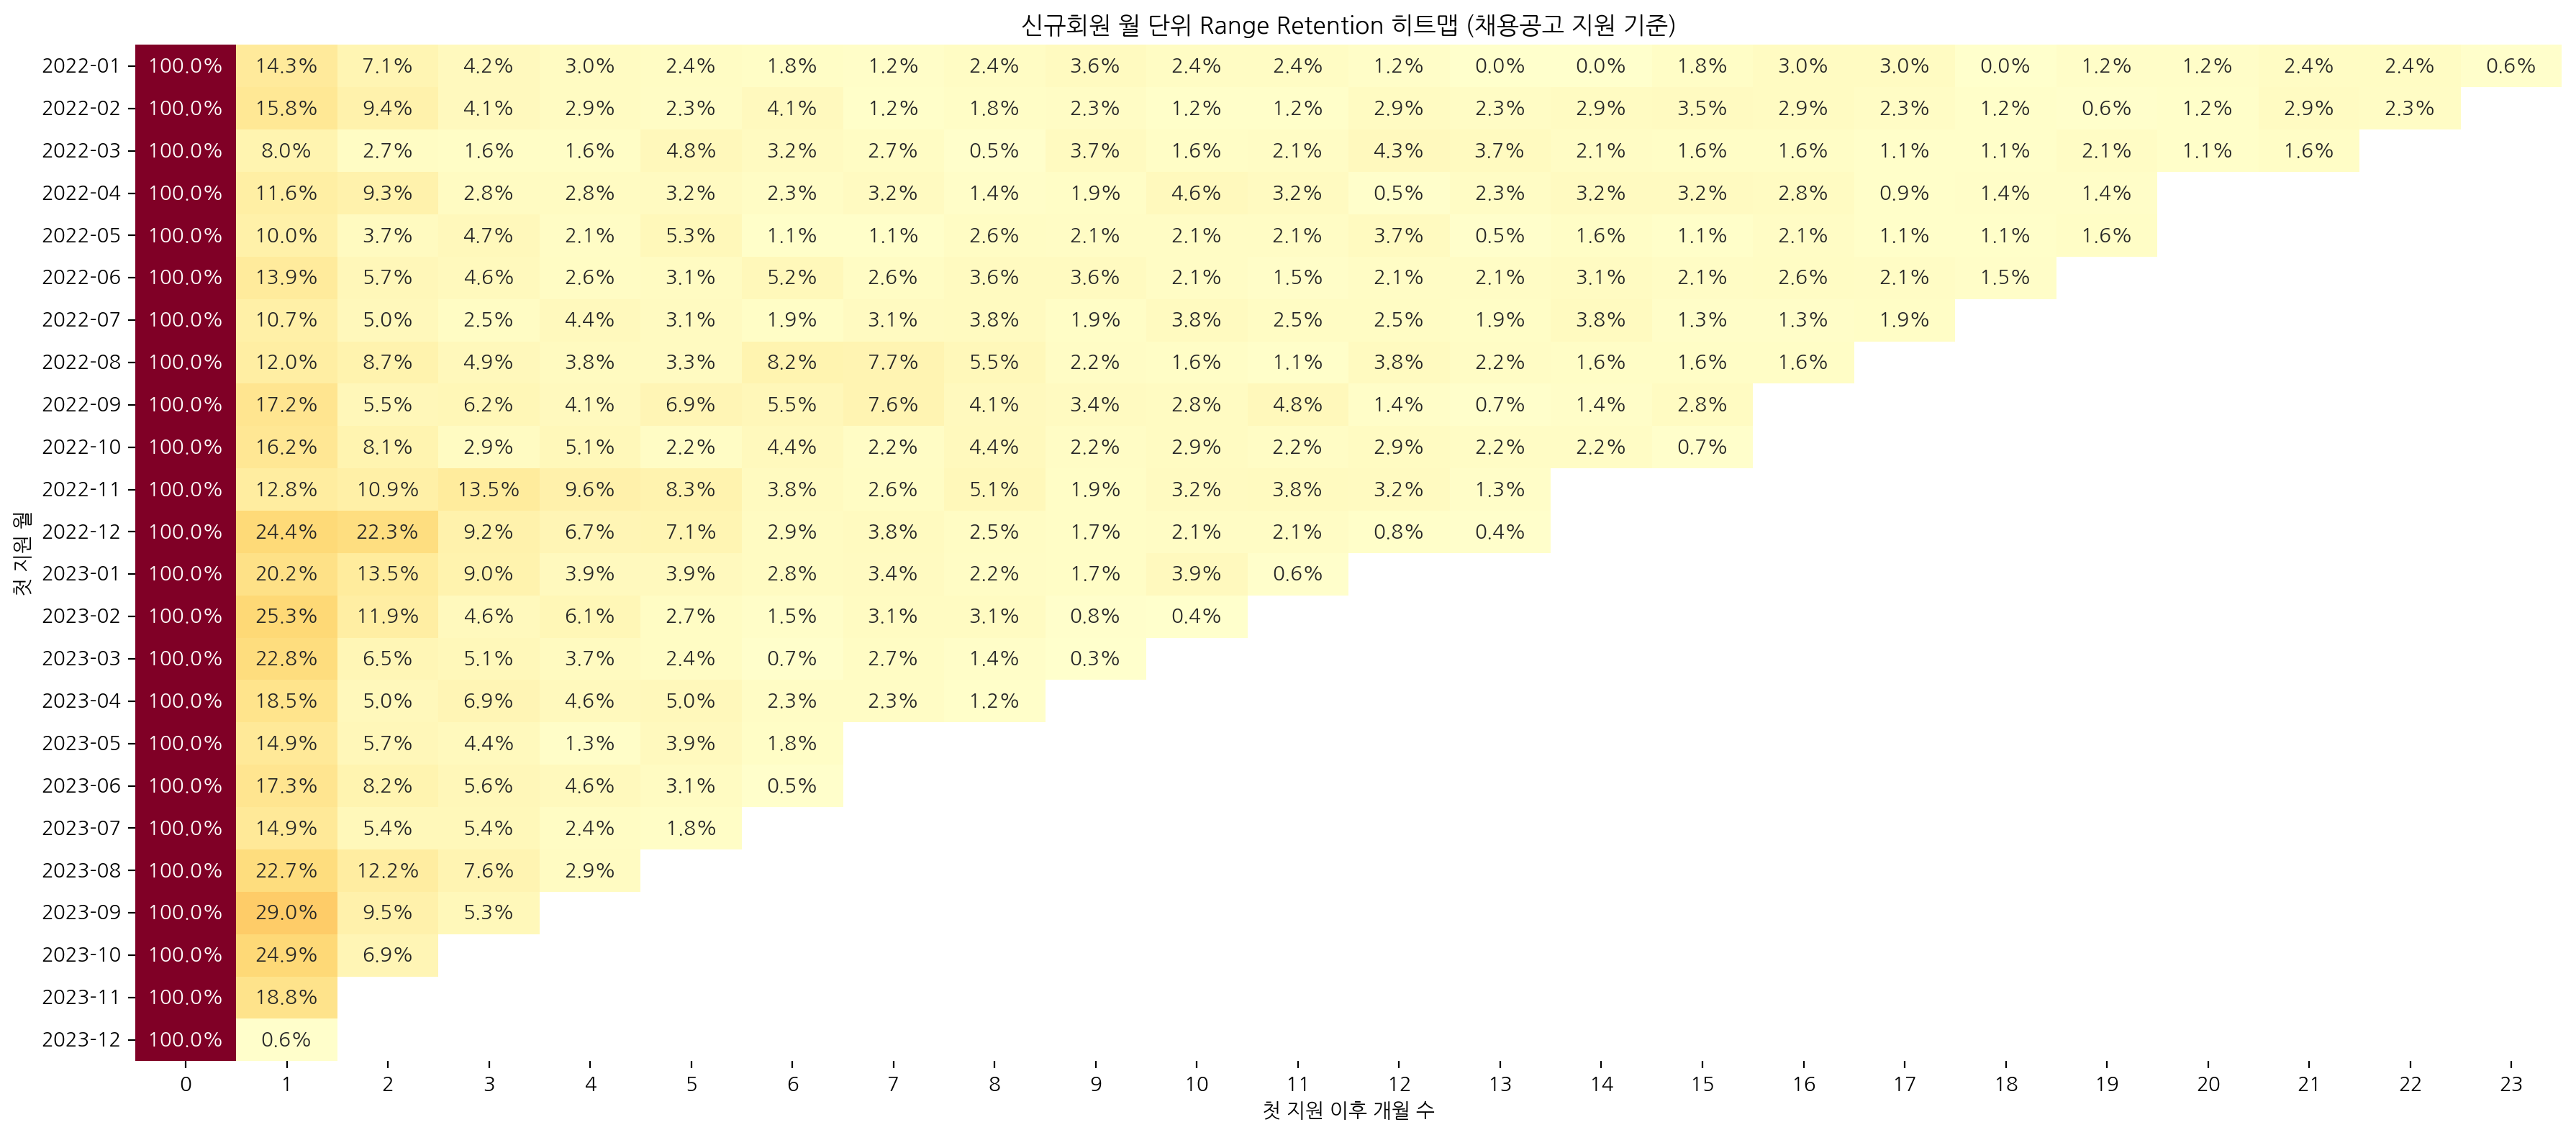

In [ ]:
##############
## 최종 코호트 ##
##############

# 기업대상 유료서비스 조회 유저 (중복 제거)
pricing_all_users = log_df[log_df['URL'].str.contains('pricing/')]['user_uuid'].drop_duplicates().reset_index(drop=True)

# 신규 유저 리스트 (중복 제거)
new_users = new_users_log['user_uuid'].drop_duplicates()

# 신규회원 중 지원 유저만 필터링
new_user_applications = filtered_application[filtered_application['user_uuid'].isin(new_users.reset_index()['user_uuid'])].copy()

# 유저별 첫 지원일 계산
new_user_applications['first_application_date'] = new_user_applications.groupby('user_uuid')['timestamp_app'].transform('min')

# 첫 지원 월을 기준으로 코호트 생성
new_user_applications['cohort_month'] = new_user_applications['first_application_date'].dt.to_period('M').apply(lambda r: r.start_time)

# 월차 차이 계산 (단순한 월 단위 차이 아님 → 범위 기반 계산을 위해 days 계산)
new_user_applications['days_since_first'] = (new_user_applications['timestamp_app'] - new_user_applications['first_application_date']).dt.days
new_user_applications['month_range'] = new_user_applications['days_since_first'] // 30  # 0, 1, 2개월차...

# 중복 제거: 유저가 해당 month_range 내에 한 번이라도 활동했는지 여부
cohort = new_user_applications.drop_duplicates(['user_uuid', 'cohort_month', 'month_range'])

# 코호트별 전체 유저 수 계산
cohort_sizes = cohort.groupby('cohort_month')['user_uuid'].nunique().reset_index(name='total_users')

# 리텐션 카운트 계산
retention_counts = (
    cohort.groupby(['cohort_month', 'month_range'])['user_uuid']
    .nunique()
    .reset_index(name='retained_users')
)

# 리텐션율 계산
retention_df = retention_counts.merge(cohort_sizes, on='cohort_month')
retention_df['retention'] = retention_df['retained_users'] / retention_df['total_users']

########################

# Pivot 테이블로 변환
retention_matrix = retention_df.pivot(index='cohort_month', columns='month_range', values='retention')

# 첫 지원일이 2022년 1월이고 첫 지원 이후 개월수가 13, 14, 18인 셀만 0.0001로 채우기
retention_matrix.loc['2022-01-01', [13, 14, 18]] = 0.0001

# 시각화
plt.figure(figsize=(18, 8))

sns.heatmap(
    retention_matrix,
    annot=True,
    fmt='.1%',
    cmap='YlOrRd',
    cbar=False,
    mask=retention_matrix.isna()  # NaN은 가리기
)

plt.title('신규회원 월 단위 Range Retention 히트맵 (채용공고 지원 기준)')
plt.xlabel('첫 지원 이후 개월 수')
plt.ylabel('첫 지원 월')

# y축
yticks = plt.yticks()[0]
plt.yticks(yticks, [pd.to_datetime(tick).strftime('%Y-%m') for tick in retention_matrix.index])

plt.tight_layout()
plt.show()

- 대부분 cohort에서 첫 달 이후에 70~90% 가 이탈합니다.
- 이후 리텐션 패턴은 코호트마다 다르지만 공통점이 있습니다.
- 리텐션은 대체로 3개월차 전후에서 더 가파르게 하락하거나 거의 0에 수렴합니다.
- 하지만 2022-12 ~ 2023-01 코호트는 이후 월에도 활동을 보입니다.

📌 마케팅 전략(1개월차 대거 이탈 부분)
``` python
- 첫 지원 직후 노출되는 컨텐츠 개선
💭 맞춤 채용 추천 등

- 채용공고 알림 구독 유도(관심 키워드 기반 공고 저장)

- 지원 이후 동기부여 팝업 보내서 재접속 유도
💭 이력서 열람 알림, 비슷한 포지션 추천 등
```

📌 마케팅 전략(2~3개월차 부분)
``` python
- 비 활동 유저 대상 푸시
💭 최근 이력서 열람 기업 n곳, 지원 마감 임박 공고 모음 등

- 이전 지원 직무와 연관된 공고 위주로 개인화
```

📌 마케팅 전략 (장기 미지원자)

일부 유저들은 코호트 6개월차 이후에도 남아있습니다.

➡️ 이들 중심의 재활성화 전략도 필요합니다.
``` python
- 이력서 업데이트 유도
💭 경력 정보 업데이트 시 상단 노출 등

- 합격 후기/리뷰 작성 참여 시 리워드 제공
```

📌 예외적으로 2022-12, 2023-08 등은 높은 리텐션을 보입니다.

그 시점에 어떤 캠페인이 있었는지 확인이 필요합니다.
``` python
- 리텐션이 높은 코호트에 집중된 캠페인/이벤트/알림 유형 분석

- 위의 방식을 반복, 확산 적용
💭 채용 시즌별 타켓 알림, 관심사 태그 기반 추천 등
```

### 5.1.4. Revenue(수익화)

📌 유료서비스 고객 분석
- membership서비스가 있긴 하지만, 주어진 데이터 내에서 관련 로그는 존재하지 않습니다.
- 비슷하게 채용 서비스(pricing/recruiting)와 광고 서비스(pricing/advertising)가 존재합니다.
- membership은 구직자 대상 유료서비스, 채용/광고 서비스는 기업 대상 유료서비스입니다.

#### 5.1.4.1. 신규회원/기존회원의 기업 유료서비스 조회 비율

In [ ]:
# 2022년, 2023년 로그 데이터를 세로로 병합
log_df2 = pd.concat([log_22, log_23], ignore_index=True)

In [ ]:
# 기업대상 유료서비스 조회
log_df2[log_df2['URL'].str.contains('pricing/')]['URL'].value_counts()

URL
pricing/recruiting                                                                                                2041
pricing/advertising                                                                                                507
pricing/advertising?utm_source=email&utm_medium=email&utm_campaign=advertisement&utm_content=email-20220311-RP      70
verify_phone?next_url=/pricing/recruiting                                                                            4
signup/detail?next_url=/pricing/recruiting                                                                           1
Name: count, dtype: int64

In [ ]:
# 기업대상 유료서비스 조회 유저 (중복 제거)
pricing_all_users = log_df2[log_df2['URL'].str.contains('pricing/')]['user_uuid'].drop_duplicates().reset_index(drop=True)

# 신규 유저 리스트 (중복 제거)
new_users = new_users_log['user_uuid'].drop_duplicates()

# 유료서비스 조회 유저 중 신규 유저
pricing_new_users = pd.merge(left=pricing_all_users, right=new_users, how='inner')

# 유료서비스 조회 유저 중 기존 유저 (차집합)
pricing_existing_users = pricing_all_users[~pricing_all_users.isin(pricing_new_users['user_uuid'])].reset_index(drop=True)

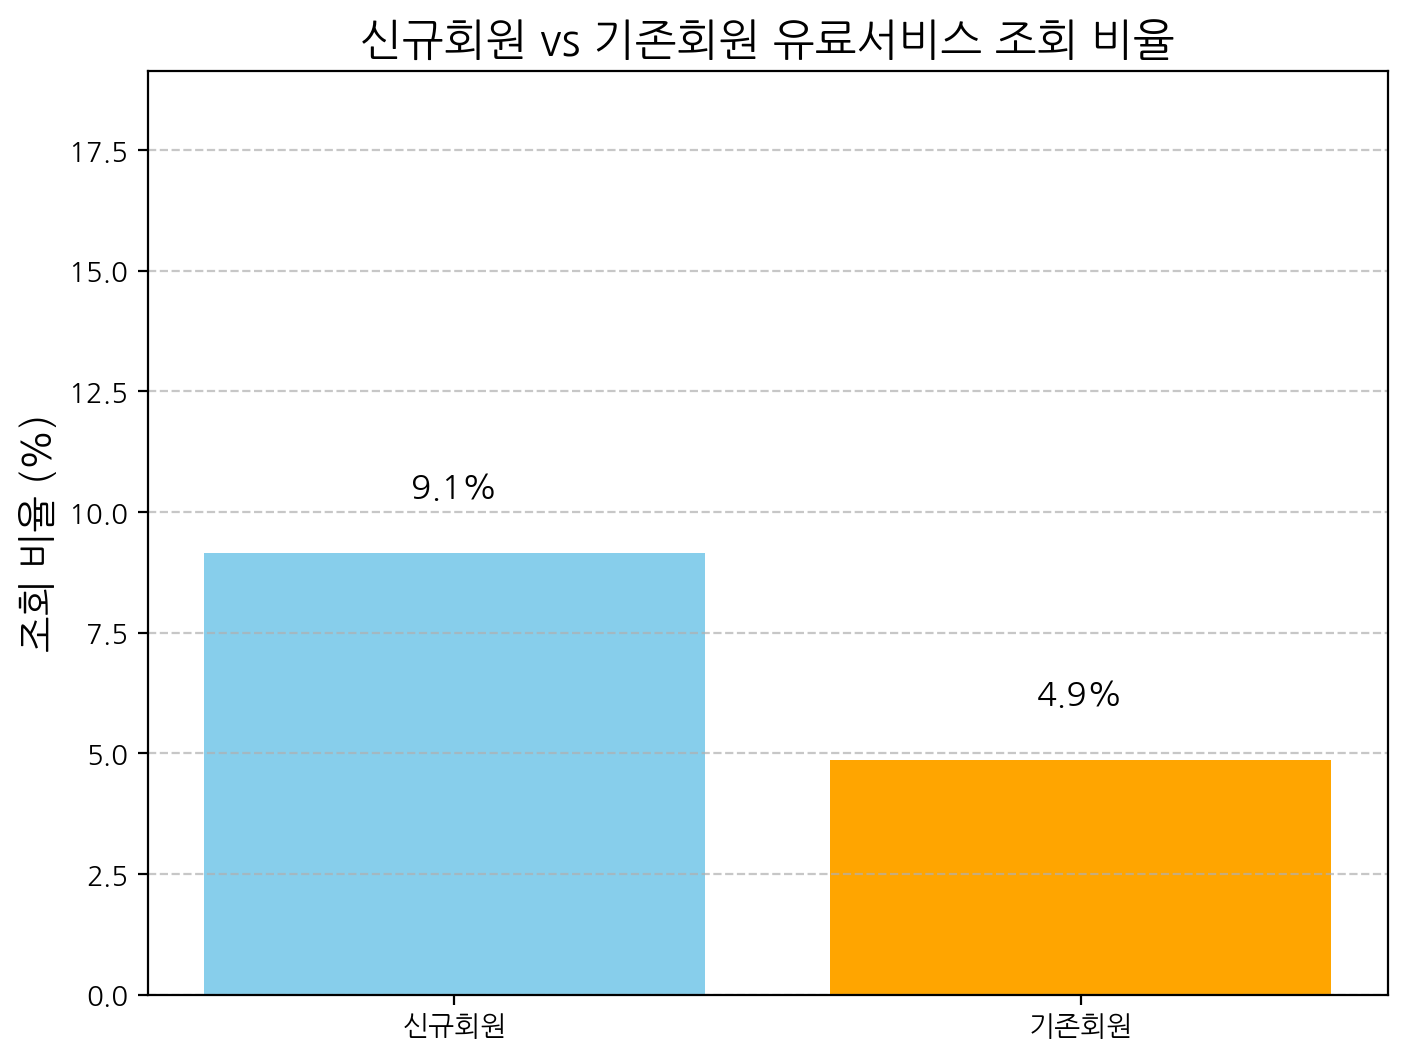

In [ ]:
# 비율 계산
new_users_conversion_rate = 100 * len(pricing_new_users) / 4746
existing_users_conversion_rate = 100 * len(pricing_existing_users) / 16602

# 데이터 준비
categories = ['신규회원', '기존회원']
conversion_rates = [new_users_conversion_rate, existing_users_conversion_rate]

# 그래프 그리기
plt.figure(figsize=(8, 6))
bars = plt.bar(categories, conversion_rates, color=['skyblue', 'orange'])

# 값 표시
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height + 1, f'{height:.1f}%', ha='center', va='bottom', fontsize=12)

plt.ylim(0, max(conversion_rates) + 10)  # 여유공간 주기
plt.title('신규회원 vs 기존회원 유료서비스 조회 비율', fontsize=16)
plt.ylabel('조회 비율 (%)', fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

#### 5.1.4.2. 신규회원/기존회원의 기업 유료서비스 조회 시간대

In [ ]:
## 충돌로 인해 재정의

# 문자열에서 " UTC" 제거
log_df2['timestamp'] = log_df2['timestamp'].str.replace(' UTC', '', regex=False)

# datetime으로 변환 + timezone 지정
log_df2['timestamp'] = pd.to_datetime(log_df2['timestamp'], utc=True, format='mixed')

# 한국 시간대로 변환
log_df2['timestamp_kst'] = log_df2['timestamp'].dt.tz_convert('Asia/Seoul')

In [ ]:
##############################################
## 신규회원: 기업대상 유료서비스 배너 클릭 누적 시간대 ##
##############################################

# 유료서비스 조회 유저 중 신규 유저(바로 위에서 정의한 데이터 사용)
pricing_new_users = pd.merge(left=pricing_all_users, right=new_users, how='inner')

# 기업대상 유료서비스를 배너를 클릭한 user_uuid와 서비스 조회 당시 timestamp 추출
clicked_users = log_df2[log_df2['URL'].str.contains('pricing/')][['user_uuid', 'timestamp_kst']]

# 신규회원이 유료서비스를 조회한 로그만 필터링
clicked_new_users = clicked_users[clicked_users['user_uuid'].isin(pricing_new_users['user_uuid'])].copy()

# timestamp_kst에서 시간 추출
clicked_new_users['hour'] = clicked_new_users['timestamp_kst'].dt.hour

In [ ]:
##############################################
## 기존회원: 기업대상 유료서비스 배너 클릭 누적 시간대 ##
##############################################

# 유료서비스 조회 유저 중 기존 유저 (차집합) (바로 위에서 정의한 데이터 사용)
pricing_existing_users = pricing_all_users[~pricing_all_users.isin(pricing_new_users['user_uuid'])].reset_index(drop=True)

# 기업대상 유료서비스를 배너를 클릭한 user_uuid와 서비스 조회 당시 timestamp 추출
clicked_users = log_df2[log_df2['URL'].str.contains('pricing/')][['user_uuid', 'timestamp_kst']]

# 신규회원이 유료서비스를 조회한 로그만 필터링
clicked_existing_users = clicked_users[clicked_users['user_uuid'].isin(pricing_existing_users.reset_index()['user_uuid'])].copy()

# timestamp_kst에서 시간 추출
clicked_existing_users['hour'] = clicked_existing_users['timestamp_kst'].dt.hour

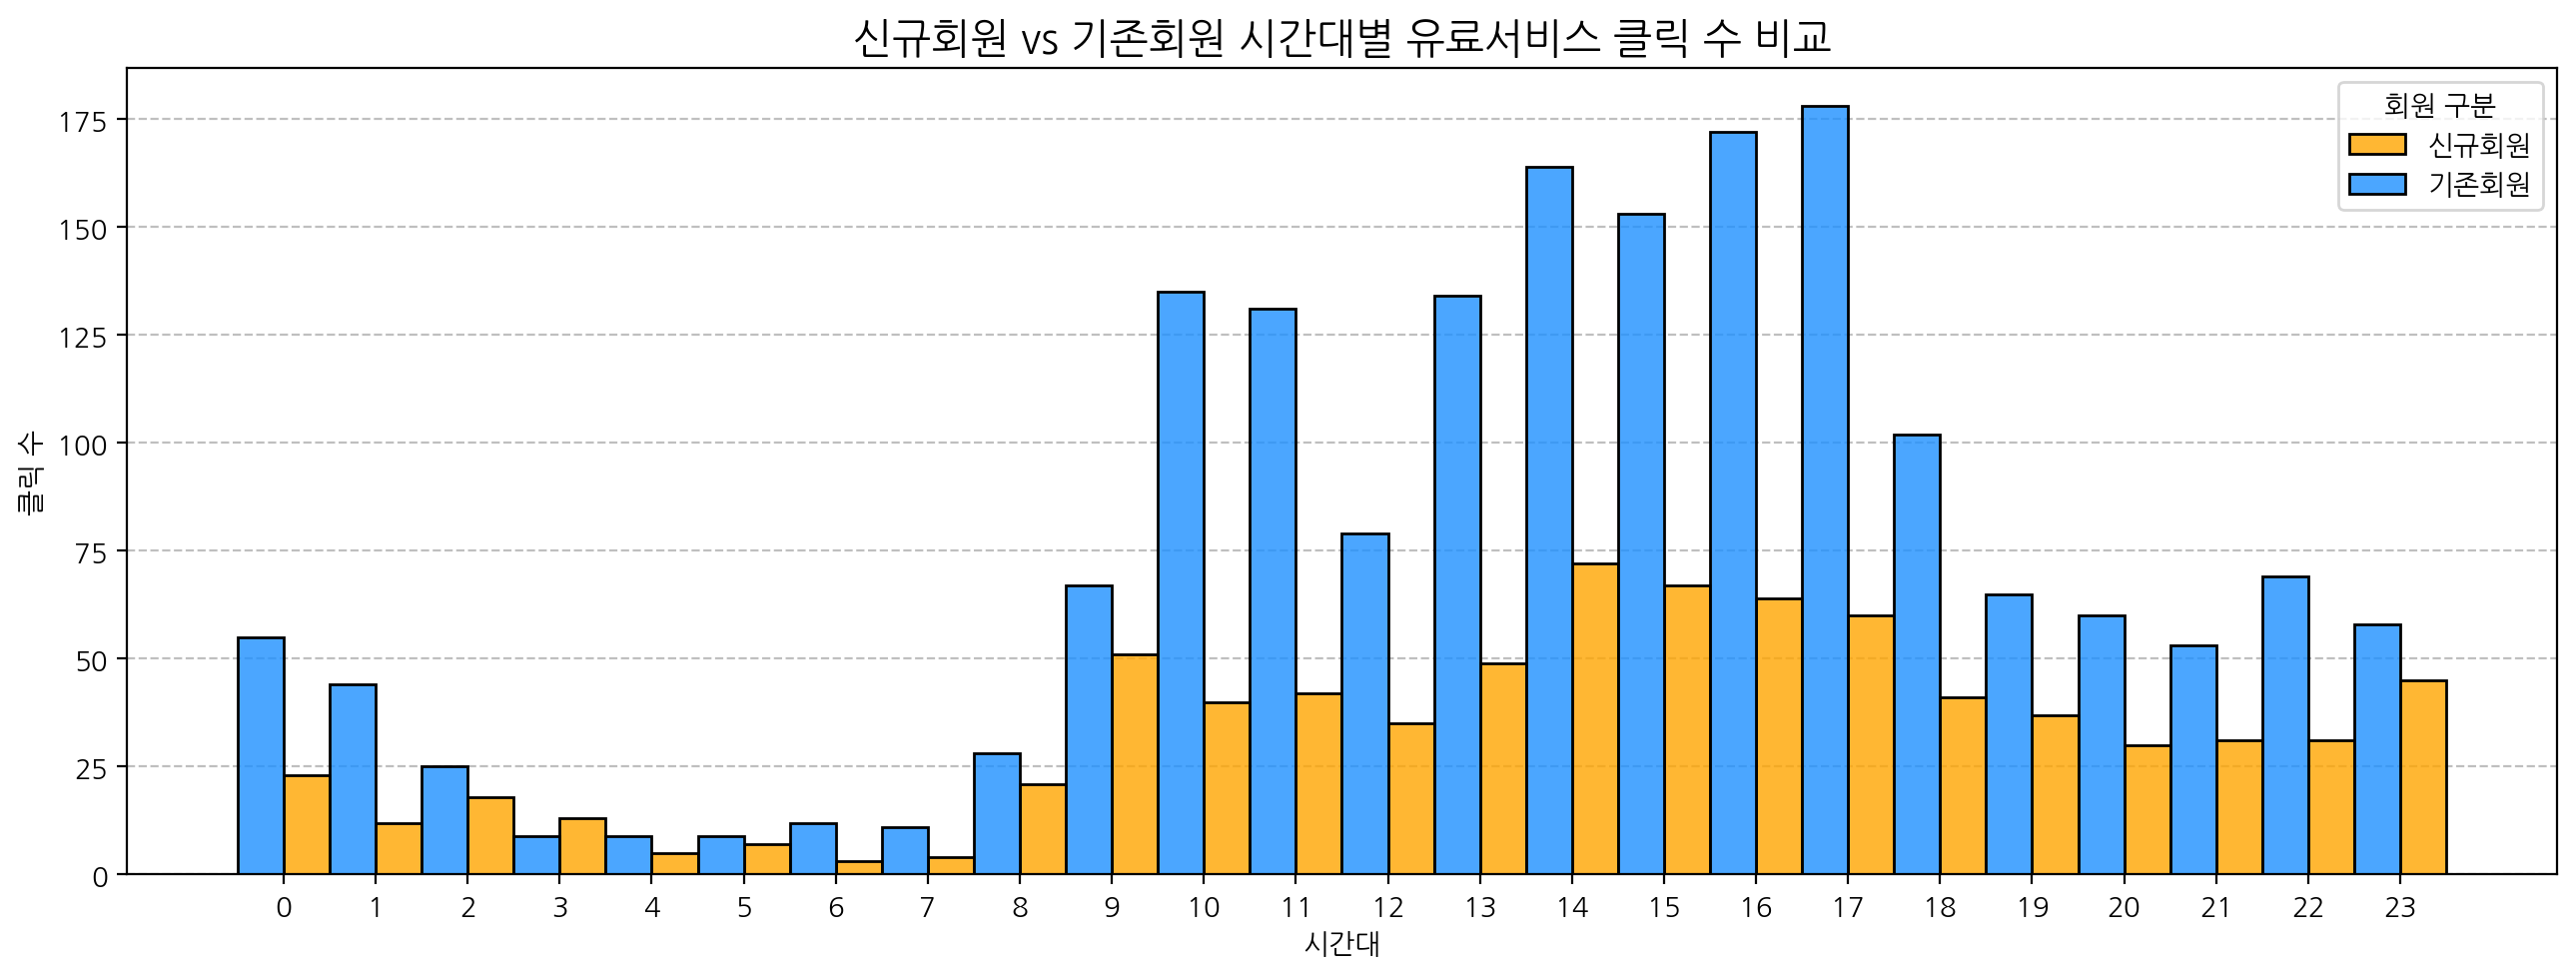

In [ ]:
clicked_new_users = clicked_new_users.copy()
clicked_existing_users = clicked_existing_users.copy()

clicked_new_users['user_type'] = '신규회원'
clicked_existing_users['user_type'] = '기존회원'

clicked_total = pd.concat([clicked_existing_users, clicked_new_users])

plt.figure(figsize=(13, 5))

sns.histplot(
    data=clicked_total,
    x='hour',
    hue='user_type',
    bins=24,
    discrete=True,
    multiple='dodge',
    palette={ '기존회원': 'dodgerblue', '신규회원': 'orange'},
    alpha=0.8,
    zorder=2
)

plt.title('신규회원 vs 기존회원 시간대별 유료서비스 클릭 수 비교', size=15)
plt.xlabel('시간대')
plt.ylabel('클릭 수')
plt.legend(title='회원 구분', labels=['신규회원', '기존회원'])
plt.grid(True, axis='y', linestyle='--', alpha=0.8, zorder=1)
plt.xticks(range(0, 24))

plt.tight_layout()
plt.show()


- 신규회원의 기업 유료서비스 누적 조회 시간대는 오전 9시 ~ 오전 10시, 오후 2시 ~ 오후 5시까지 많이 분포되어 있습니다.
- 기존회원의 기업 유료서비스 누적 조회 시간대는 오전 10시 ~ 오전 11시, 오후 1시 ~ 오후 5시까지 많이 분포되어 있습니다.

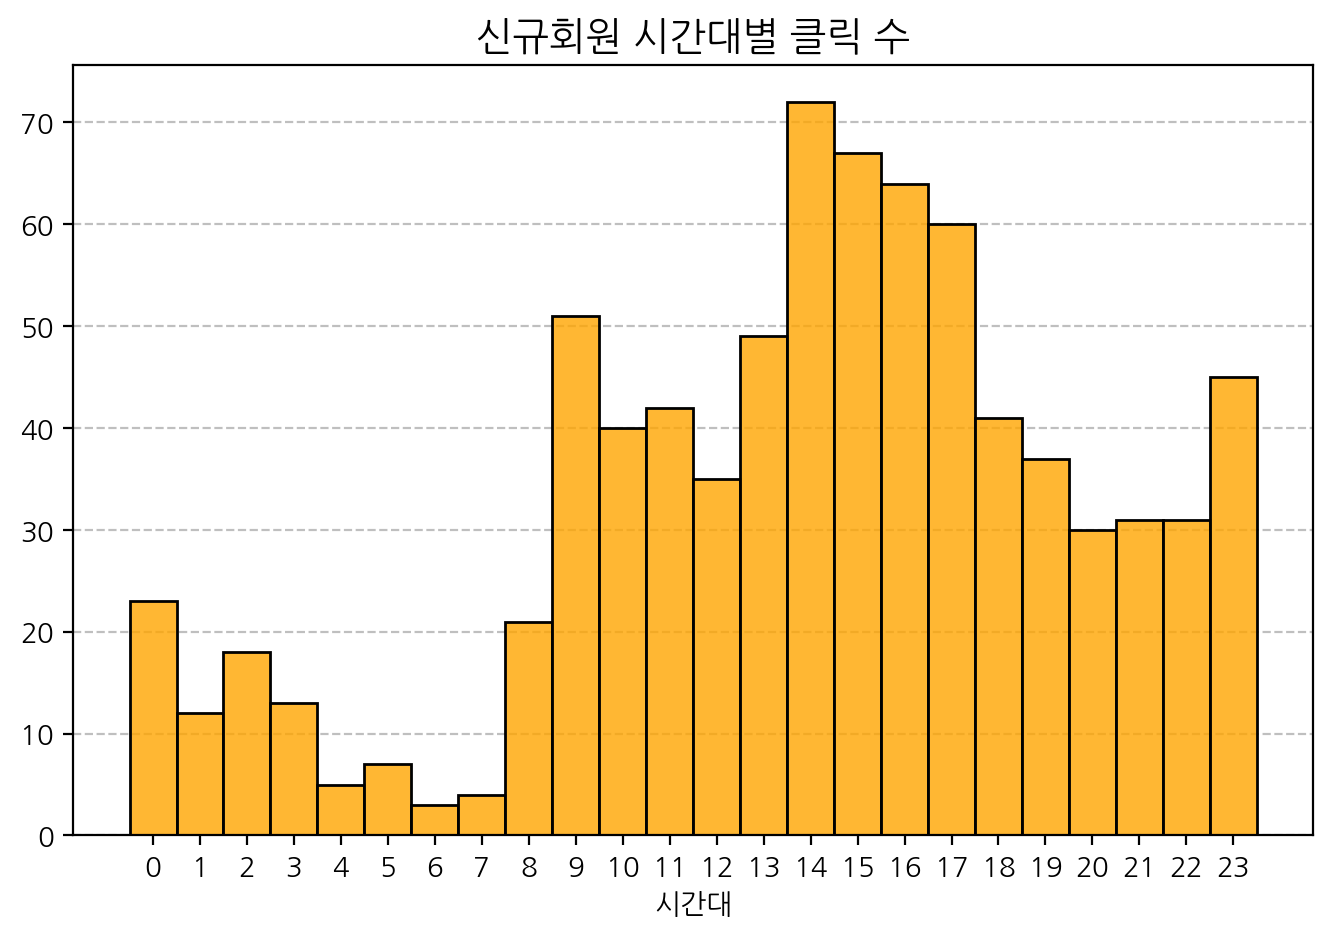

In [ ]:
# 신규회원 그래프
plt.figure(figsize=(8, 5))
sns.histplot(
    data=clicked_total[clicked_total['user_type'] == '신규회원'],
    x='hour',
    bins=24,
    discrete=True,
    color='orange',
    alpha=0.8,
    zorder=2
)
plt.title('신규회원 시간대별 클릭 수', size=14)
plt.xlabel('시간대')
plt.ylabel('')
plt.grid(True, axis='y', linestyle='--', alpha=0.8)
plt.xticks(range(0, 24))
plt.show()


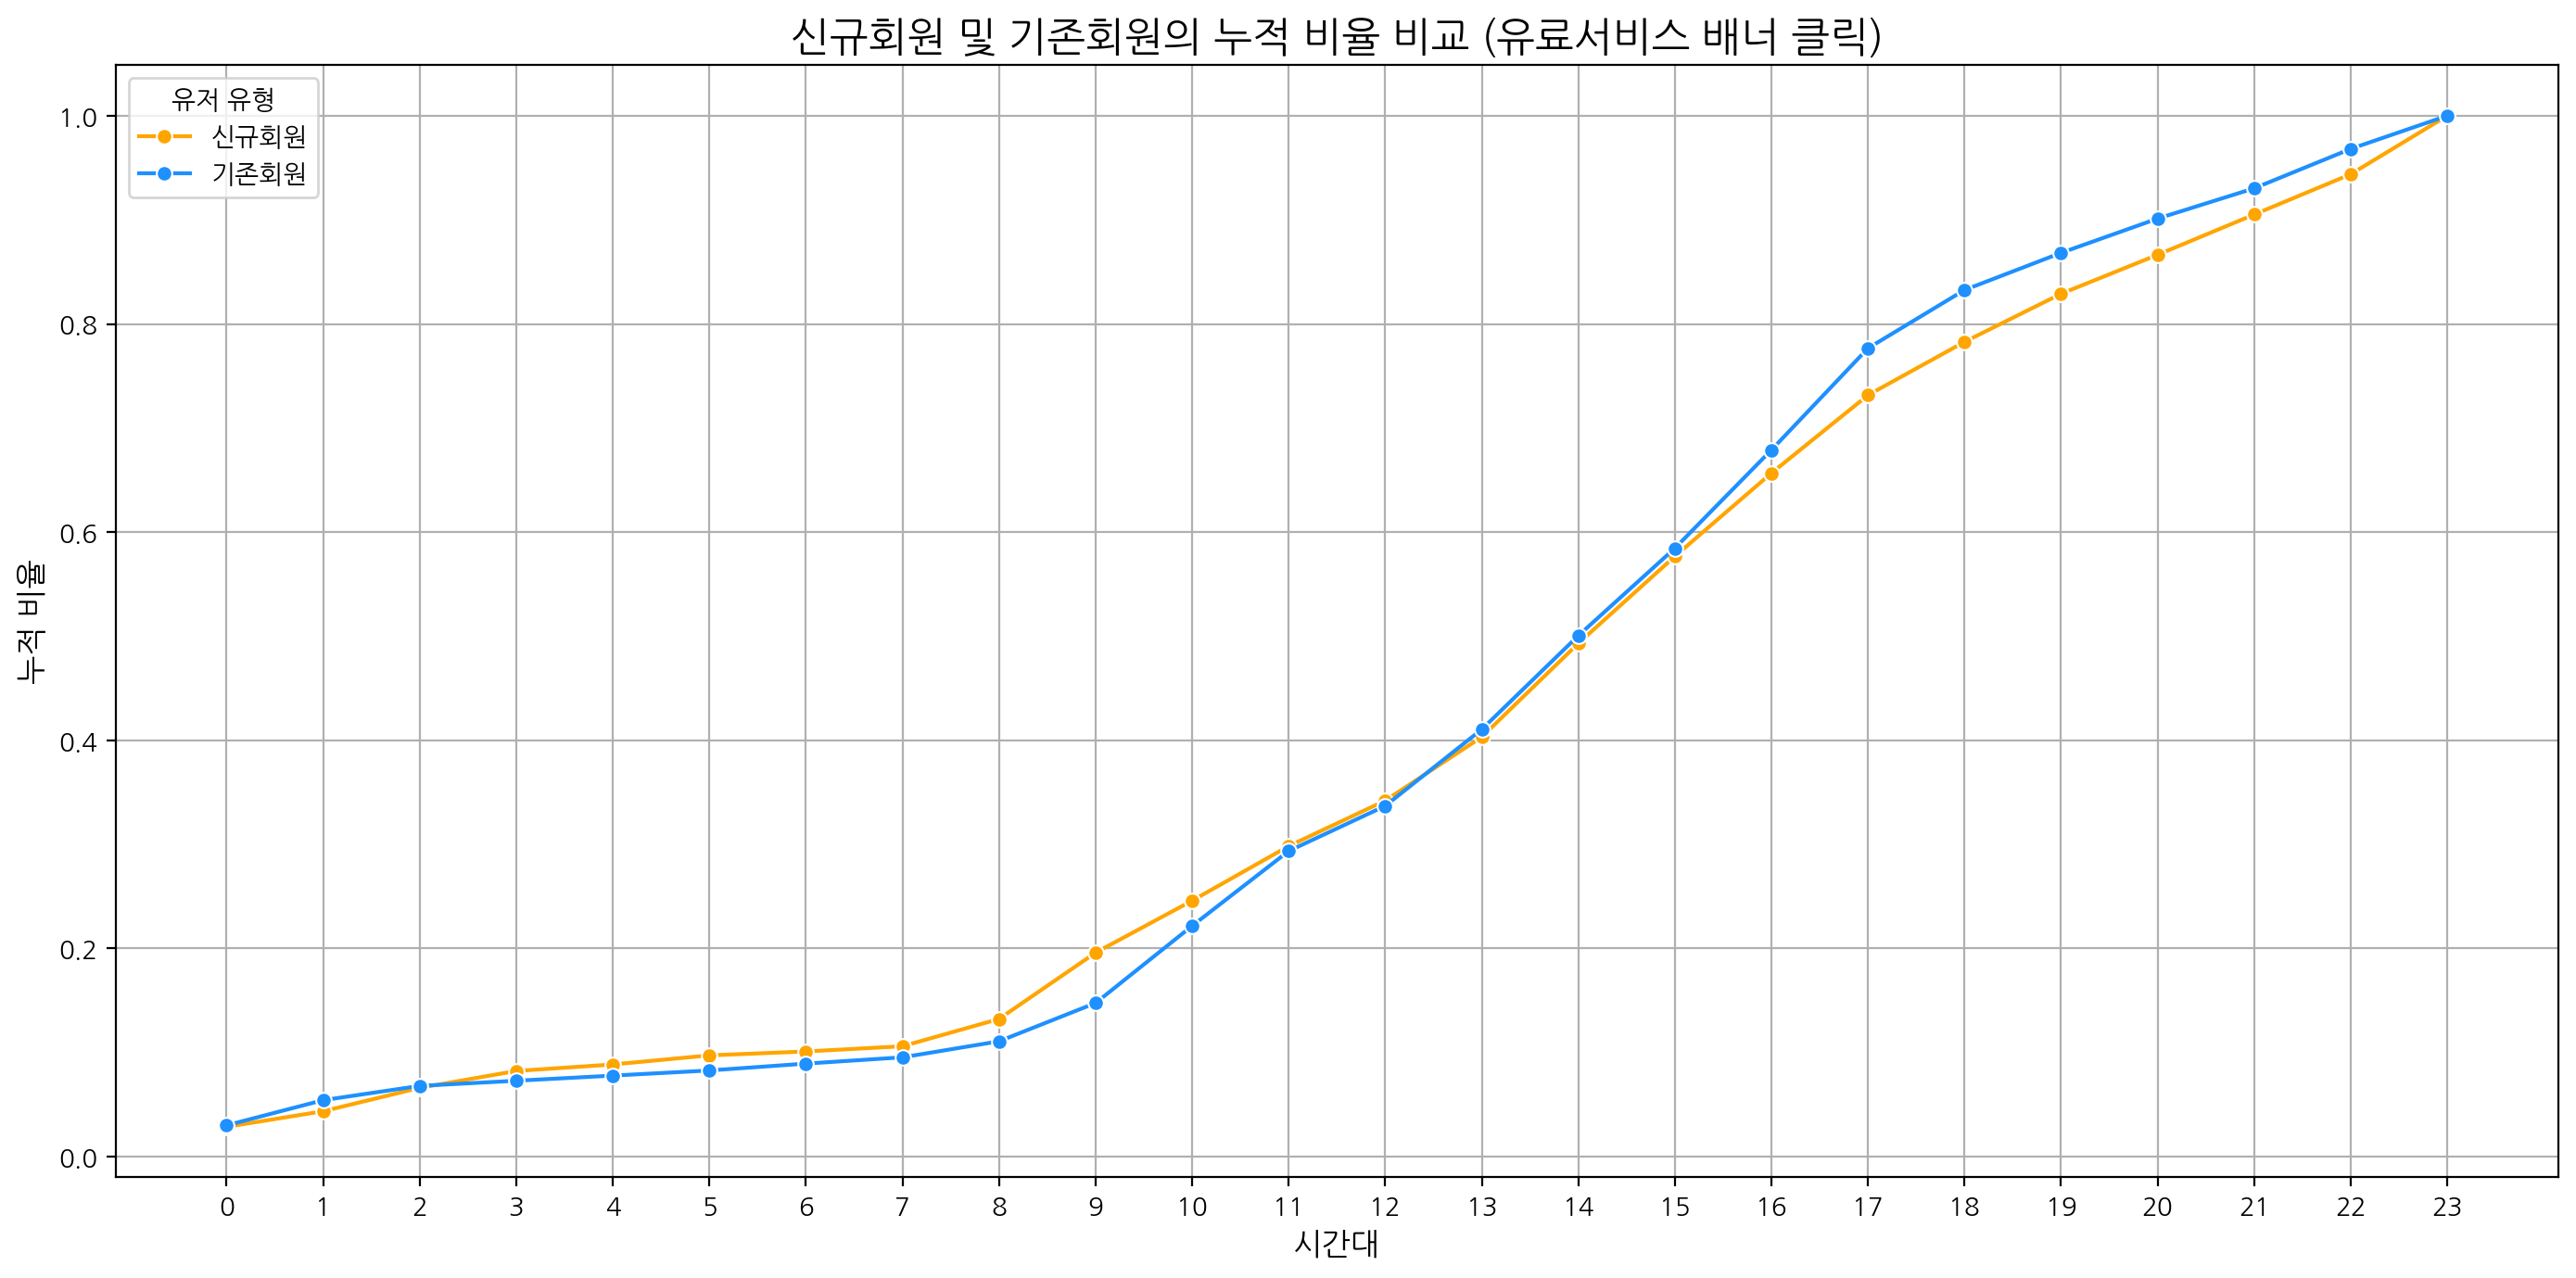

In [ ]:
## 누적 비율 그래프

# 전체 클릭 수
total_new_user_clicks = clicked_new_users.shape[0]
total_existing_user_clicks = clicked_existing_users.shape[0]

# 시간대별 클릭 수 계산
new_user_hourly_clicks = clicked_new_users['hour'].value_counts().sort_index()
existing_user_hourly_clicks = clicked_existing_users['hour'].value_counts().sort_index()

# 각 시간대 클릭 비율 계산
new_user_hourly_ratio = new_user_hourly_clicks / total_new_user_clicks
existing_user_hourly_ratio = existing_user_hourly_clicks / total_existing_user_clicks

# 누적 비율 계산
new_user_cumulative_ratio = new_user_hourly_ratio.cumsum()
existing_user_cumulative_ratio = existing_user_hourly_ratio.cumsum()

# 시각화
plt.figure(figsize=(14, 7))

# 신규회원 누적 비율
sns.lineplot(x=new_user_cumulative_ratio.index, y=new_user_cumulative_ratio, label='신규회원', color='orange', marker='o')

# 기존회원 누적 비율
sns.lineplot(x=existing_user_cumulative_ratio.index, y=existing_user_cumulative_ratio, label='기존회원', color='dodgerblue', marker='o')

# 설정
plt.title('신규회원 및 기존회원의 누적 비율 비교 (유료서비스 배너 클릭)', fontsize=16)
plt.xlabel('시간대', fontsize=12)
plt.ylabel('누적 비율', fontsize=12)
plt.xticks(range(0, 24))
plt.legend(title='유저 유형')
plt.grid(True)

plt.tight_layout()
plt.show()

- 신규회원(파란선)의 누적비율 증가율을 보면 오전 8시~오전 10시 간 증가율이 기존회원(빨간선)보다 높은 양상을 보입니다.
- 기존회원(빨간선)의 누적비율 증가율은 오후 4시~오후 10시 간 증가율이 신규회원(파란선)보다 높은 양상을 보입니다.

    💡 기업대상 유료서비스에 관한 추천 팝업, 관련 마케팅을 진행할 때
        - 기존회원(빨간선)은 오후 4시~오후 10시 사이
        - 신규회원(파란선)은 오전 8시~오전 10시 사이
    위와 같이 진행한다면 좀 더 큰 마케팅 효과를 기대할 수 있을 것이라 예상합니다.

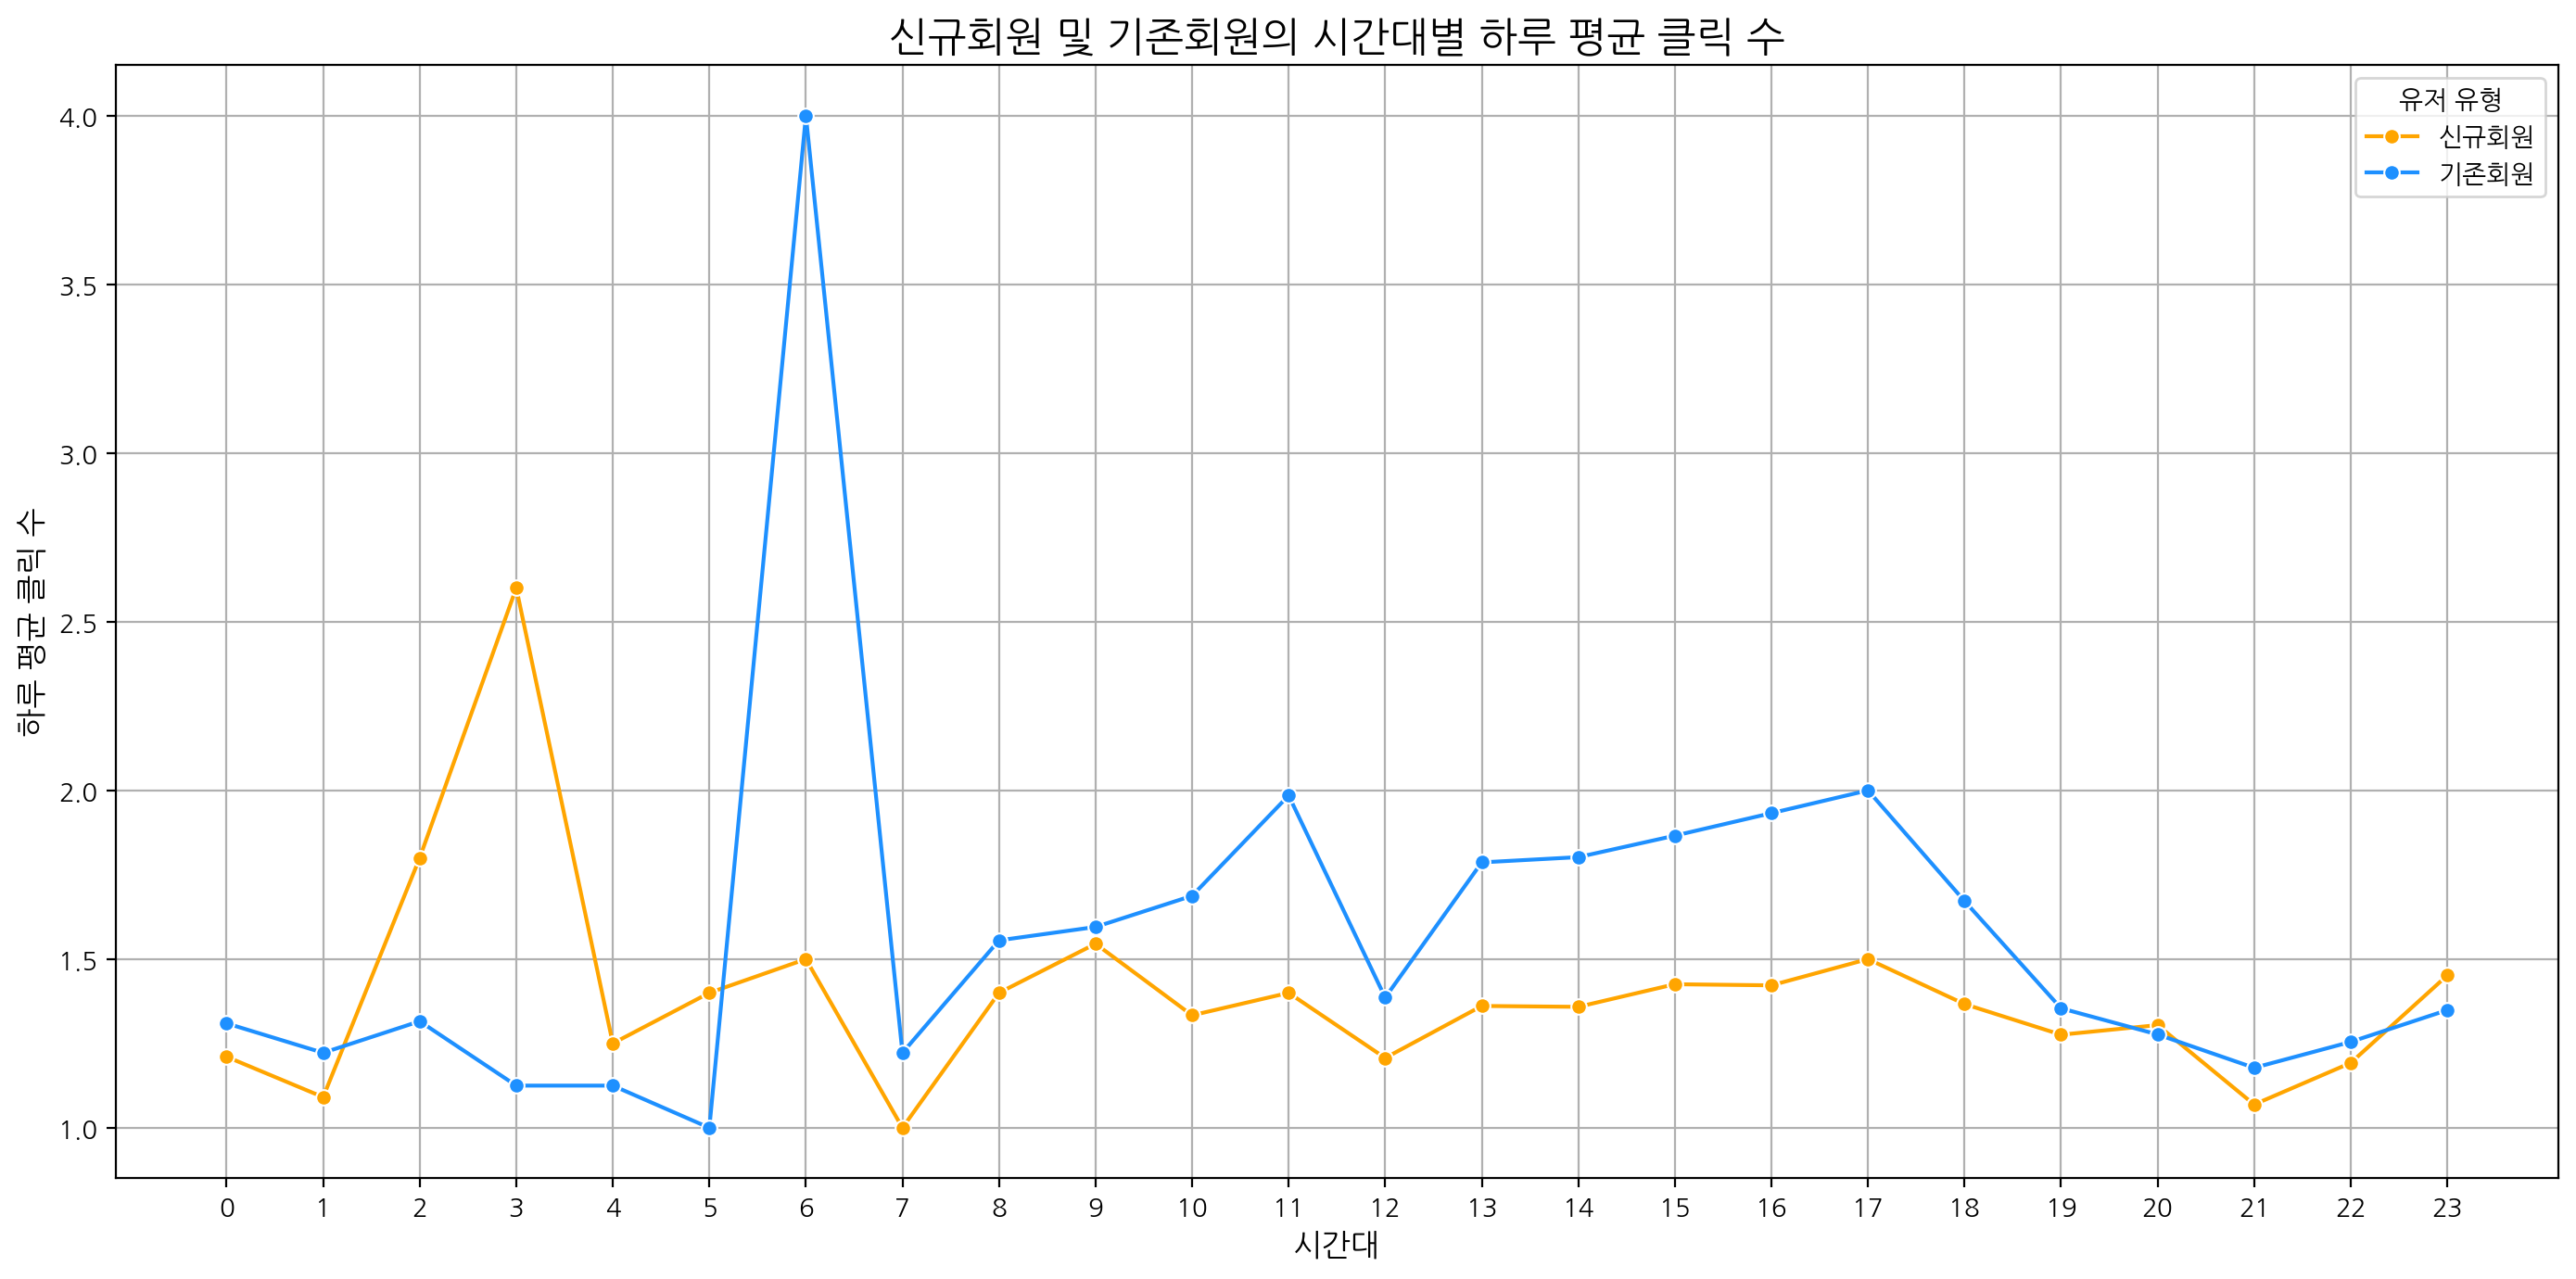

In [ ]:
# 시간대별 클릭 횟수 계산
new_user_clicks_per_hour = clicked_new_users.groupby(['user_uuid', 'hour']).size().reset_index(name='clicks')
existing_user_clicks_per_hour = clicked_existing_users.groupby(['user_uuid', 'hour']).size().reset_index(name='clicks')

# 시간대별 하루 평균 클릭 수 계산
new_user_avg_clicks_per_hour = new_user_clicks_per_hour.groupby('hour')['clicks'].mean().reset_index(name='avg_clicks')
existing_user_avg_clicks_per_hour = existing_user_clicks_per_hour.groupby('hour')['clicks'].mean().reset_index(name='avg_clicks')

# 시각화
plt.figure(figsize=(14, 7))

# 신규회원의 시간대별 하루 평균 클릭 수
sns.lineplot(x=new_user_avg_clicks_per_hour['hour'], y=new_user_avg_clicks_per_hour['avg_clicks'], label='신규회원', color='orange', marker='o')

# 기존회원의 시간대별 하루 평균 클릭 수
sns.lineplot(x=existing_user_avg_clicks_per_hour['hour'], y=existing_user_avg_clicks_per_hour['avg_clicks'], label='기존회원', color='dodgerblue', marker='o')

# 설정
plt.title('신규회원 및 기존회원의 시간대별 하루 평균 클릭 수', fontsize=16)
plt.xlabel('시간대', fontsize=12)
plt.ylabel('하루 평균 클릭 수', fontsize=12)
plt.xticks(range(0, 24))
plt.legend(title='유저 유형')
plt.grid(True)

plt.tight_layout()
plt.show()

⚠️ 신규회원은 오전 3시, 기존회원은 오전 6시에 갑자기 하루 평균 클릭수가 튀는 원인
- hour=3이나 hour=6에 클릭을 한 유저 수가 매우 적은데, 그 유저들이 상대적으로 많은 클릭을 하면 평균이 크게 부풀려집니다.
- 즉, 유저 수가 적은 시간대에서 소수 유저가 많이 클릭하면 평균이 왜곡될 수 있습니다.

➡️ 비율로 보는 것이 정확하게 파악할 수 있습니다.

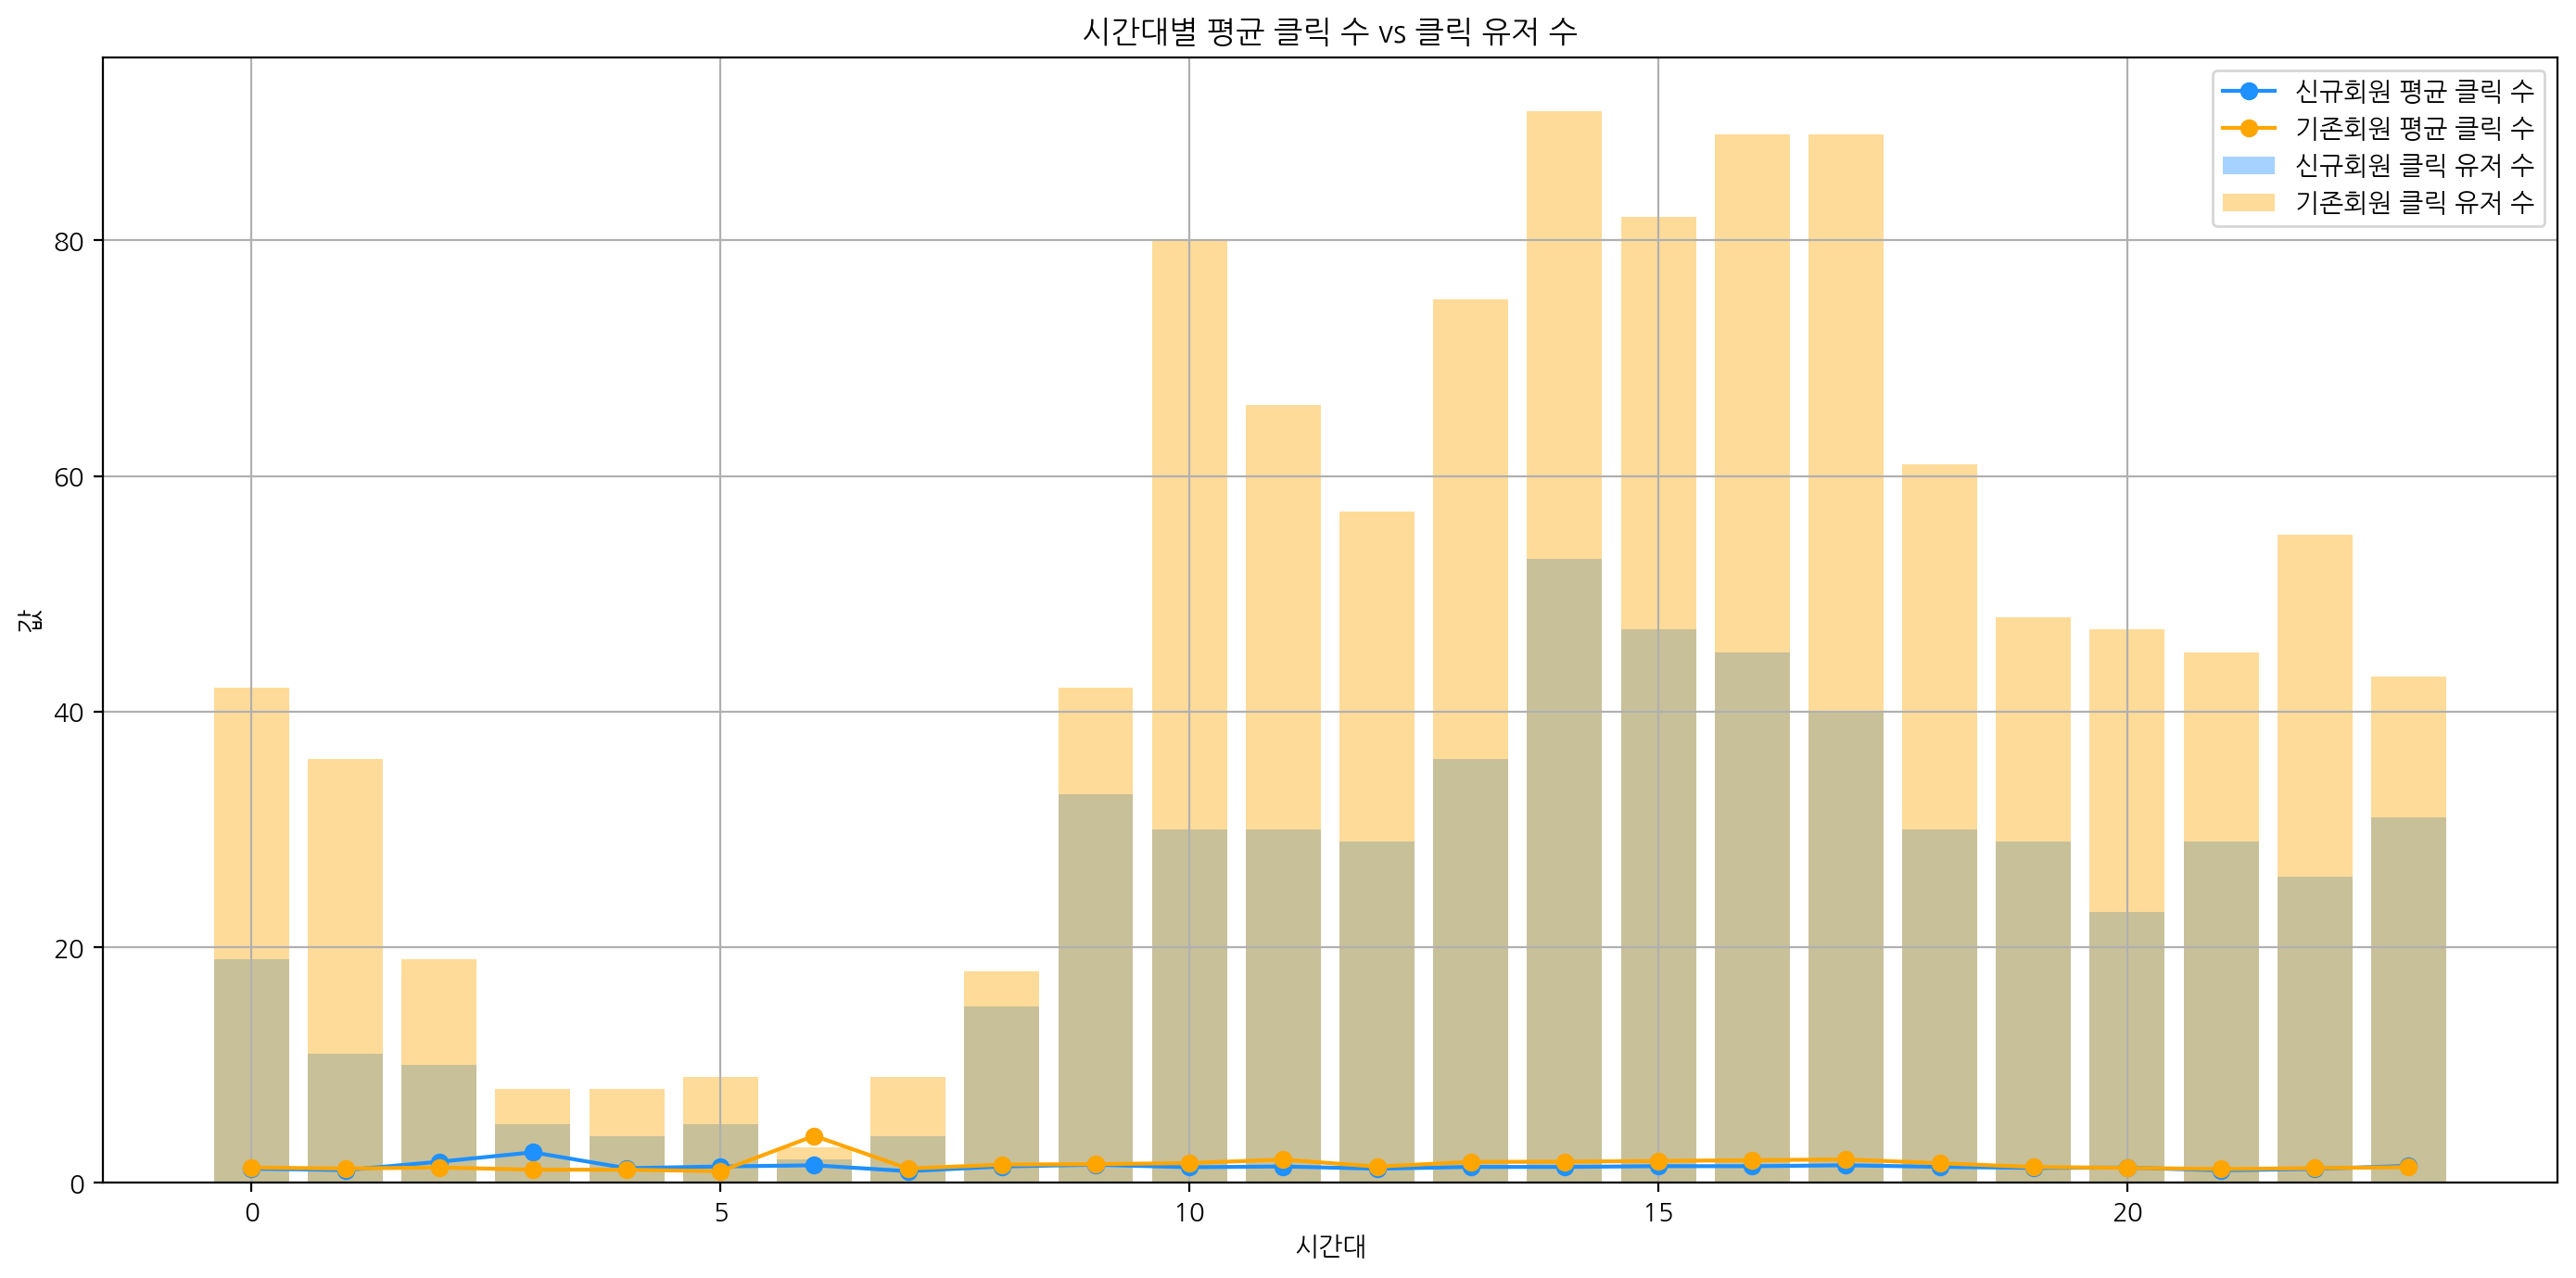

In [ ]:
# 신규회원 시간대별 클릭 유저 수 및 평균 클릭 수
new_user_stats = clicked_new_users.groupby(['hour', 'user_uuid']).size().reset_index(name='clicks')
new_user_summary = new_user_stats.groupby('hour').agg(
    user_count=('user_uuid', 'nunique'),
    avg_clicks=('clicks', 'mean'),
    total_clicks=('clicks', 'sum')
).reset_index()

# 기존회원도 동일하게
existing_user_stats = clicked_existing_users.groupby(['hour', 'user_uuid']).size().reset_index(name='clicks')
existing_user_summary = existing_user_stats.groupby('hour').agg(
    user_count=('user_uuid', 'nunique'),
    avg_clicks=('clicks', 'mean'),
    total_clicks=('clicks', 'sum')
).reset_index()

plt.figure(figsize=(14, 7))
plt.plot(new_user_summary['hour'], new_user_summary['avg_clicks'], label='신규회원 평균 클릭 수', color='dodgerblue', marker='o')
plt.bar(new_user_summary['hour'], new_user_summary['user_count'], label='신규회원 클릭 유저 수', color='dodgerblue', alpha=0.4)

plt.plot(existing_user_summary['hour'], existing_user_summary['avg_clicks'], label='기존회원 평균 클릭 수', color='orange', marker='o')
plt.bar(existing_user_summary['hour'], existing_user_summary['user_count'], label='기존회원 클릭 유저 수', color='orange', alpha=0.4)

plt.title('시간대별 평균 클릭 수 vs 클릭 유저 수')
plt.xlabel('시간대')
plt.ylabel('값')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

- 그래프를 보면 실제로 오전 3시, 오전 6시 부분은 기존회원, 신규회원 모두 클릭 수가 적은 시간대로 보입니다.
- 그런데 오전 3시에는 신규회원의 평균 클릭 수가 높게 나타나고, 오전 6시에는 기존회원의 평균 클릭 수가 높게 나타납니다.

    ⭐ 즉, 위에서 예상한 것처럼 새벽 3시, 6시에 클릭한 유저 수는 적은데 해당 소수 유저들이 많이 클릭을 해서 평균 그래프가 왜곡된 것입니다.
- 클릭 유저 수가 많은 시간대는 평균 왜곡의 가능성이 매우 적습니다.

⚠️ 클릭 유저 수가 적은데, 그들이 많은 클릭률을 보인 오전 3시와 오전 6시의 시각화 결과는 제외하고 해석할 수 있습니다.

## 5.2. 퍼널 분석

- 사용자 기반 퍼널
    - 목표 : 실제 유저가 이상적인 순서대로 퍼널을 완주했는지
    - 초점 : 퍼널을 완전히 따라간 사용자에 초점
    - 활용 : 유저 기반 마케팅 제안 가능
    - 퍼널 단계 설정 : 회원가입 페이지 진입 -> 회원가입완료 -> 프로필 작성/수정 -> 채용정보 조회 -> 지원서 작성 페이지 진입 step1 -> 지원서 작성 step2 -> 지원서 작성 step3 -> 지원서 작성 step4 -> 지원서 작성 - 제출 완료
        - 총 9단계로 구성

---


- log 기반 퍼널
    - 목표 : 모든 활동 로그를 기준으로 전체 흐름에서의 이탈률 측정
    - 초점 : 각 단계별 이탈율 및 병목 지점 파악에 초점
    - 활용 : UX, UI 개선 및 전환율 최적화 가능
    - 퍼널 단계 설정 : 프로필 작성/수정 -> 채용정보 조회 -> 지원서 작성 페이지 진입 step1 -> 지원서 작성 step2 -> 지원서 작성 step3 -> 지원서 작성성 step4 -> 지원서 작성 - 제출 완료
        - 총 7단계로 구성

---
- ✅ 왜 구성 방식이 다른가요?
    - User ID 기반 퍼널은 "정해진 이상적 흐름"을 기준으로 분석하기 때문에 회원가입 → 완료처럼 처음부터 전환까지 모두 포함됩니다.
    - Log 기반 퍼널은 행동 로그 자체가 기준이므로, 회원가입과 같이 1회만 발생하는 이벤트는 제외하는 것이 이탈률 계산에 왜곡을 줄입니다.

- ✅ 왜 지원서 작성만 단계가 나눠있나요?
    - 지원서 작성은 사용자의 실질적인 노력이 많이 필요한 핵심 전환 구간이기 때문에, step별로 세분화된 퍼널 구성이 필수입니다.
    - 이를 통해 이탈률, 병목 지점, UX 문제를 정확히 진단하고 개선할 수 있습니다.


### 5.2.1. user 기준 퍼널 분석

- User_id 기반으로 보는 이유
- ✅ 1. 개별 유저의 흐름을 명확하게 추적 가능
    - user_id는 각 사용자를 고유하게 식별하기 때문에, 한 명의 사용자가 퍼널의 어느 단계까지 도달했는지를 정확히 파악할 수 있습니다.

    - 예: A라는 사용자가 1단계부터 9단계까지 어떤 순서로 행동했는지 확인 가능

- ✅ 2. 실제 전환 성공 유저 수 파악 가능
    - 단순히 로그 수로 보는 게 아니라, 완전히 전환한 "사람 수"를 기준으로 분석함으로써 실질적 성과를 파악할 수 있습니다.

    - 예: 1명이 100번 로그를 남겨도 전환은 1번일 뿐

#### 5.2.1.1. 이상적 퍼널을 따른 유저 분석

In [ ]:
# 1. 이상적 퍼널 단계 정의 (선택적 단계는 리스트로 표현)
ideal_funnel = [
    "회원가입 페이지 진입",
    "회원가입완료",
    "프로필 작성/수정",
    "채용정보 조회",
    "지원서 작성 페이지 진입 - step1",  # 두 단계 통합
    "지원서 작성 - step2",
    ["지원서 작성 - step3", None],     # 선택적 단계
    "지원서 작성 - step4",
    "지원서 작성 - 제출 완료"
]
# 2. '지원서 작성 페이지 진입 - 경력 입력' 단계로 변환하는 함수
def unify_support_write_stage(action):
    if action in ["지원서 작성 - 페이지 진입", "지원서 작성 - step1"]:
        return "지원서 작성 페이지 진입 - step1"
    return action


# 3. 신입 유저 추출 (회원가입 완료 포함 유저)
new_users = log_df[log_df['action_type'] == "회원가입완료"]['user_uuid'].unique()

# 4. 최초 회원가입 페이지 진입 시점 추출
signup_page_logs = log_df[
    (log_df['user_uuid'].isin(new_users)) &
    (log_df['action_type'] == "회원가입 페이지 진입")
]

first_signup_page = signup_page_logs.groupby('user_uuid')['timestamp_log'].min().reset_index()
first_signup_page = first_signup_page.rename(columns={'timestamp_log': 'first_signup_page_ts'})


# 5. 최초 회원가입 페이지 진입 시점 이후 로그만 필터링
filtered_logs = pd.merge(log_df, first_signup_page, on='user_uuid')
filtered_logs = filtered_logs[filtered_logs['timestamp_log'] >= filtered_logs['first_signup_page_ts']].copy()


# 6. '지원서 작성 페이지 진입 - 경력 입력' 단계로 변환 적용
filtered_logs['action_type_unified'] = filtered_logs['action_type'].apply(unify_support_write_stage)


# 7. 퍼널 체크 함수 (선택적 단계 포함)
def check_funnel_with_optional(steps, funnel):
    idx = 0  # 이상적 퍼널 인덱스
    step_idx = 0  # 유저 행동 인덱스

    while idx < len(funnel) and step_idx < len(steps):
        current_funnel_stage = funnel[idx]

        if isinstance(current_funnel_stage, list):
            # 선택적 단계 처리
            # 선택적 단계가 있으면 매칭 시 다음 퍼널 단계로, 아니면 건너뜀
            if steps[step_idx] == current_funnel_stage[0]:
                step_idx += 1
            idx += 1
        else:
            # 필수 단계
            if steps[step_idx] == current_funnel_stage:
                idx += 1
                step_idx += 1
            else:
                step_idx += 1  # 중간 액션 무시

    return idx == len(funnel)
# 8. 유저별 퍼널 통과 여부 판단
valid_users = []

for user, group in filtered_logs.groupby('user_uuid'):
    steps = group.sort_values('timestamp_log')['action_type_unified'].tolist()
    if check_funnel_with_optional(steps, ideal_funnel):
        valid_users.append(user)

print(f"이상적 퍼널을 따른 2022 ~ 2023년도 신입 유저 수: {len(valid_users)}")


# 9. 유효 유저들의 최초 활동 로그 (회원가입 페이지 진입 시점) 추출 및 연도 정보 추가
initial_logs = filtered_logs[
    (filtered_logs['user_uuid'].isin(valid_users)) &
    (filtered_logs['timestamp_log'] == filtered_logs['first_signup_page_ts'])
].copy()

# timestamp에서 연도 추출
initial_logs['year'] = initial_logs['timestamp_log'].dt.year

# 2022, 2023년도만 필터링 (필요 시)
initial_logs = initial_logs[initial_logs['year'].isin([2022, 2023])]

# 연도별, action_type별 신입 유저 수 집계
summary = initial_logs.groupby(['year', 'action_type'])['user_uuid'].nunique().reset_index()
summary = summary.rename(columns={'user_uuid': '신입 유저 수'})

# Total 행 추가
total = summary.groupby('action_type')['신입 유저 수'].sum().reset_index()
total['year'] = 'Total'

# 컬럼 순서 맞추기
total = total[['year', 'action_type', '신입 유저 수']]

# 최종 결과 합치기
final_summary = pd.concat([summary, total], ignore_index=True)

# 출력
print(final_summary)

이상적 퍼널을 따른 2022 ~ 2023년도 신입 유저 수: 4360
    year  action_type  신입 유저 수
0   2022  회원가입 페이지 진입     2559
1   2023  회원가입 페이지 진입     1801
2  Total  회원가입 페이지 진입     4360


##### 5.2.1.1.1. 해석 및 목적

- 🎯 목적 (Purpose)   
     - 2022년부터 2023년까지의 기간 동안 정상적인 유입 흐름을 타고 전환 퍼널을 모두 완주한 신규 사용자 수를 확인하여,
전환 퍼널의 효율성, 온보딩 유입 구조의 안정성, 시기별 전환 성공률을 분석하는 데 있습니다.

- 데이터 요약

|연도 | 최초 액션 | 유입 사용자 수|
|---|----------|-------------|
|2022 | Member Registration Page | 2,560명|
|2023 | Membership Page Enter | 1,800명|
|총합 | Membership Sign Up | 4,360명 ✅|

- 해석
    - 온보딩 유입 규모: 2022년 대비 2023년 신규 유입 사용자가 다소 감소했음을 알 수 있습니다. (2,560명 → 1,800명)
    - 전환 퍼널 완주자: 총 4,360명이 정상적인 전환 퍼널을 완주하여 회원가입을 성공적으로 마쳤다는 점에서 온보딩 프로세스의 전체적인 안정성을 확인할 수 있습니다.
    - 퍼널 효율성 및 안정성 평가: 시기별 유입과 전환 데이터를 바탕으로 각 단계별 이탈률, 전환 성공률을 분석하면, 특정 시기나 단계에서 발생하는 문제점들을 파악하고 개선 방향을 설정할 수 있습니다.
    - 전략적 시사점: 2023년 유입이 감소한 원인을 분석하고, 신규 사용자 확보 및 전환율 개선을 위한 마케팅 및 UX 전략을 재검토할 필요가 있습니다.

#### 5.2.1.2 신규 사용자 퍼널 전환 분석 해석

In [ ]:
# 1. user_uuid별 action_type_unified 리스트 생성 (기존 코드)
user_sequences = (
    filtered_logs.groupby('user_uuid')['action_type_unified']
    .apply(list)
    .reset_index(name='actions')
)

# 2. user_uuid별 최초 활동 timestamp (first_signup_page_ts)에서 연도 추출 추가
# filtered_logs에 이미 'first_signup_page_ts'가 있으므로 user별로 최소값을 따로 구함
user_year_df = (
    filtered_logs.groupby('user_uuid')['first_signup_page_ts']
    .min()
    .reset_index()
)
user_year_df['year'] = user_year_df['first_signup_page_ts'].dt.year

# 3. 최대 도달 퍼널 단계 계산 함수 (기존 코드)
def get_max_funnel_stage(actions, funnel):
    idx = 0
    for act in actions:
        current_funnel = funnel[idx]
        if isinstance(current_funnel, list):  # 선택적 단계
            if act == current_funnel[0]:
                idx += 1
        elif act == current_funnel:
            idx += 1
        if idx == len(funnel):
            break
    return idx

user_sequences['funnel_stage'] = user_sequences['actions'].apply(lambda x: get_max_funnel_stage(x, ideal_funnel))

# 4. user_sequences에 연도 컬럼 병합
user_sequences = user_sequences.merge(user_year_df[['user_uuid', 'year']], on='user_uuid', how='left')

# 5. 이탈 사용자 필터링 및 이탈 단계 카운팅 함수 정의
def get_dropout_stage_counts(df):
    dropout_users = df[df['funnel_stage'] < len(ideal_funnel)]
    counts = Counter(dropout_users['funnel_stage'])
    return counts

# 6. 연도별 이탈 단계 카운팅
years = [2022, 2023]
funnel_labels = [stage[0] if isinstance(stage, list) else stage for stage in ideal_funnel]

dropout_counts_per_year = {}

for y in years:
    counts = get_dropout_stage_counts(user_sequences[user_sequences['year'] == y])
    dropout_counts_per_year[y] = counts

# 7. 전체(Total) 이탈 단계 카운팅
dropout_counts_per_year['Total'] = get_dropout_stage_counts(user_sequences)

# 8. 결과를 DataFrame으로 변환
def counts_to_df(counts, year_label):
    data = []
    for stage_idx, count in counts.items():
        stage_name = funnel_labels[stage_idx]
        data.append({'year': year_label, 'funnel_stage': stage_name, 'user_count': count})
    return pd.DataFrame(data)

df_list = []
for k, v in dropout_counts_per_year.items():
    df_list.append(counts_to_df(v, k))

final_dropout_df = pd.concat(df_list, ignore_index=True)

# 9. 출력용 텍스트 생성
result_lines = ["📉 퍼널 이탈 지점별 사용자 수 (연도별)"]
for year in years + ['Total']:
    result_lines.append(f"\n[{year}]")
    temp_df = final_dropout_df[final_dropout_df['year'] == year]
    for _, row in temp_df.sort_values('user_count', ascending=False).iterrows():
        result_lines.append(f"{row['funnel_stage']}: {row['user_count']}명")

user_total_result2 = "\n".join(result_lines)
print(user_total_result2)

📉 퍼널 이탈 지점별 사용자 수 (연도별)

[2022]
지원서 작성 - step3: 352명
지원서 작성 - step4: 319명
지원서 작성 페이지 진입 - step1: 318명
지원서 작성 - 제출 완료: 247명
회원가입완료: 231명
지원서 작성 - step2: 227명
채용정보 조회: 38명
프로필 작성/수정: 20명

[2023]
지원서 작성 페이지 진입 - step1: 443명
지원서 작성 - step3: 226명
회원가입완료: 207명
지원서 작성 - step4: 148명
지원서 작성 - step2: 129명
지원서 작성 - 제출 완료: 85명
채용정보 조회: 69명
프로필 작성/수정: 52명

[Total]
지원서 작성 페이지 진입 - step1: 761명
지원서 작성 - step3: 578명
지원서 작성 - step4: 467명
회원가입완료: 438명
지원서 작성 - step2: 356명
지원서 작성 - 제출 완료: 332명
채용정보 조회: 107명
프로필 작성/수정: 72명


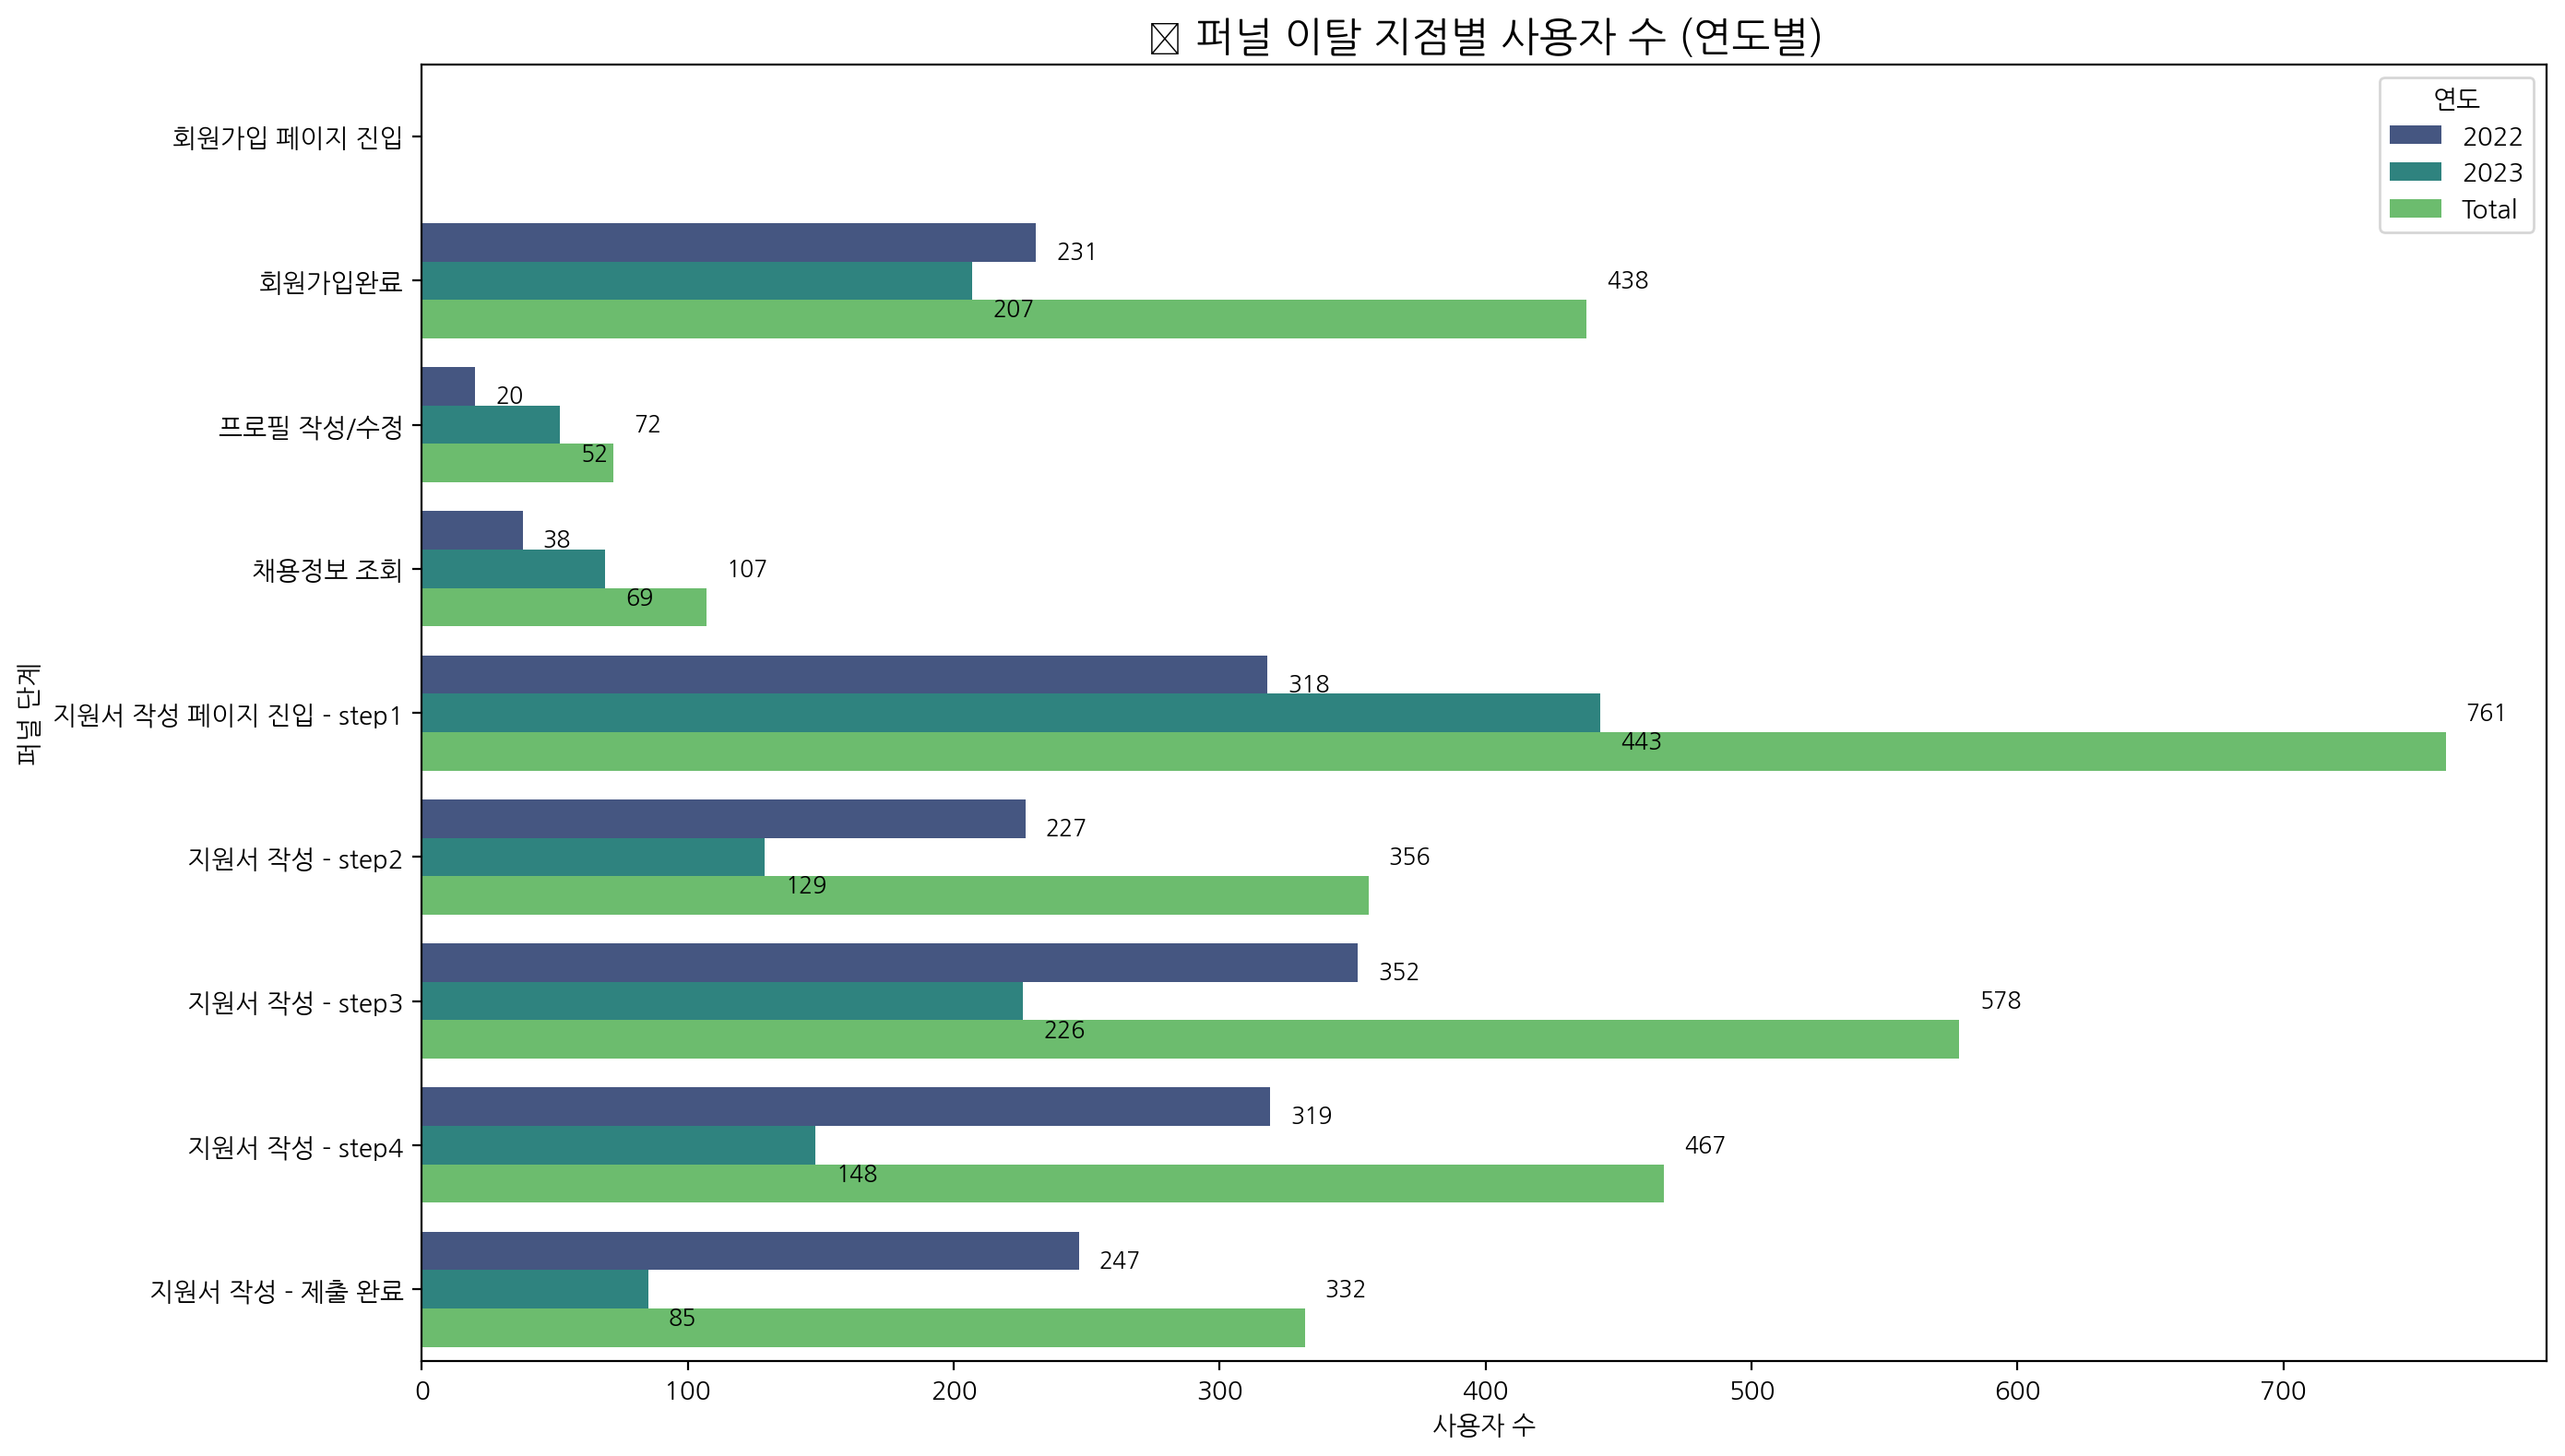

In [ ]:
plt.figure(figsize=(14,8))
sns.barplot(
    data=final_dropout_df,
    y='funnel_stage',
    x='user_count',
    hue='year',
    order=funnel_labels,
    palette='viridis'
)

plt.title('📉 퍼널 이탈 지점별 사용자 수 (연도별)', fontsize=16)
plt.xlabel('사용자 수')
plt.ylabel('퍼널 단계')
plt.legend(title='연도')

for i, row in final_dropout_df.iterrows():
    y_pos = funnel_labels.index(row['funnel_stage'])
    year_order = {2022: -0.2, 2023: 0.2, 'Total': 0.0}
    offset = year_order.get(row['year'], 0)
    plt.text(
        row['user_count'] + max(final_dropout_df['user_count']) * 0.01,
        y_pos + offset,
        f"{row['user_count']}",
        color='black',
        va='center',
        fontsize=9
    )

plt.tight_layout()
plt.show()

##### 5.2.1.2.1 해석 및 목적

- 🎯 분석 목적 (Purpose of Analysis)
    - 신규 유저 유입 및 전환 흐름 파악

        - 2022년과 2023년 동안 서비스에 신규 유입된 사용자 수와 이들이 퍼널을 통해 어디까지 이동하고, 언제 이탈했는지를 분석합니다.

    - 퍼널 완주율(Conversion Completion Rate) 측정

        - 회원가입 → 프로필 작성 → 채용정보 탐색 → 지원서 작성 → 제출까지의 이상적 전환 퍼널 흐름을 얼마나 많은 사용자가 완료했는지 확인합니다.

    - 이탈 지점(Departure Points) 분석

        - 퍼널 각 단계별 이탈률과 전환률을 파악해, 어떤 단계에서 사용자가 이탈하며, 어떤 UX 또는 시스템 요소가 개선되어야 하는지 진단합니다.

    - 마케팅 및 UX 전략 방향 수립

        - 유입 감소 원인 및 전환 흐름 분석을 바탕으로, 신규 유저 유입 강화 및 전환 최적화 전략을 수립합니다.

- 📉 퍼널 이탈 지점별 사용자 수 분석 (연도별 비교)

|퍼널 단계 | 2022명 | 2023명 | 총합(Total) | 🔍 해석|
|-------|------|-------|------|------|
|지원서 작성 페이지 진입 - step1 | 318 | 443 | 761 | 🔺 가장 큰 이탈 구간 → UX 진입 장벽 존재 가능성|
|지원서 작성 - step3 | 353 | 225 | 578 | 중간 작성 과정에서 피로감 또는 입력 유도 부족|
|지원서 작성 - step4 | 319 | 148 | 467 | 마무리 작성 구간 이탈 → UX 불친절 가능성|
|회원가입 완료 직후 이탈 | 231 | 207 | 438 | 온보딩 설계 및 콘텐츠 유도 부족 가능성|
|지원서 작성 - step2 | 227 | 129 | 356 | 작성 시작 단계 중 이탈 → 심리적 진입 장벽|
|지원서 작성 - 제출 완료 전 이탈 | 247 | 85 | 332 | 기술적 문제 or 제출 과정 혼란 가능성|
|채용정보 조회 후 이탈 | 38 | 69 | 107 | 관심은 있지만 지원까지 이어지지 않음|
|프로필 작성/수정 중 이탈 | 20 | 52 | 72 | 낮은 비중, 하지만 UX 진입 요소 점검 필요|

- 🧠 해석 요약 (Interpretation)
    - 🔺 가장 큰 이탈 구간:
        - 지원서 작성 페이지 진입 - step1
        - → 2023년 특히 이탈 증가 (318명 → 443명)
        - → 진입 직후의 UI 혼란, 정보 과다, 기대 불일치 가능성

    - 🧩 중간 작성 이탈(STEP2~4)
        - Step3에서 578명, Step4에서 467명
        - → 입력 항목 과다, 피로감, 저장 기능 부족 등 작성 지속 유도 실패

    - ❗ 회원가입 후 즉시 이탈
        - 약 438명
        - → 온보딩 콘텐츠 부족, 즉시 이어지는 유도 실패 가능성

- 🛠 전략적 개선 제안 (Strategic Suggestions)

|이탈 위치 | 개선 포인트|
|-----|-------|
|지원서 진입 (step1) | - 입력 전 안내 메시지 강화- 간단한 시작 → 단계적 확장- 진입 유도 CTA 강조|
|중간 작성 단계 (step2~4) | - 자동 저장, 작성 중단 시 이어쓰기 기능- 피로감 완화: 필수 항목 구분 & UI 단순화|
|제출 직전 | - 제출 버튼 강조- 검토 화면 개선 + 제출 오류 방지 UX|
|회원가입 후 이탈 | - 첫 화면에 추천 채용, 알림 설정 유도- 즉시 사용할 수 있는 기능 노출 필요|

- ✅ 결론 요약
    - 전체적으로 가장 큰 이탈은 지원서 작성 진입 시점

    - 작성 중간단계 (step3, step4)에서도 높은 이탈율 존재

    - 이탈률을 줄이기 위한 심리적/UX적 설계 개선이 필수

    - 2023년은 회원가입 후 이탈은 다소 줄었지만, 지원서 진입 이탈은 증가

#### 5.2.1.3 퍼널 단계별 전환률 분석

In [ ]:
# 각 단계별 유저 수 계산 함수
stage_counts = []
def compute_funnel_conversion(user_sequences_df, funnel, year_label):
    stage_counts = []
    for i, stage in enumerate(funnel):
        label = stage[0] if isinstance(stage, list) else stage
        count = (user_sequences_df['funnel_stage'] >= i + 1).sum()
        stage_counts.append((label, count))

    # 전환율 계산
    conversion_data = []
    for i in range(len(stage_counts) - 1):
        current_label, current_count = stage_counts[i]
        next_label, next_count = stage_counts[i + 1]
        rate = (next_count / current_count * 100) if current_count else 0
        conversion_data.append({
            "Year": year_label,
            "From": current_label,
            "To": next_label,
            "Current Users": current_count,
            "Next Users": next_count,
            "Conversion Rate (%)": round(rate, 2)
        })
    return pd.DataFrame(conversion_data)

# 연도별 계산
conversion_df_list = []
for year in [2022, 2023]:
    year_df = user_sequences[user_sequences['year'] == year]
    conv_df = compute_funnel_conversion(year_df, ideal_funnel, year)
    conversion_df_list.append(conv_df)

# 전체 데이터 계산
conv_total_df = compute_funnel_conversion(user_sequences, ideal_funnel, "Total")
conversion_df_list.append(conv_total_df)

# 통합
full_conversion_df = pd.concat(conversion_df_list, ignore_index=True)

# 📄 출력용 텍스트 생성
lines = ["\n📊 2022 / 2023 / Total 퍼널 단계별 전환율:"]
for year in [2022, 2023, "Total"]:
    lines.append(f"\n[{year}]")
    temp_df = full_conversion_df[full_conversion_df["Year"] == year]
    lines.append(temp_df.to_string(index=False))
user_total_result3 = "\n".join(lines)
print(user_total_result3)


📊 2022 / 2023 / Total 퍼널 단계별 전환율:

[2022]
Year                  From                    To  Current Users  Next Users  Conversion Rate (%)
2022           회원가입 페이지 진입                회원가입완료           2797        2566                91.74
2022                회원가입완료             프로필 작성/수정           2566        2546                99.22
2022             프로필 작성/수정               채용정보 조회           2546        2508                98.51
2022               채용정보 조회 지원서 작성 페이지 진입 - step1           2508        2190                87.32
2022 지원서 작성 페이지 진입 - step1        지원서 작성 - step2           2190        1963                89.63
2022        지원서 작성 - step2        지원서 작성 - step3           1963        1611                82.07
2022        지원서 작성 - step3        지원서 작성 - step4           1611        1292                80.20
2022        지원서 작성 - step4        지원서 작성 - 제출 완료           1292        1045                80.88

[2023]
Year                  From                    To  Current Users  Next Users 

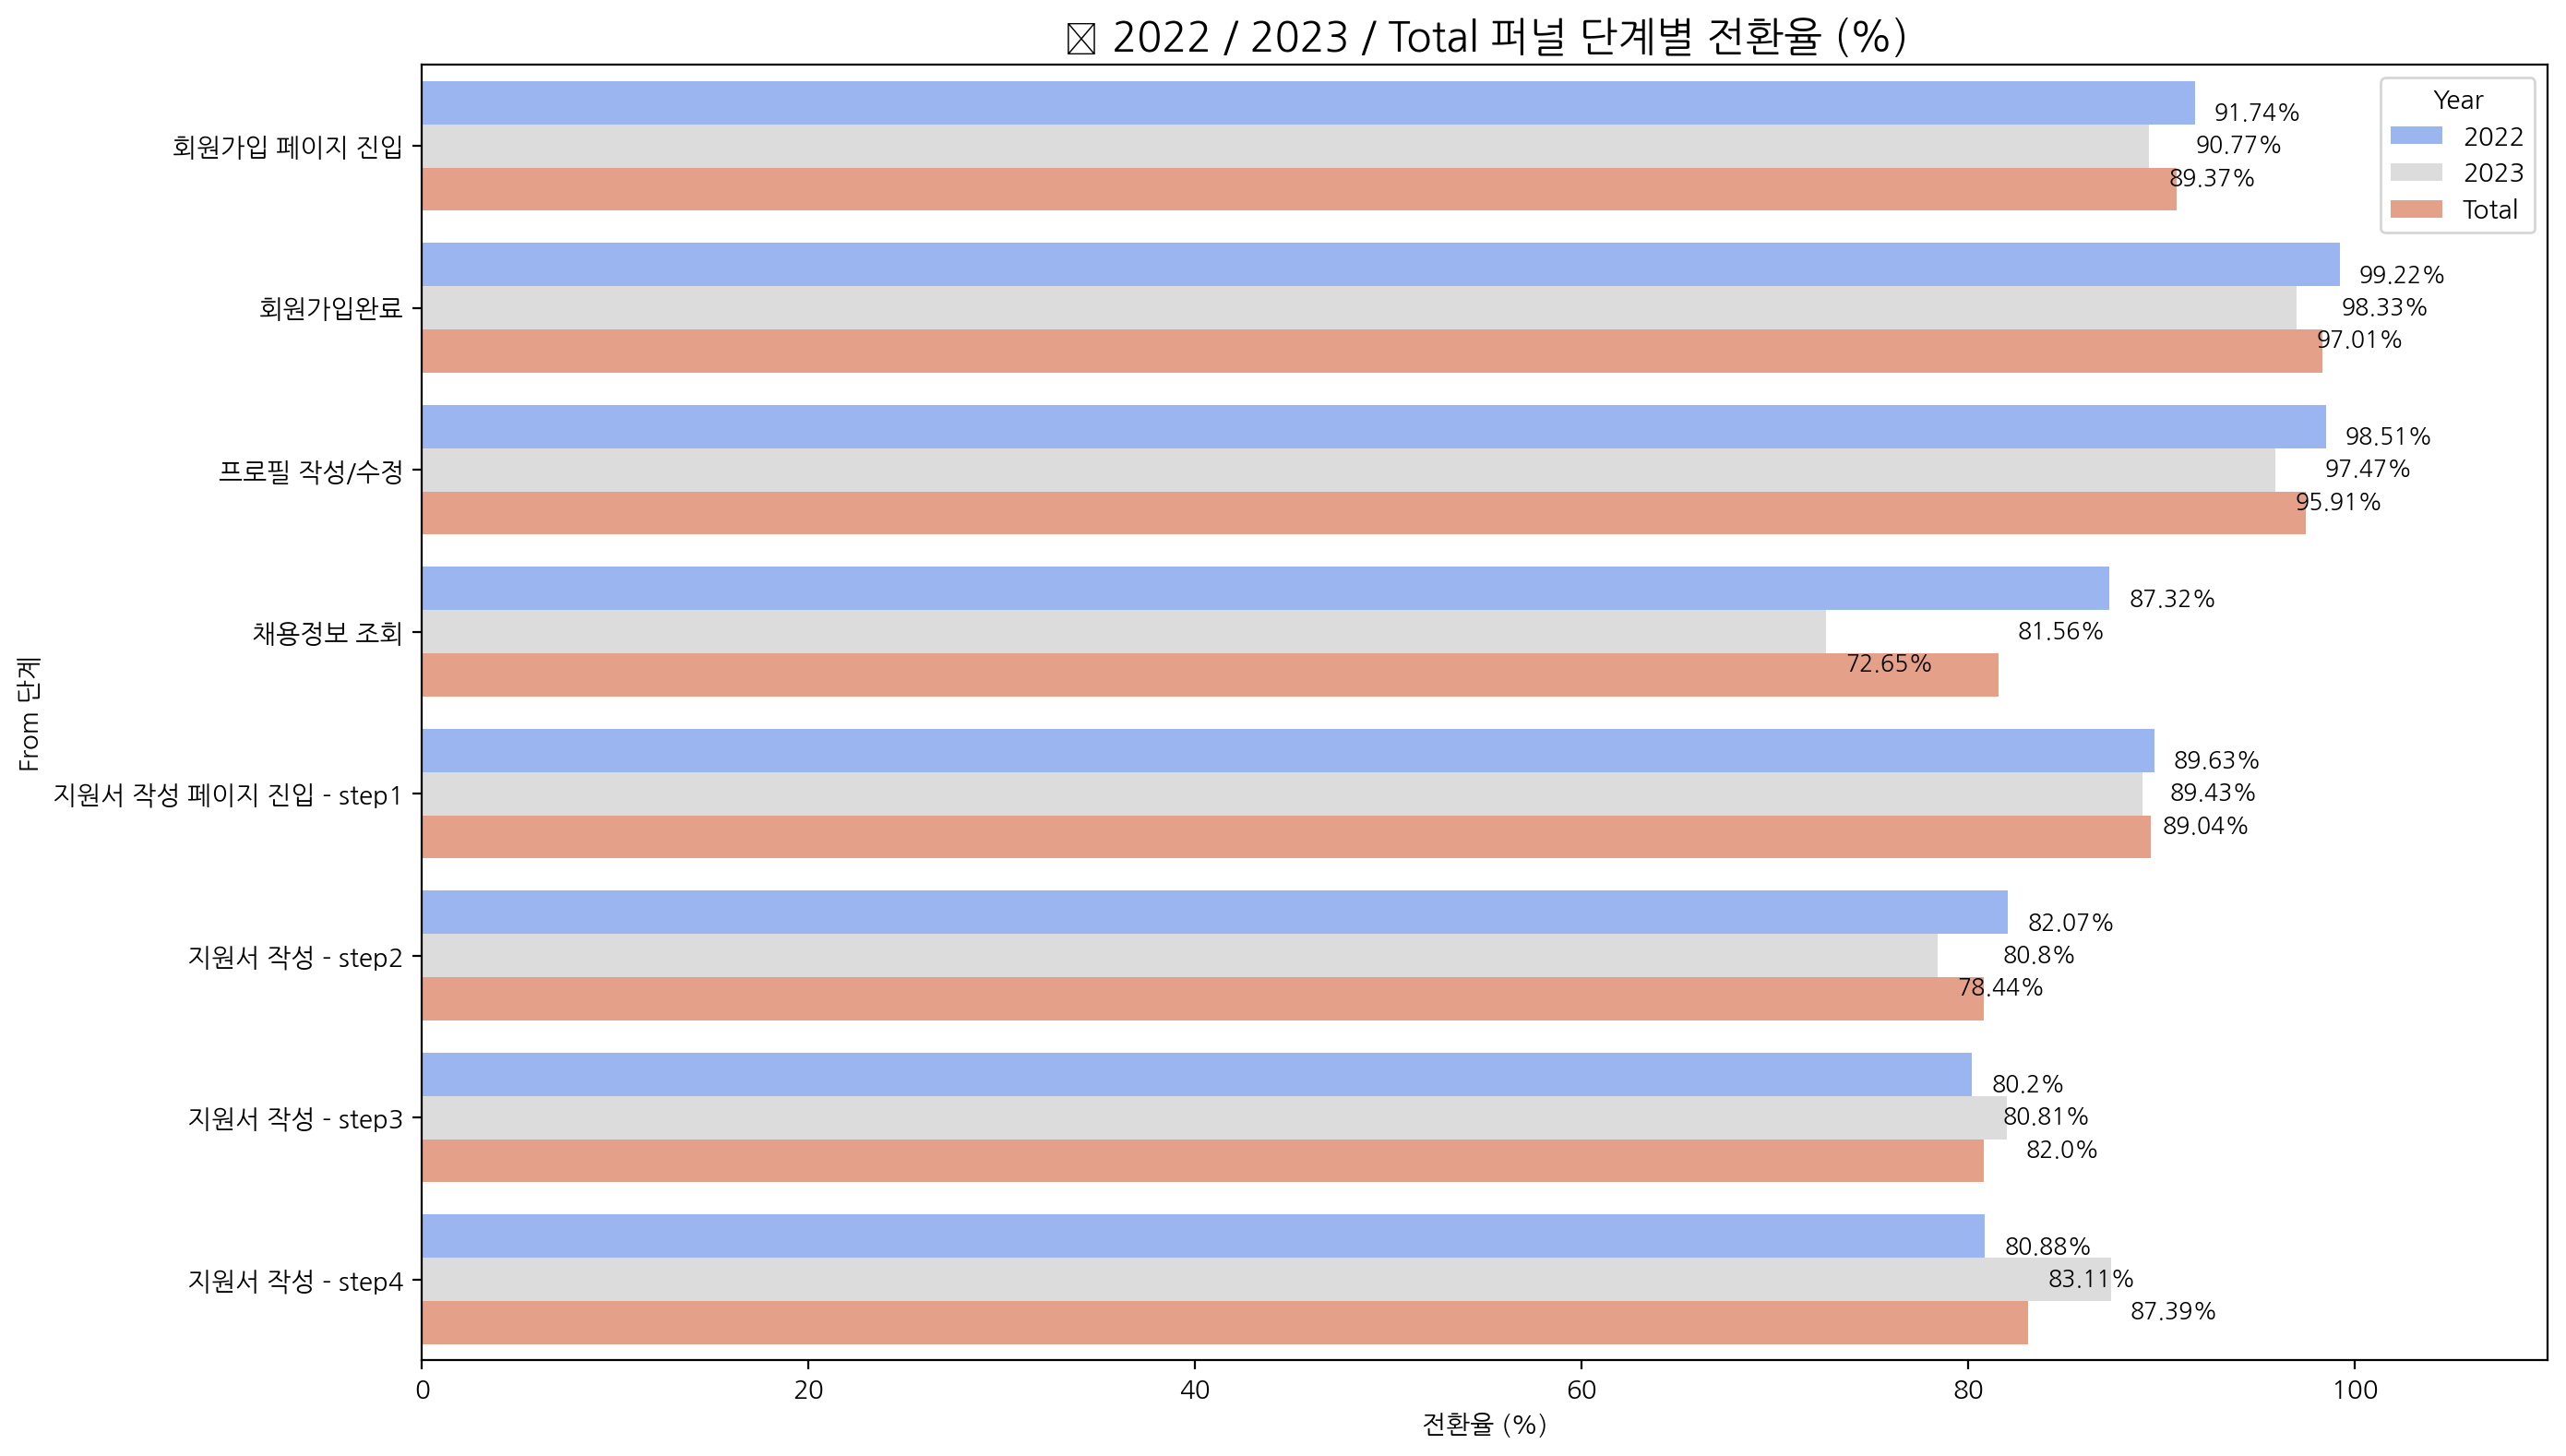

In [ ]:
plt.figure(figsize=(14, 8))

stage_order = [stage[0] if isinstance(stage, list) else stage for stage in ideal_funnel[:-1]]

sns.barplot(
    data=full_conversion_df,
    y="From",
    x="Conversion Rate (%)",
    hue="Year",
    order=stage_order,
    palette='coolwarm'
)

plt.title("📊 2022 / 2023 / Total 퍼널 단계별 전환율 (%)", fontsize=16)
plt.xlabel("전환율 (%)")
plt.ylabel("From 단계")
plt.xlim(0, 110)

year_offsets = {2022: -0.2, 2023: 0.2, "Total": 0.0}
for i, row in full_conversion_df.iterrows():
    y_pos = stage_order.index(row['From'])
    offset = year_offsets.get(row['Year'], 0)
    plt.text(
        row['Conversion Rate (%)'] + 1,
        y_pos + offset,
        f"{row['Conversion Rate (%)']}%",
        va='center',
        fontsize=9
    )

plt.legend(title="Year")
plt.tight_layout()
plt.show()

##### 5.2.1.3.1 분석 목적 및 해석

- 🎯 분석 목적
    - 신규 사용자 전환 흐름 분석
     - 2022년과 2023년 동안 서비스에 유입된 신규 사용자들이 각 퍼널 단계에서 얼마나 이탈 또는 전환했는지를 수치적으로 - 분석합니다.

    - 전환 퍼널 완주율 비교
       - 회원가입 → 프로필 작성 → 채용정보 조회 → 지원서 작성 단계(step1~4) → 제출 완료까지 전환 흐름을 연도별로 비교합니다.

    - 병목 구간 진단 및 개선 방향 도출
      - 전환율이 낮은 퍼널 병목 지점을 파악하여, UX 및 마케팅 전략 개선 방향을 설정합니다.

- 📈 2. 주요 전환율 요약 (단계별 하이라이트)

|전환 구간 | 2022 전환율 | 2023 전환율 | Total | 🔍 해석|
|------|------|------|-----|------|
|회원가입 진입 → 완료 | 91.74% | 89.37% | 90.77% | 안정적인 가입 흐름 유지|
|프로필 작성 → 채용정보 조회 | 98.51% | 95.91% | 97.47% | 높은 관심 유도 성공률|
|채용정보 → 지원서 진입 | 87.33% | 72.64% ❗ | 81.56% | 2023 급격한 하락 → CTA/기대미스매치 가능성|
|Step1 → Step2 | 89.64% | 89.03% | 89.43% | 작성 시작은 비교적 양호|
|Step2 → Step3 | 82.03% | 78.51% | 80.80% | UX 피로감 혹은 정보량 문제 가능|
|Step3 → Step4 | 80.20% | 82.00% | 80.81% | 약간 개선|
|Step4 → 제출 완료 | 80.88% | 87.39% ✅ | 83.11% | 제출 전환율 2023 개선 효과 뚜렷|

- 🛠 전략적 시사점

|구간 | 개선 제안|
|----|-----|
|채용정보 → 지원서 진입 | - CTA 강화 (지원 유도 버튼, 마이크로 카피)- 랜딩 페이지 기대치 조정|
|중간 입력 단계 (Step2~3) | - 피로도 완화: 필수 항목 구분- 작성 저장 기능, 중단 이어쓰기 UX|
|제출 전 단계 | - ‘제출’ 버튼 강조- 검토화면 안내 개선 및 실수 방지 UX 도입|

- 📌 결론 요약
    - 2023년 전체 유입은 감소했지만, 전환 퍼널의 하단부(제출 단계) 성과는 향상됨

    - 상단 퍼널 진입부(지원서 작성 진입 전) 이탈이 주요 개선 포인트

    - 전체적으로 UX와 전환 흐름 전략의 미세조정 필요

### 5.2.2. log 기준 퍼널분석

- Log 건수 기반으로 보는 이유:
    - ✅전체적인 사용자 행동 파악 가능

        - 로그 데이터는 전체 사용자의 활동을 집계할 수 있기 때문에, 전체 유저의 흐름과 트렌드를 넓은 범위에서 파악할 수 있습니다. 이는 개별 사용자의 행동을 추적할 수는 없지만, 큰 틀에서 사용자의 참여 정도나 흐름을 확인하는 데 유용합니다.

             - 예: "특정 단계에서 사용자가 얼마나 많은 로그를 발생시켰는지"를 통해 해당 단계의 인기나 문제점을 간접적으로 추론할 수 있습니다.

    - ✅효율적인 병목 분석

        - 로그 데이터를 기반으로 각 단계에서 사용자 이탈률을 계산할 수 있어, 어떤 단계에서 문제가 발생하고 있는지 또는 어떤 단계에서 사용자가 주로 이탈하는지를 파악할 수 있습니다. 이를 통해 문제의 핵심 지점을 빠르게 발견하고 개선할 수 있습니다.

            - 예: "지원서 작성 단계에서 50% 이상 사용자가 이탈" → 해당 단계의 UX나 안내 사항 등을 점검해 개선할 부분을 식별할 수 있습니다.

#### 5.2.2.1. 연도별 최종 전환 로그

In [ ]:
# 1) 퍼널 단계 정의
ideal_funnel = [
    "프로필 작성/수정",
    "채용정보 조회",
    "지원서 작성 페이지 진입 - step1",
    "지원서 작성 - step2",
    "지원서 작성 - step3",  # 선택적 단계
    "지원서 작성 - step4",
    "지원서 작성 - 제출 완료"
]
optional_stages = [ideal_funnel.index("지원서 작성 - step3")]
max_time_diff = pd.Timedelta(hours=1)

# 2) 액션 타입 통일 함수
def unify_support_write_stage(action):
    if action in ["지원서 작성 - 페이지 진입", "지원서 작성 - step1"]:
        return "지원서 작성 페이지 진입 - step1"
    return action

# 3) 퍼널 단계 부여 함수
def assign_funnel_stage_with_optional(logs, funnel, max_gap, optional_stages):
    logs = logs.copy()
    logs['funnel_stage'] = -1
    last_stage_time = dict()
    funnel_idx_map = {step: idx for idx, step in enumerate(funnel)}

    for i, row in logs.iterrows():
        action = row['action_type_unified']
        if action not in funnel_idx_map:
            continue

        current_stage = funnel_idx_map[action]

        if current_stage == 0:
            logs.at[i, 'funnel_stage'] = 0
            last_stage_time[0] = row['timestamp_log']
            continue

        prev_stage = current_stage - 1
        while prev_stage in optional_stages:
            prev_stage -= 1

        if prev_stage in last_stage_time:
            time_diff = row['timestamp_log'] - last_stage_time[prev_stage]
            if time_diff <= max_gap:
                logs.at[i, 'funnel_stage'] = current_stage
                last_stage_time[current_stage] = row['timestamp_log']

    return logs

# 4) 연도별 분석 함수
def funnel_analysis_by_year(logs, year_label):
    # 전처리
    logs = logs.copy()
    logs['action_type_unified'] = logs['action_type'].apply(unify_support_write_stage)
    logs['timestamp_log'] = pd.to_datetime(logs['timestamp_log'], errors='coerce', utc=True)
    logs = logs.sort_values(['user_uuid', 'timestamp_log']).reset_index(drop=True)

    # 퍼널 단계 부여
    result_logs = []
    for user, group in logs.groupby('user_uuid'):
        processed = assign_funnel_stage_with_optional(group, ideal_funnel, max_time_diff, optional_stages)
        result_logs.append(processed)

    result_df = pd.concat(result_logs).reset_index(drop=True)

    # 최종 단계 도달 수 계산
    final_stage = len(ideal_funnel) - 1
    conversion_logs = result_df[result_df['funnel_stage'] == final_stage]
    conversion_count = len(conversion_logs)
    total_logs = len(result_df)
    conversion_rate = (conversion_count / total_logs * 100) if total_logs else 0

    return {
        "연도": year_label,
        "전체 로그 수": total_logs,
        "전환 로그 수": conversion_count,
        "로그 단위 전환율 (%)": round(conversion_rate, 2)
    }

# 5) 연도별 데이터 분리 및 실행
filtered_logs['timestamp_log'] = pd.to_datetime(filtered_logs['timestamp_log'], errors='coerce', utc=True)

log_2022 = filtered_logs[filtered_logs['timestamp_log'].dt.year == 2022].copy()
log_2023 = filtered_logs[filtered_logs['timestamp_log'].dt.year == 2023].copy()
log_total = filtered_logs.copy()

results = [
    funnel_analysis_by_year(log_2022, "2022"),
    funnel_analysis_by_year(log_2023, "2023"),
    funnel_analysis_by_year(log_total, "Total")
]

# 6) 결과 출력
print("📊 연도별 퍼널 최종 전환 로그 통계:\n")
for res in results:
    print(f"[{res['연도']}]")
    print(f"전체 로그 수: {res['전체 로그 수']}")
    print(f"전환 로그 수 (제출 완료 단계): {res['전환 로그 수']}")
    print(f"로그 단위 전환율: {res['로그 단위 전환율 (%)']:.2f}%\n")

📊 연도별 퍼널 최종 전환 로그 통계:

[2022]
전체 로그 수: 2506768
전환 로그 수 (제출 완료 단계): 7964
로그 단위 전환율: 0.32%

[2023]
전체 로그 수: 2679734
전환 로그 수 (제출 완료 단계): 13465
로그 단위 전환율: 0.50%

[Total]
전체 로그 수: 5186502
전환 로그 수 (제출 완료 단계): 21429
로그 단위 전환율: 0.41%



##### 5.2.2.1.1. 해석 및 목적

- 전환률 자체는 개선중이지만 수치로 보면 모수 대비 최종 전환은 여전히 극소수입니다. 즉, 퍼널 중간 구간(지원서 작성 진입 전)과 초기 CTA 유입 강화가 여전히 중요한 과제이며, 2023년 개선 폭이 0.18% 상승했습니다. 그러나 로그 단위 기준 전환률이 1% 미만인 상황에서 광범위한 이탈은 여전하다는 것을 고려해야합니다.


#### 5.2.2.2. 단계별 이탈률

In [ ]:
# 이탈률 계산 함수
def calculate_stage_log_counts_and_dropoff(result_df, funnel, year_label):
    stage_counts = result_df[result_df['funnel_stage'] >= 0]['funnel_stage'].value_counts().sort_index()
    stage_log_counts = [stage_counts.get(i, 0) for i in range(len(funnel))]

    log_drop_off_rates = []
    for i in range(len(stage_log_counts)):
        if i == 0:
            log_drop_off_rates.append(0.0)
        else:
            prev_logs = stage_log_counts[i - 1]
            curr_logs = stage_log_counts[i]
            drop_rate = (prev_logs - curr_logs) / prev_logs * 100 if prev_logs > 0 else 0.0
            log_drop_off_rates.append(drop_rate)

    # 출력
    print(f"\n📊 [{year_label}] 퍼널 단계별 이탈률 (로그 수 기준)")
    for i, (stage, log_count, drop_rate) in enumerate(zip(funnel, stage_log_counts, log_drop_off_rates)):
        print(f"{i+1}. {stage} - 도달 로그 수: {log_count:,}건, 이전 단계 대비 이탈률: {drop_rate:.2f}%")

# 연도별 분석 함수
def analyze_yearly_logs(log_df, year_label):
    log_df = log_df.copy()
    log_df['action_type_unified'] = log_df['action_type'].apply(unify_support_write_stage)
    log_df['timestamp_log'] = pd.to_datetime(log_df['timestamp_log'], errors='coerce', utc=True)
    log_df = log_df.sort_values(['user_uuid', 'timestamp_log']).reset_index(drop=True)

    result_logs = []
    for user, group in log_df.groupby('user_uuid'):
        processed = assign_funnel_stage_with_optional(group, ideal_funnel, max_time_diff, optional_stages)
        result_logs.append(processed)

    result_df = pd.concat(result_logs).reset_index(drop=True)
    calculate_stage_log_counts_and_dropoff(result_df, ideal_funnel, year_label)

# 연도별 데이터 분리
filtered_logs['timestamp_log'] = pd.to_datetime(filtered_logs['timestamp_log'], errors='coerce', utc=True)
log_2022 = filtered_logs[filtered_logs['timestamp_log'].dt.year == 2022].copy()
log_2023 = filtered_logs[filtered_logs['timestamp_log'].dt.year == 2023].copy()
log_total = filtered_logs.copy()

# 실행
analyze_yearly_logs(log_2022, "2022")
analyze_yearly_logs(log_2023, "2023")
analyze_yearly_logs(log_total, "Total")


📊 [2022] 퍼널 단계별 이탈률 (로그 수 기준)
1. 프로필 작성/수정 - 도달 로그 수: 413,866건, 이전 단계 대비 이탈률: 0.00%
2. 채용정보 조회 - 도달 로그 수: 315,549건, 이전 단계 대비 이탈률: 23.76%
3. 지원서 작성 페이지 진입 - step1 - 도달 로그 수: 32,592건, 이전 단계 대비 이탈률: 89.67%
4. 지원서 작성 - step2 - 도달 로그 수: 30,301건, 이전 단계 대비 이탈률: 7.03%
5. 지원서 작성 - step3 - 도달 로그 수: 20,555건, 이전 단계 대비 이탈률: 32.16%
6. 지원서 작성 - step4 - 도달 로그 수: 10,225건, 이전 단계 대비 이탈률: 50.26%
7. 지원서 작성 - 제출 완료 - 도달 로그 수: 7,964건, 이전 단계 대비 이탈률: 22.11%

📊 [2023] 퍼널 단계별 이탈률 (로그 수 기준)
1. 프로필 작성/수정 - 도달 로그 수: 589,817건, 이전 단계 대비 이탈률: 0.00%
2. 채용정보 조회 - 도달 로그 수: 411,720건, 이전 단계 대비 이탈률: 30.20%
3. 지원서 작성 페이지 진입 - step1 - 도달 로그 수: 56,145건, 이전 단계 대비 이탈률: 86.36%
4. 지원서 작성 - step2 - 도달 로그 수: 45,708건, 이전 단계 대비 이탈률: 18.59%
5. 지원서 작성 - step3 - 도달 로그 수: 25,049건, 이전 단계 대비 이탈률: 45.20%
6. 지원서 작성 - step4 - 도달 로그 수: 16,843건, 이전 단계 대비 이탈률: 32.76%
7. 지원서 작성 - 제출 완료 - 도달 로그 수: 13,465건, 이전 단계 대비 이탈률: 20.06%

📊 [Total] 퍼널 단계별 이탈률 (로그 수 기준)
1. 프로필 작성/수정 - 도달 로그 수: 1,003,683건, 이전 단계 대비 이탈률: 0.00%
2. 채용정보 조회 - 도달 로그 수: 727,269건, 이전

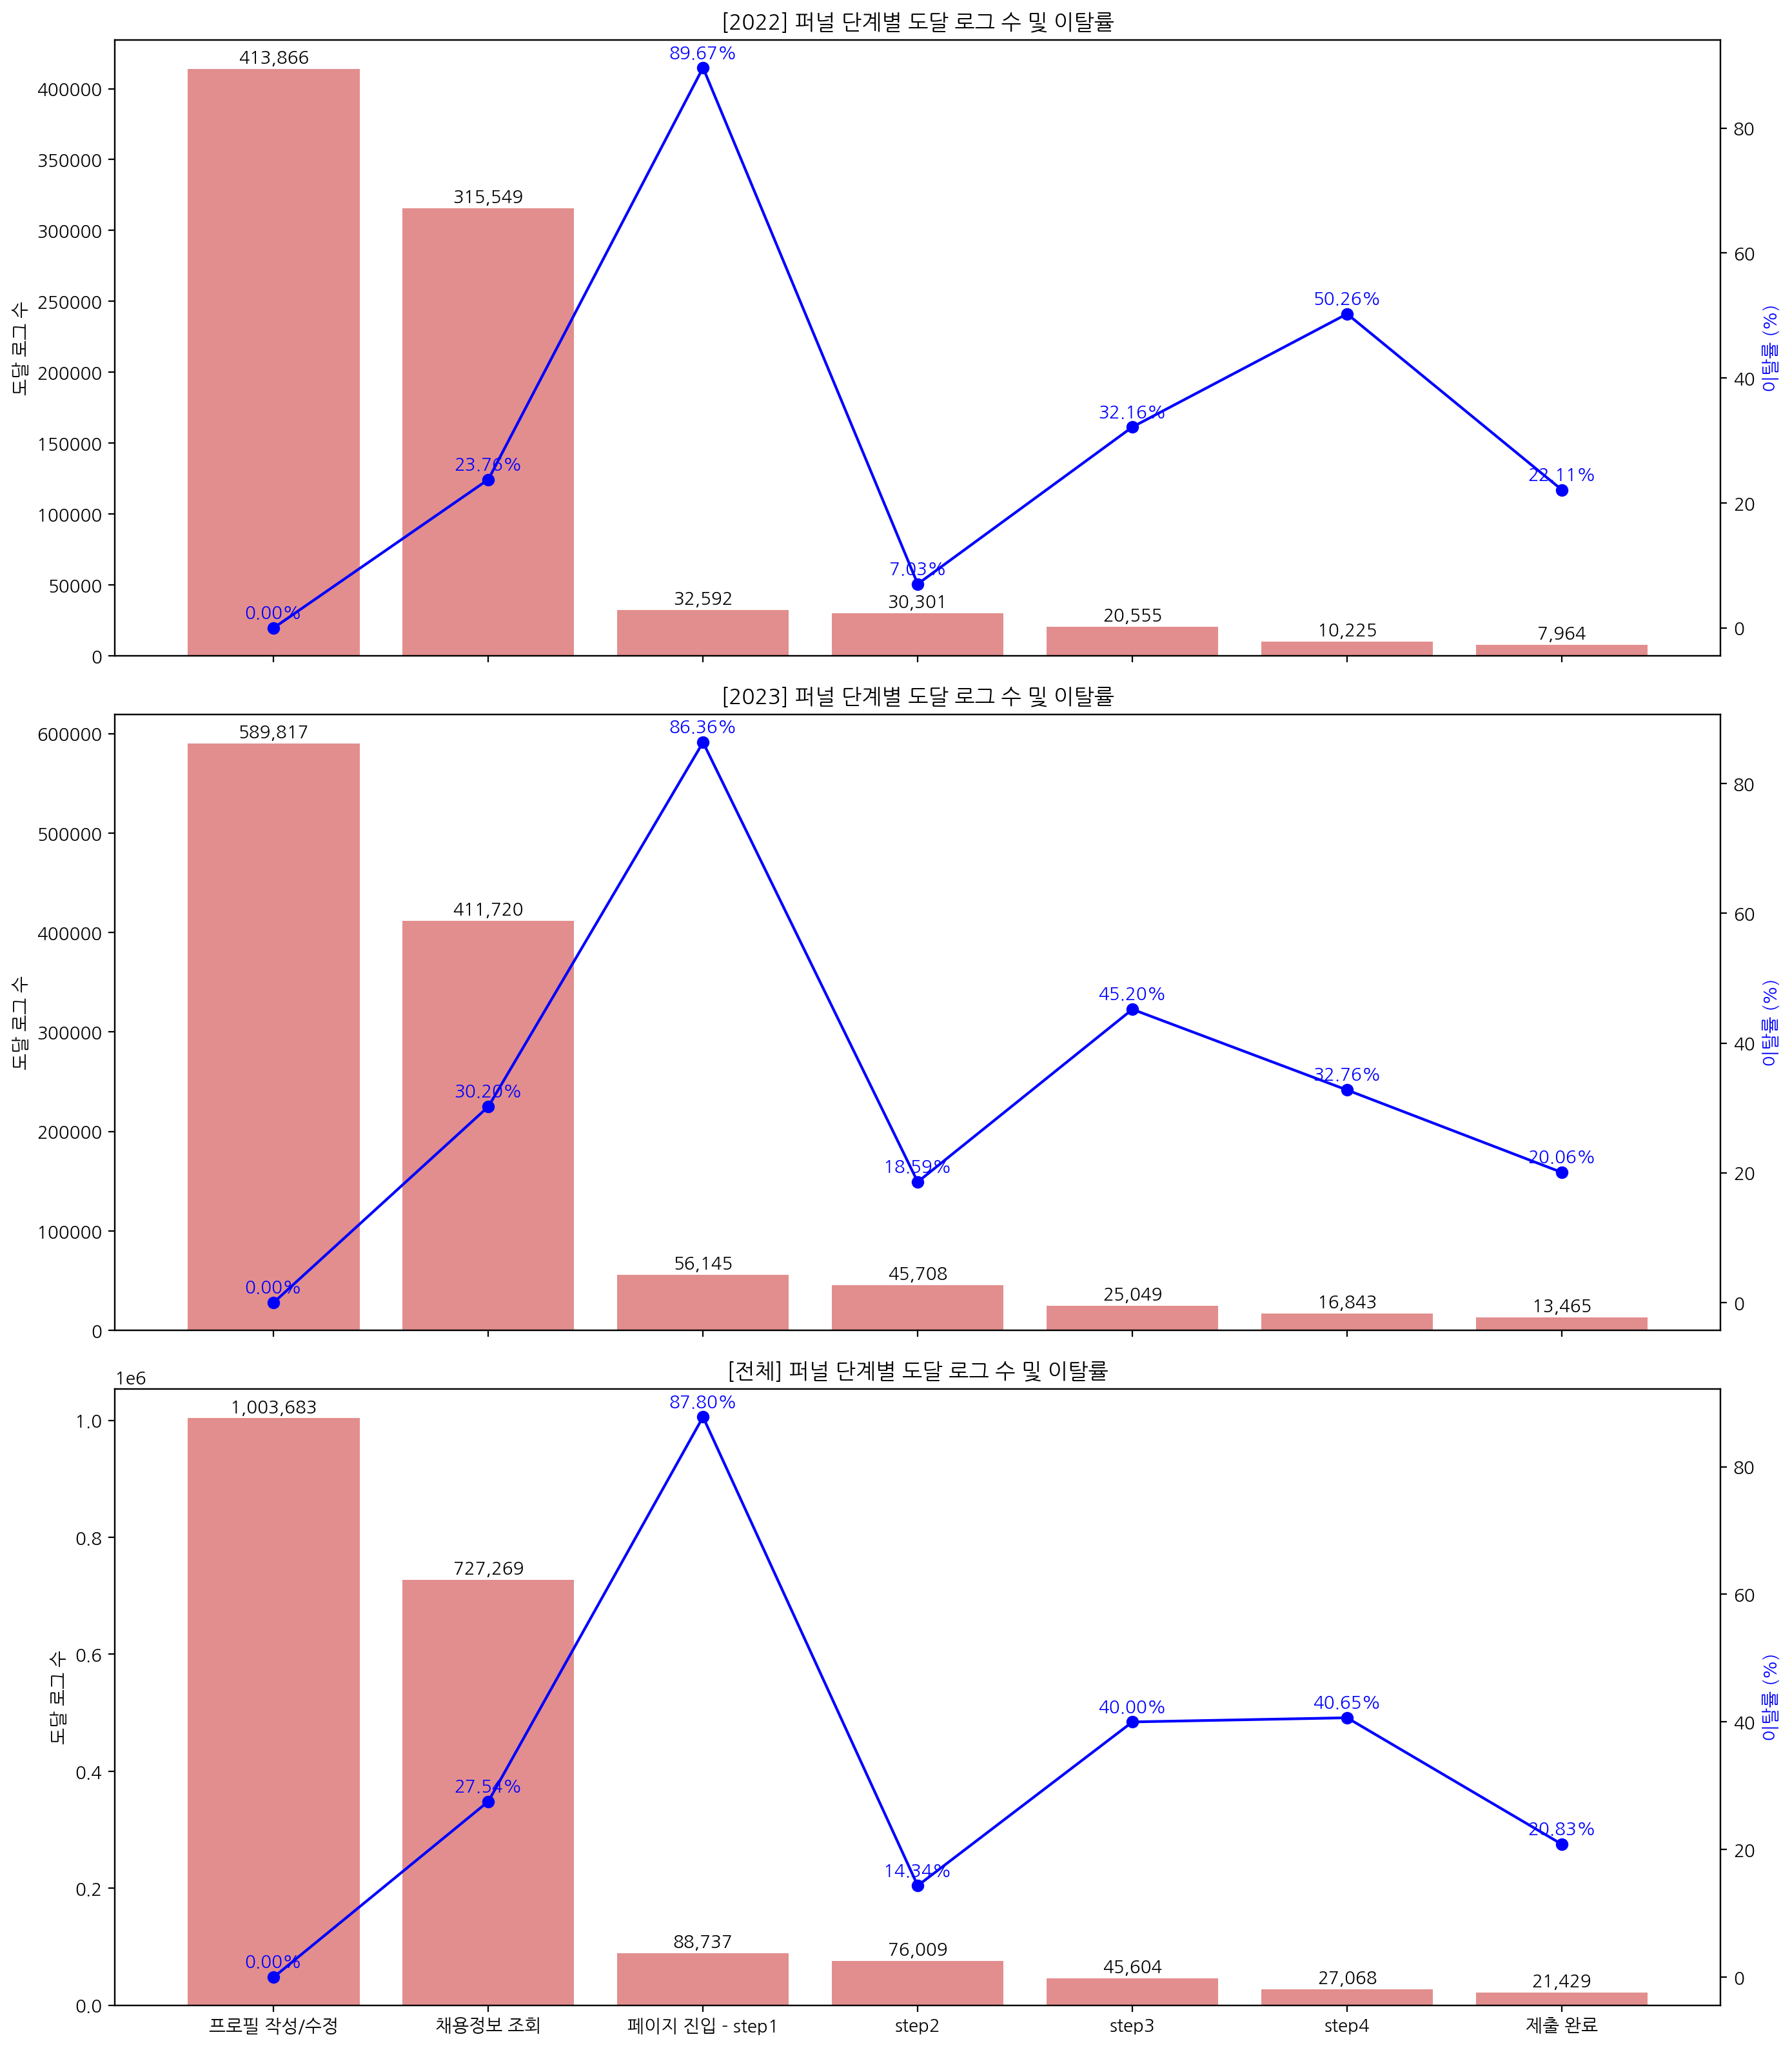

In [ ]:
funnel_stages = ['프로필 작성/수정', '채용정보 조회', '페이지 진입 - step1', 'step2', 'step3', 'step4', '제출 완료']
data_by_year = {
    "2022": {
        "log_counts": [413866, 315549, 32592, 30301, 20555, 10225, 7964],
        "dropoff_rates": [0.00, 23.76, 89.67, 7.03, 32.16, 50.26, 22.11]
    },
    "2023": {
        "log_counts": [589817, 411720, 56145, 45708, 25049, 16843, 13465],
        "dropoff_rates": [0.00, 30.20, 86.36, 18.59, 45.20, 32.76, 20.06]
    },
    "전체": {
        "log_counts": [1003683, 727269, 88737, 76009, 45604, 27068, 21429],
        "dropoff_rates": [0.00, 27.54, 87.80, 14.34, 40.00, 40.65, 20.83]
    }
}

fig, axes = plt.subplots(3, 1, figsize=(14, 16), sharex=True)
for ax, (year, data) in zip(axes, data_by_year.items()):
    sns.barplot(x=funnel_stages, y=data["log_counts"], ax=ax, color='lightcoral')
    ax2 = ax.twinx()
    ax2.plot(funnel_stages, data["dropoff_rates"], color='blue', marker='o', label='이탈률 (%)')

    for i, count in enumerate(data["log_counts"]):
        ax.text(i, count + max(data["log_counts"]) * 0.01, f'{count:,}', ha='center')

    for i, rate in enumerate(data["dropoff_rates"]):
        ax2.text(i, rate + 1.5, f'{rate:.2f}%', ha='center', color='blue')

    ax.set_title(f'[{year}] 퍼널 단계별 도달 로그 수 및 이탈률')
    ax.set_ylabel('도달 로그 수')
    ax2.set_ylabel('이탈률 (%)', color='blue')

plt.xticks(rotation=30)
plt.tight_layout()
plt.show()

##### 5.2.2.2.1. 해석 및 목적

- 📊 퍼널 단계별 이탈률 (연도별 비교)

|퍼널 단계 | 2022 이탈률 | 2023 이탈률 | 총합 (Total) 이탈률 | 🔍 해석|
|---------|----------|-----------|------------|--------|
|프로필 작성/수정 | 0.00% | 0.00% | 0.00% | 시작 단계, 자연스러운 유지|
|채용정보 조회 | 23.76% | 30.20% | 27.54% | 📈 채용정보에 대한 관심은 있지만 이탈 상승, 콘텐츠 매력도 점검 필요|
|지원서 작성 페이지 진입 - STEP1 | 89.67% | 86.36% | 87.80% | 🔺 매우 높은 이탈 → 지원 시작 전 UX/CTA 최적화 필요|
|지원서 작성 - STEP2 | 7.03% | 18.59% | 14.34% | 작성 초입에서 이탈 증가 → 심리적 진입 장벽 가능성|
|지원서 작성 - STEP3 | 32.16% | 45.20% | 40.00% | 작성 중 피로감 및 UX 개선 필요|
|지원서 작성 - STEP4 | 50.26% | 32.76% | 40.65% | ✅ 2023년 마무리 작성 이탈 개선, 그러나 여전히 주의 필요|
|제출 완료 직전 | 22.11% | 20.06% | 20.83% | 제출 직전 단계에서 일부 이탈 → 기술적 오류, 흐름 점검 필요|

- ✅ 1. 분석 목적 요약
    - 👉 사용자 전환 흐름에서 어디서 이탈이 심한지를 수치로 파악하고,
    - 👉 UX 병목 구간을 찾아내 개선 방향을 제시하는 것입니다.
    - 특히, 2023년 흐름 변화와 개선 효과까지 함께 진단해 전략 수립에 활용하고자 합니다.

- 🔍 이탈률 중심 퍼널 해석
    - ✅ 초기 단계는 비교적 안정적인 흐름
        - 프로필 작성 → 채용정보 조회

            - 2022: 23.76% 이탈

            - 2023: 30.20% 이탈

            - 전체: 27.54%
    - 🔎 비교적 자연스러운 이탈 구간입니다. 다만 2023년에 이탈률이 높아진 건, 사용자 관심도나 UI 변화 등에 원인이 있을 수 있습니다.

    - ⚠️ 가장 큰 이탈 구간 — STEP1 진입
        - 채용정보 조회 → 지원서 작성 STEP1

            - 2022: 89.67% 이탈

            - 2023: 86.36% 이탈

            - 전체: 87.80%
            - 🧨 핵심 병목 구간입니다. 대부분의 사용자가 실제 지원서 작성 페이지로 진입하지 않습니다. - 주요 원인 가능성은 다음과 같습니다:

            - CTA(지원 유도 문구) 부족 또는 모호

            - 지원서 작성에 대한 부담감

            - 내용이 적합하지 않거나 긴박감 부족

     - ⚠️ 중간 단계 — STEP2 → STEP3에서 큰 이탈
        - 2022: 32.16%

        - 2023: 45.20%

        - 전체: 40.00%
        - ⛔ 2023년에 이탈률이 급격히 증가한 구간입니다. 주요 원인으로는:

            - 입력 항목 복잡도 증가

            - UX 피로도 (반복 입력, 저장 기능 부족 등)

            - 직관성 부족

        - 🔁 STEP3 → STEP4 — 2023년에 개선
            - 2022: 50.26%

            - 2023: 32.76%

            - 전체: 40.65%
            - 📉 2022년에는 절반 이상이 이탈했지만, 2023년에는 상당히 개선되었습니다. 이는:

                - UX 가이드라인 도입

                - 작성 난이도 완화

                - 안내 메시지 보완 등의 효과로 추정됩니다.

        - ✅ 최종 전환률은 점진적 개선
            - STEP4 → 제출 완료

                - 2022: 22.11% 이탈

                - 2023: 20.06% 이탈

                - 전체: 20.83%
                - 🏁 마지막 단계는 비교적 안정적인 전환 흐름을 보이며, 2023년에는 미세하게 개선되었습니다. - 이는:

                - 제출 버튼 위치나 안내 개선

                - 입력 검증의 간소화 등 덕분일 수 있습니다.

- 📌 3. 시사점 및 개선 방향

|단계 | 주요 인사이트|
|----|------------|
|채용정보 → STEP1 | 🔥 가장 큰 이탈 구간 — CTA 및 진입 동기 유도 필요|
|STEP2 → STEP3 | ⛔ UX 피로도 또는 입력 혼란으로 이탈 증가|
|STEP3 → STEP4 | ✅ 2023년 개선 효과 뚜렷|
|최종 제출 | 👍 안정적이나 추가 미세 개선 가능|

- 💡 요약
    - 지원서 작성 단계 진입(=STEP1)이 가장 큰 병목 부분으로 확인됩니다.

    - 중간 작성 단계(STEP2 → STEP3)는 2023년 기준으로 UX 개선 필요성 급증합니다.

    - 작성 후반부(STEP3 이후)는 2023년 개선 효과가 명확히 드러납니다.

#### 5.2.2.3. 단계별 전환률

In [ ]:
# 전환률 계산 함수
def calculate_stage_conversion_rates(result_df, funnel, year_label):
    # 단계별 도달 로그 수
    stage_counts = result_df[result_df['funnel_stage'] >= 0]['funnel_stage'].value_counts().sort_index()
    stage_log_counts = [stage_counts.get(i, 0) for i in range(len(funnel))]

    # 전환률 계산
    stage_conversion_rates = []
    for i in range(len(stage_log_counts) - 1):
        current_stage_count = stage_log_counts[i]
        next_stage_count = stage_log_counts[i + 1]
        if current_stage_count > 0:
            conversion_rate = next_stage_count / current_stage_count * 100
        else:
            conversion_rate = 0.0
        stage_conversion_rates.append(conversion_rate)
    stage_conversion_rates.append(0.0)  # 마지막 단계는 없음

    # 결과 문자열 출력
    lines = [f"\n📊 [{year_label}] 퍼널 단계별 전환률 (로그 수 기준)"]
    for i, (stage, log_count, conv_rate) in enumerate(zip(funnel, stage_log_counts, stage_conversion_rates)):
        lines.append(f"{i+1}. {stage} - 도달 로그 수: {log_count:,}건, 다음 단계 전환률: {conv_rate:.2f}%")

    print("\n".join(lines))

# 연도별 분석 함수
def analyze_conversion_by_year(log_df, year_label):
    log_df = log_df.copy()
    log_df['action_type_unified'] = log_df['action_type'].apply(unify_support_write_stage)
    log_df['timestamp_log'] = pd.to_datetime(log_df['timestamp_log'], errors='coerce', utc=True)
    log_df = log_df.sort_values(['user_uuid', 'timestamp_log']).reset_index(drop=True)

    result_logs = []
    for user, group in log_df.groupby('user_uuid'):
        processed = assign_funnel_stage_with_optional(group, ideal_funnel, max_time_diff, optional_stages)
        result_logs.append(processed)

    result_df = pd.concat(result_logs).reset_index(drop=True)
    calculate_stage_conversion_rates(result_df, ideal_funnel, year_label)

# 연도별 로그 데이터 분리
filtered_logs['timestamp_log'] = pd.to_datetime(filtered_logs['timestamp_log'], errors='coerce', utc=True)
log_2022 = filtered_logs[filtered_logs['timestamp_log'].dt.year == 2022].copy()
log_2023 = filtered_logs[filtered_logs['timestamp_log'].dt.year == 2023].copy()
log_total = filtered_logs.copy()

# 실행
analyze_conversion_by_year(log_2022, "2022")
analyze_conversion_by_year(log_2023, "2023")
analyze_conversion_by_year(log_total, "Total")


📊 [2022] 퍼널 단계별 전환률 (로그 수 기준)
1. 프로필 작성/수정 - 도달 로그 수: 413,866건, 다음 단계 전환률: 76.24%
2. 채용정보 조회 - 도달 로그 수: 315,549건, 다음 단계 전환률: 10.33%
3. 지원서 작성 페이지 진입 - step1 - 도달 로그 수: 32,592건, 다음 단계 전환률: 92.97%
4. 지원서 작성 - step2 - 도달 로그 수: 30,301건, 다음 단계 전환률: 67.84%
5. 지원서 작성 - step3 - 도달 로그 수: 20,555건, 다음 단계 전환률: 49.74%
6. 지원서 작성 - step4 - 도달 로그 수: 10,225건, 다음 단계 전환률: 77.89%
7. 지원서 작성 - 제출 완료 - 도달 로그 수: 7,964건, 다음 단계 전환률: 0.00%

📊 [2023] 퍼널 단계별 전환률 (로그 수 기준)
1. 프로필 작성/수정 - 도달 로그 수: 589,817건, 다음 단계 전환률: 69.80%
2. 채용정보 조회 - 도달 로그 수: 411,720건, 다음 단계 전환률: 13.64%
3. 지원서 작성 페이지 진입 - step1 - 도달 로그 수: 56,145건, 다음 단계 전환률: 81.41%
4. 지원서 작성 - step2 - 도달 로그 수: 45,708건, 다음 단계 전환률: 54.80%
5. 지원서 작성 - step3 - 도달 로그 수: 25,049건, 다음 단계 전환률: 67.24%
6. 지원서 작성 - step4 - 도달 로그 수: 16,843건, 다음 단계 전환률: 79.94%
7. 지원서 작성 - 제출 완료 - 도달 로그 수: 13,465건, 다음 단계 전환률: 0.00%

📊 [Total] 퍼널 단계별 전환률 (로그 수 기준)
1. 프로필 작성/수정 - 도달 로그 수: 1,003,683건, 다음 단계 전환률: 72.46%
2. 채용정보 조회 - 도달 로그 수: 727,269건, 다음 단계 전환률: 12.20%
3. 지원서 작성 페이지 진입 - step1 - 

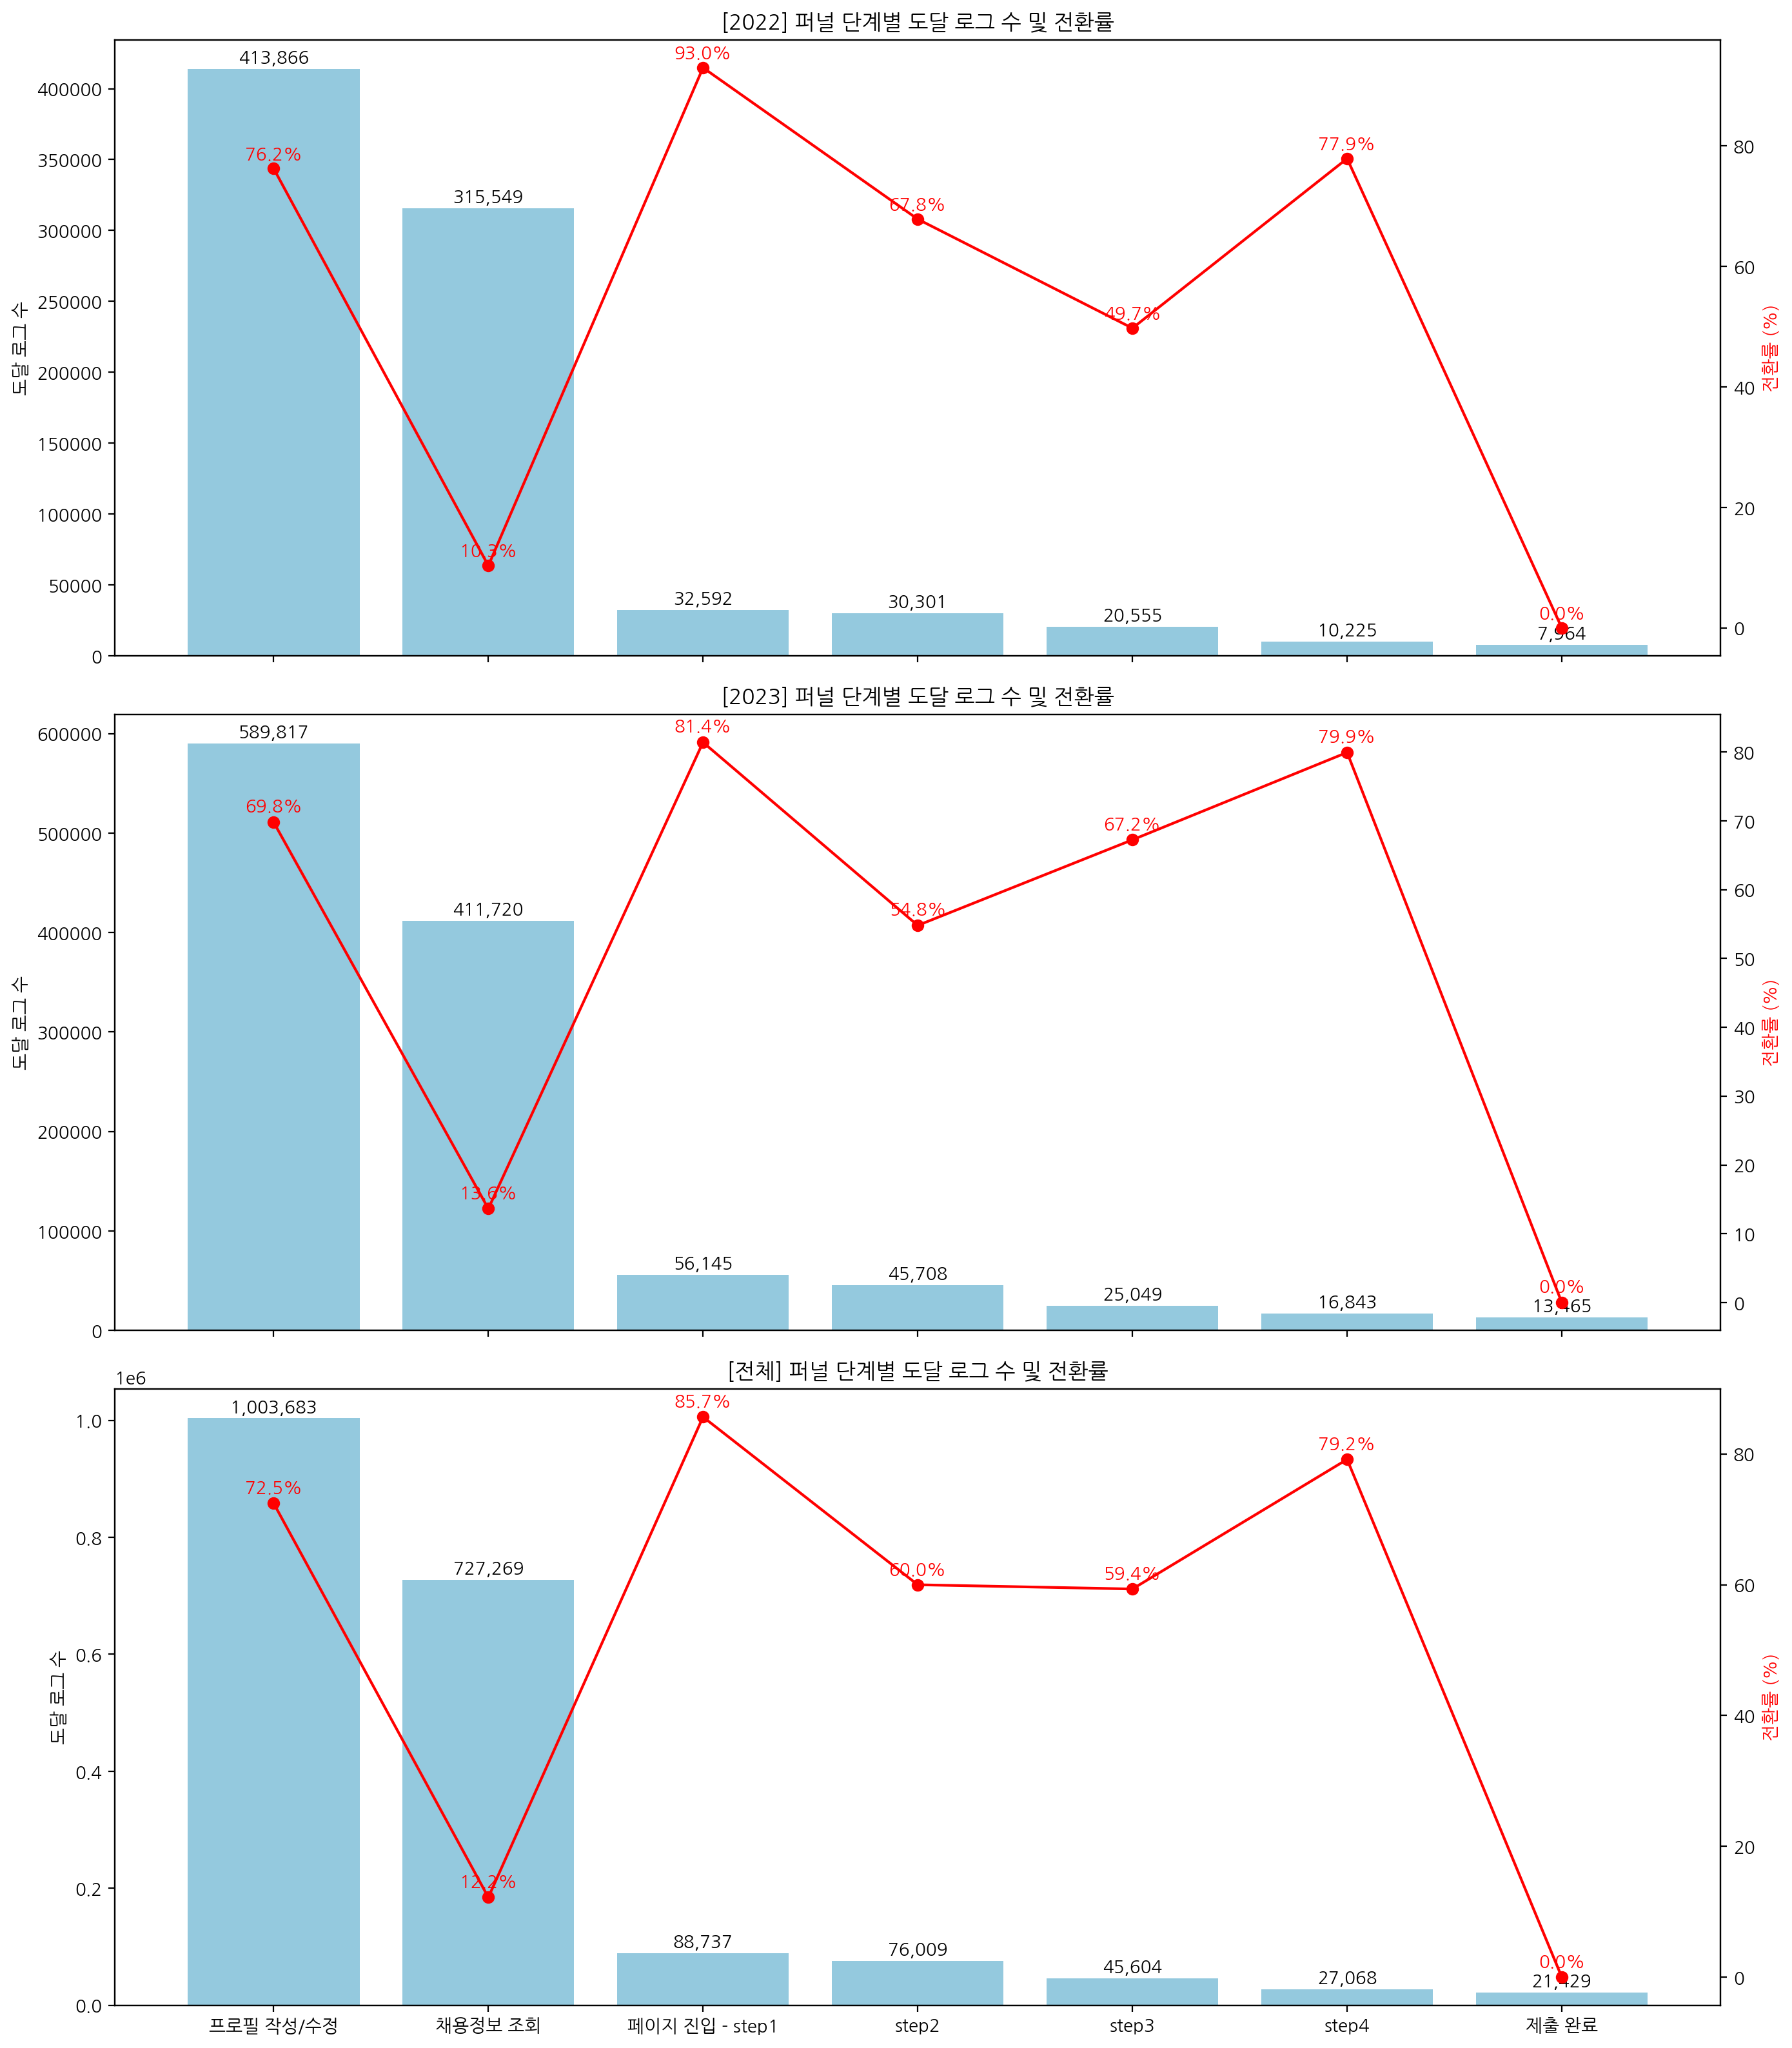

In [ ]:
funnel_stages = ['프로필 작성/수정', '채용정보 조회', '페이지 진입 - step1', 'step2', 'step3', 'step4', '제출 완료']
data_by_year = {
    "2022": {
        "log_counts": [413866, 315549, 32592, 30301, 20555, 10225, 7964],
        "conversion_rates": [76.24, 10.33, 92.97, 67.84, 49.74, 77.89, 0]
    },
    "2023": {
        "log_counts": [589817, 411720, 56145, 45708, 25049, 16843, 13465],
        "conversion_rates": [69.80, 13.64, 81.41, 54.80, 67.24, 79.94, 0]
    },
    "전체": {
        "log_counts": [1003683, 727269, 88737, 76009, 45604, 27068, 21429],
        "conversion_rates": [72.46, 12.20, 85.66, 60.00, 59.35, 79.17, 0]
    }
}

fig, axes = plt.subplots(3, 1, figsize=(14, 16), sharex=True)
for ax, (year, data) in zip(axes, data_by_year.items()):
    sns.barplot(x=funnel_stages, y=data["log_counts"], ax=ax, color='skyblue')
    ax2 = ax.twinx()
    ax2.plot(funnel_stages, data["conversion_rates"], color='red', marker='o', label='전환률 (%)')

    for i, count in enumerate(data["log_counts"]):
        ax.text(i, count + max(data["log_counts"])*0.01, f'{count:,}', ha='center')

    for i, rate in enumerate(data["conversion_rates"]):
        ax2.text(i, rate + 1.5, f'{rate:.1f}%', ha='center', color='red')

    ax.set_title(f'[{year}] 퍼널 단계별 도달 로그 수 및 전환률')
    ax.set_ylabel('도달 로그 수')
    ax2.set_ylabel('전환률 (%)', color='red')

plt.xticks(rotation=30)
plt.tight_layout()
plt.show()

##### 5.2.2.3.1. 해석 및 목적

- 🎯 분석 목적
    - 로그 수 기준 퍼널 분석은 실제로 사용자가 각 단계에 몇 번 도달했는지를 기반으로 행동 흐름을 파악하는 방법입니다.

    - 한 명의 유저가 여러 번 지원서를 작성할 수 있기 때문에, user_id 기반 분석보다 상세한 사용자 행동 패턴을 드러낼 수 있습니다.

    - 이 분석을 통해 어느 단계에서 사용자 활동이 줄어드는지, 즉 UX 병목 구간을 추적합니다.

- 🔍 해석 요약
    - ✅ 공통 패턴
        - **초기 단계(프로필 작성/수정)**에서는 전체 사용자의 대부분이 몰리는 구간 → 진입 허들은 낮음

        - 채용정보 조회 → 지원서 작성 페이지 진입: 이탈률이 가장 큰 병목 구간

            - 2022: 전환률 10.33%

            - 2023: 전환률 13.64%

             - → 사용자가 "지원하기" 버튼을 누르기 전에 망설이는 비율이 매우 높음

    - ✅ 중간 단계 전환 분석
        - step2step4 사이에서도 **약 4050% 수준의 이탈**이 지속 발생

        - 이는 사용자 피로, UI 복잡성, 혹은 정보 요구량 증가에 의한 이탈 가능성

    - ✅ 제출 직전
        - step4 → 제출 완료 전환률은 79.17%
        - → 마지막 제출 전 단계에서 약 20%는 이탈
        - → 제출 부담감, 검토 부족, 기술 오류 등이 원인일 수 있음

- 💡 인사이트 요약

|단계 | 주요 병목 포인트 | 시사점|
|------|--------------|------|
|채용정보 조회 → 페이지 진입 | 전환률 약 12% | CTA(Call to Action) 강화 필요|
|step3 → step4 | 전환률 약 59% | 복잡성 완화, UX 최적화 필요|
|step4 → 제출 완료 | 전환률 약 79% | 제출 전 안내 및 심리적 부담 해소 필요|

## 5.3. 고객 세분화 클러스터링

- 신규 회원 지원자별 활동 패턴을 분류하기 위해 클러스터 분석을 수행하였습니다.
    - 로그 데이터 탐색을 통해 채용 플랫폼 내 주요 사용자 활동은 ▲회원가입, ▲프로필 작성 및 수정, ▲채용공고 조회, ▲지원서 작성 등으로 구성되며, 사용자별로 이들 행동의 빈도와 순서, 조합에서 뚜렷한 차이가 나타났습니다. 이는 사용자마다 채용 플랫폼을 활용하는 방식이 상이하다는 점을 시사하며, 정형화된 사용자 여정을 벗어난 다양한 행동 흐름이 존재함을 보여줍니다.

    - 이에 따라, 유사한 활동 특성을 공유하는 사용자군을 자동으로 분류하기 위해 비지도 학습 기반의 클러스터링 기법을 적용하였습니다. 이 분석은 사용자의 행동 데이터를 정량화하고, 이들을 다차원 공간상에 투영하여 자연스럽게 군집화함으로써, 숨겨진 행동 유형을 식별하고 행동 기반의 사용자 인사이트를 도출하는 데 목적이 있습니다.

    - 분석 결과, 전체 사용자는 네 개의 주요 그룹으로 나뉘었으며, 각 클러스터는 플랫폼에 대한 몰입도, 행동의 다양성, 전환 행동 여부 등의 기준에 따라 뚜렷한 특성을 나타냅니다. 이를 통해 단순히 '활성/비활성 사용자'를 구분하는 수준이 아닌 `관망유저`, `준비유저`, `핵심 지원 유저`, `이상치` 등 실질적인 전환 흐름 기반의 고객 정의가 가능해졌습니다.
    
    - 본 클러스터링 분석은 이후 단계에서 사용자 맞춤형 UI/UX 개선, 개입 전략 수립, 알림 메시지 설계 등 전략적 의사결정의 핵심 기초자료로 활용될 수 있으며, 궁극적으로는 플랫폼 내 사용자 전환율을 높이고 지속적인 활성화를 유도하는 데 기여할 것으로 기대됩니다.

In [ ]:
# 사용자별 행동 수치화
def extract_user_features(logs):
    features = {
        'user_uuid': logs['user_uuid'].iloc[0],
        'total_actions': len(logs),
        'unique_days': logs['timestamp_log'].dt.date.nunique(),
        'avg_actions_per_day': len(logs) / logs['timestamp_log'].dt.date.nunique(),
        'action_type_count': logs['action_type'].nunique(),
        'active_hours': logs['timestamp_log'].dt.hour.nunique(),
        'night_actions': ((logs['timestamp_log'].dt.hour >= 22) | (logs['timestamp_log'].dt.hour < 6)).sum(),
        'days_since_last_activity': (logs['timestamp_log'].max().date() - logs['timestamp_log'].dt.date.max()).days,
        'submitted_application': int('지원서 작성 - 제출 완료' in logs['action_type'].values)
    }

    action_counts = logs['action_type'].value_counts().to_dict()
    for action_type, count in action_counts.items():
        features[f'count_{action_type}'] = count

    return pd.DataFrame([features])

### 5.3.1. 사용자 행동 패턴 분류 기준

- 사용자별 행동 특성을 보다 정밀하게 분석하기 위해 다음과 같은 지표들을 정의하고 활용하였습니다. 각 지표는 사용자의 플랫폼 내 활동 정도, 행동 다양성, 시간적 패턴 등을 다각도로 파악하는 데 목적이 있습니다.

- `user_uuid`: 각 사용자를 고유하게 식별할 수 있는 ID로, 사용자 단위로 행동 데이터를 집계하고 분류하는 기준이 됩니다.

- `total_actions`: 사용자가 일정 기간 동안 수행한 전체 행동의 횟수를 나타내며, 활동량의 절대적인 크기를 파악하는 데 활용됩니다.

- `unique_days`: 사용자가 실제로 플랫폼에 접속한 일수로, 단발성 이용인지 반복적인 이용인지를 판단할 수 있는 지표입니다.

- `avg_actions_per_day`: 사용자의 하루 평균 행동 횟수를 의미하며, total_actions / unique_days로 계산됩니다. 단순히 많이 접속했는지보다 접속 시 얼마나 활발히 활동했는지를 반영합니다.

- `action_type_count`: 사용자가 수행한 고유 행동 유형의 개수를 나타내며, 예를 들어 ‘로그인’, ‘채용공고 조회’, ‘지원서 작성’ 등 서로 다른 행동이 3종이라면 3으로 계산됩니다. 행동의 다양성과 이용 목적의 폭을 가늠할 수 있는 지표입니다.

- `action_hours`: 사용자가 활동한 시간을 시각 단위(예: 오전 9시, 오후 3시 등)로 추출하여, 행동의 시간대별 분포를 확인합니다. 이를 통해 이용자의 생활 리듬이나 플랫폼 접근 시점을 분석할 수 있습니다.

- `night_actions`: 야간(22시~익일 6시)에 발생한 행동 횟수로, 일반적인 업무시간 외의 활동 여부를 판단할 수 있습니다. 비정규 시간대 활동이 많은 사용자군을 식별하는 데 유용합니다.

- `days_since_last_activity`: 사용자가 마지막으로 활동한 이후로 경과된 일수로, 이탈 가능성을 가늠하거나 재활성화 대상 사용자를 식별하는 데 활용됩니다.

- `submitted_application`: ‘지원서 작성 - 제출 완료’라는 로그의 유무를 바탕으로 지원서를 실제로 제출한 사용자인지를 구분합니다. 이진 변수(0 또는 1)로 처리되며, 최종 전환 여부를 나타내는 핵심 지표로 활용됩니다.



In [ ]:
# 사용자별 특성 추출
user_features = log_df.groupby('user_uuid').apply(extract_user_features).reset_index(drop=True)

# 1. 결측값 처리
user_features = user_features.fillna(0)

# 2. 숫자형 컬럼만 선택
numeric_columns = user_features.select_dtypes(include=['number']).columns
X = user_features[numeric_columns]

# 3. 스케일링
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 4. 클러스터링
kmeans = KMeans(n_clusters=4, random_state=42)
user_features['cluster'] = kmeans.fit_predict(X_scaled)

# 5. 클러스터별 평균 확인 (numeric columns만으로 집계)
cluster_profile = user_features.groupby('cluster')[numeric_columns].mean()

In [ ]:
# 결과 출력
cluster_profile

total_actions  unique_days  avg_actions_per_day  action_type_count  \
cluster                                                                       
0           473.031880    12.072869            56.195287          18.851659   
1          1707.050691    43.922976            46.604706          21.903226   
2          7739.780000   112.666667            94.051637          22.520000   
3         24349.333333   480.000000            52.195202          22.000000   

         active_hours  night_actions  days_since_last_activity  \
cluster                                                          
0           10.120690     101.088484                       0.0   
1           17.936801     385.738644                       0.0   
2           20.600000    1944.093333                       0.0   
3           23.000000    1601.000000                       0.0   

         submitted_application  count_채용정보 조회      count_기타  ...  \
cluster                                                      ...   
0                     0.940794     116.793754     54.195185  ...   
1                     0.996050     485.466754    264.954575  ...   
2                     0.993333    1746.640000    837.413333  ...   
3                     0.333333    4811.000000  12777.666667  ...   

         count_가이드 흐름  count_알림 확인  count_본인인증  count_회원가입완료  \
cluster                                                        
0            8.233247     3.830839    2.307417      1.114183   
1           38.757077    19.646478    2.857801      1.107307   
2           86.546667    55.040000    2.966667      1.413333   
3          348.666667   521.000000    3.666667      6.666667   

         count_기업 구성원 프로필 조회  count_소셜 기능   count_설정  count_채용공고 북마크  \
cluster                                                                
0                   2.274561     1.634353   1.880612        1.843526   
1                  11.564845    11.816327   4.585253       11.630678   
2                  51.266667    36.506667   6.613333       43.120000   
3                 248.000000    14.333333  41.000000       76.000000   

         count_채용 기업 북마크  count_빈 URL  
cluster                                
0               0.196487     0.016265  
1               1.400263     0.042791  
2               9.826667     0.153333  
3               2.333333     2.000000  

[4 rows x 33 columns]

In [ ]:
# DataFrame 생성
cluster_df = pd.DataFrame(cluster_profile)

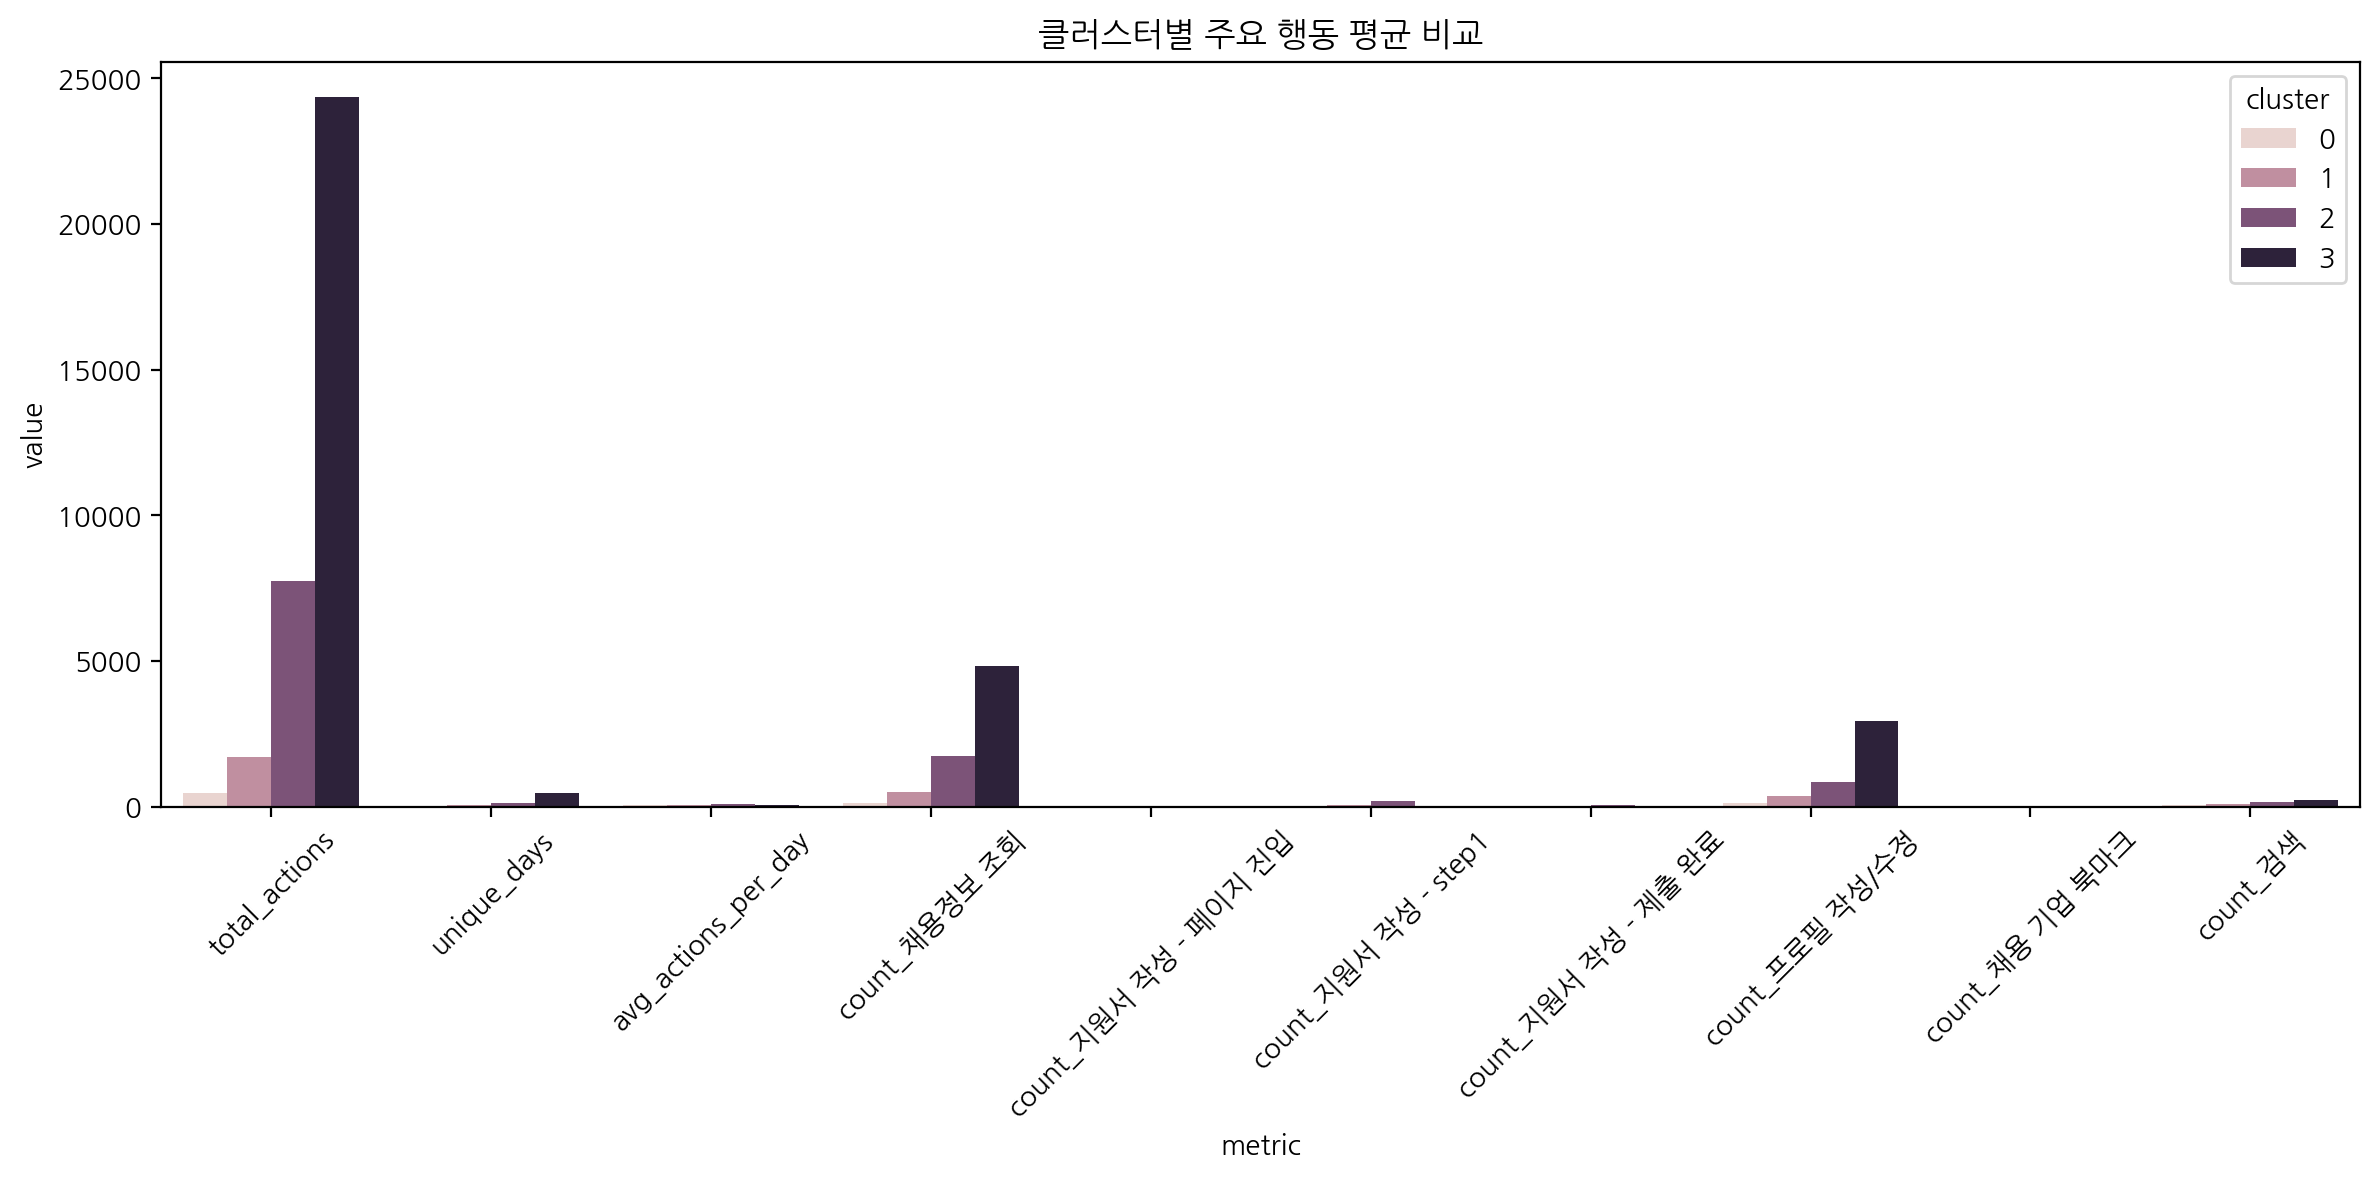

In [ ]:
# 원하는 컬럼만 추출해서 평균값 계산
key_cols = [
    'cluster', 'total_actions', 'unique_days', 'avg_actions_per_day',
    'count_채용정보 조회', 'count_지원서 작성 - 페이지 진입', 'count_지원서 작성 - step1',
    'count_지원서 작성 - 제출 완료', 'count_프로필 작성/수정',
    'count_채용 기업 북마크', 'count_검색'
]

df_summary = cluster_df[key_cols].groupby('cluster').mean().reset_index()

# ------------------------------
# 클러스터별 평균 행동 시각화
# ------------------------------
plt.figure(figsize=(12, 6))
df_melted = df_summary.melt(id_vars='cluster', var_name='metric', value_name='value')
sns.barplot(data=df_melted, x='metric', y='value', hue='cluster')
plt.xticks(rotation=45)
plt.title('클러스터별 주요 행동 평균 비교')
plt.tight_layout()
plt.show()

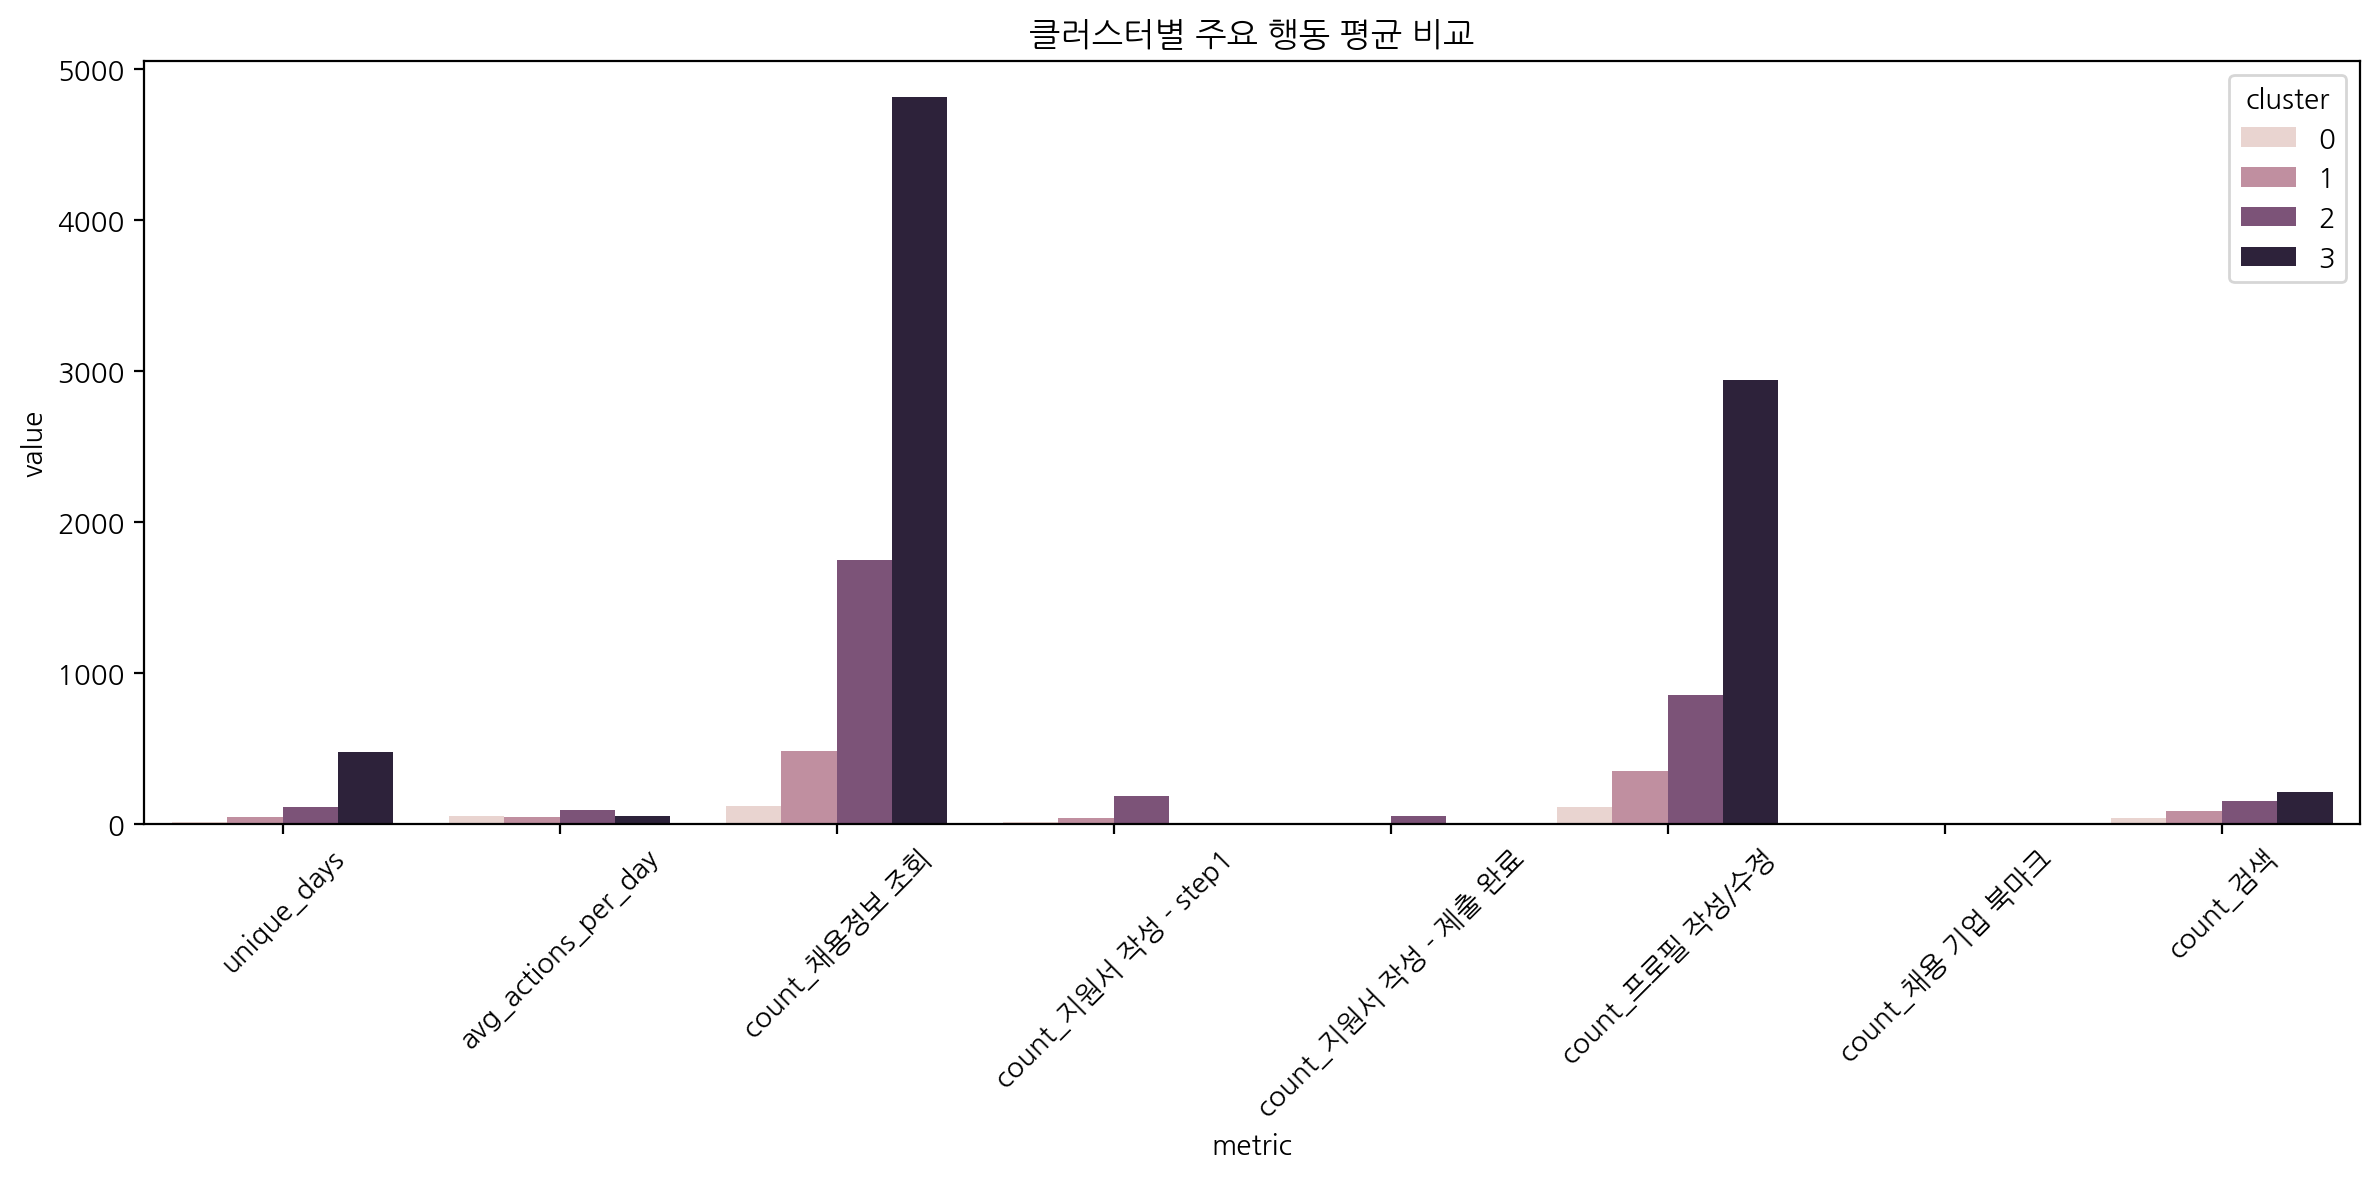

In [ ]:
# 원하는 컬럼만 추출해서 평균값 계산
key_cols = [
    'cluster', 'unique_days', 'avg_actions_per_day',
    'count_채용정보 조회', 'count_지원서 작성 - step1',
    'count_지원서 작성 - 제출 완료', 'count_프로필 작성/수정',
    'count_채용 기업 북마크', 'count_검색'
]

df_summary = cluster_df[key_cols].groupby('cluster').mean().reset_index()

# ------------------------------
# 클러스터별 평균 행동 시각화 (total_action 제외)
# ------------------------------
plt.figure(figsize=(12, 6))
df_melted = df_summary.melt(id_vars='cluster', var_name='metric', value_name='value')
sns.barplot(data=df_melted, x='metric', y='value', hue='cluster')
plt.xticks(rotation=45)
plt.title('클러스터별 주요 행동 평균 비교')
plt.tight_layout()
plt.show()

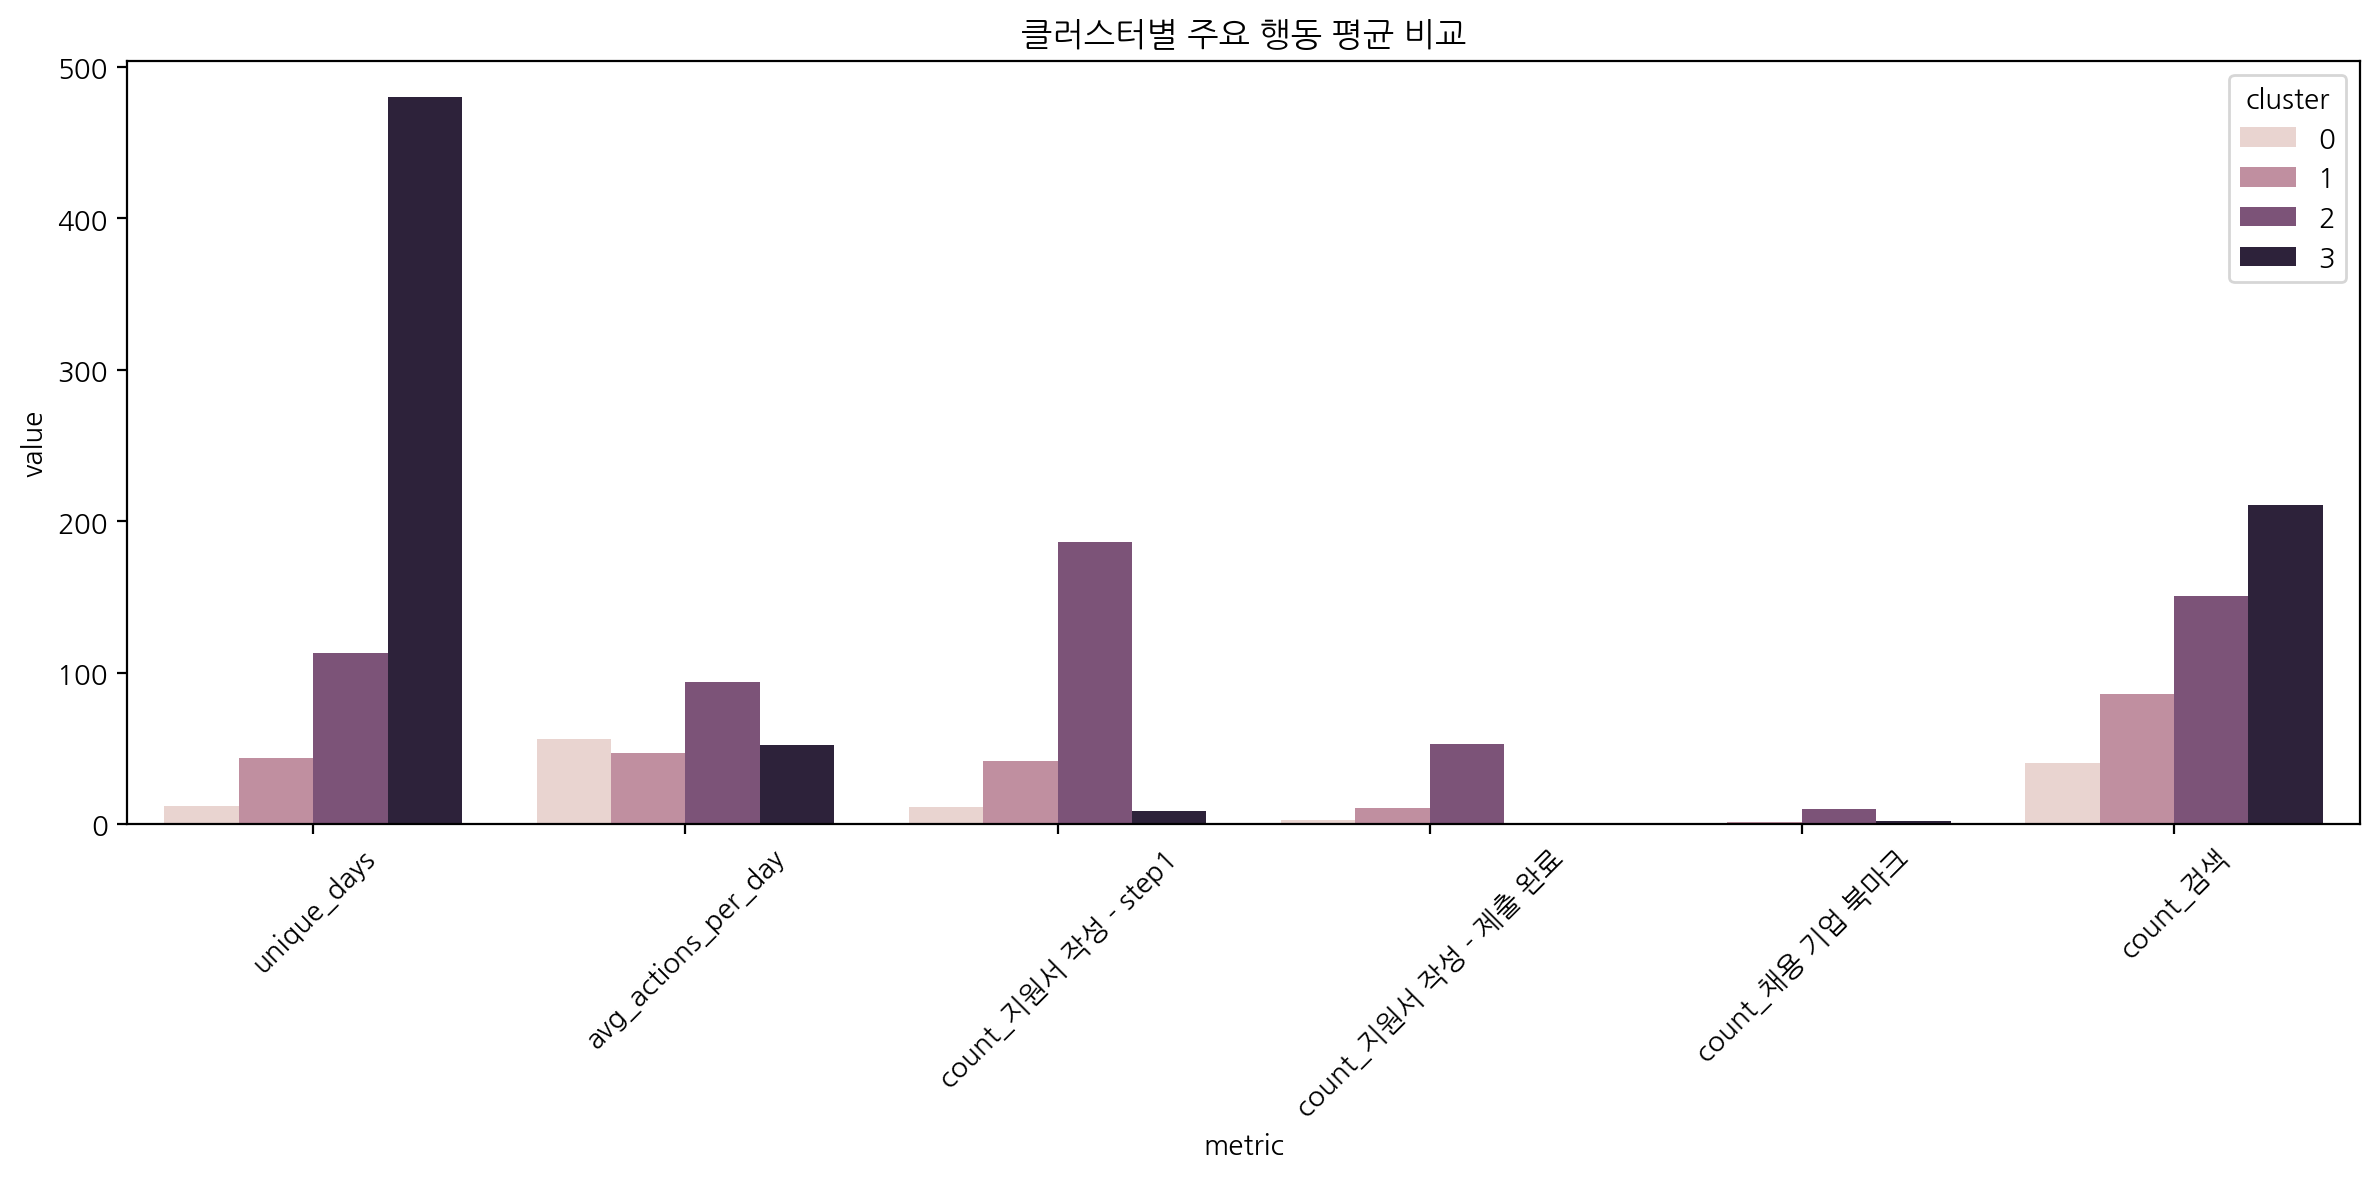

In [ ]:
# 원하는 컬럼만 추출해서 평균값 계산
key_cols = [
    'cluster', 'unique_days', 'avg_actions_per_day',
    'count_지원서 작성 - step1', 'count_지원서 작성 - 제출 완료',
    'count_채용 기업 북마크', 'count_검색'
]

df_summary = cluster_df[key_cols].groupby('cluster').mean().reset_index()

# ------------------------------
# 클러스터별 평균 행동 시각화 (total_action 제외)
# ------------------------------
plt.figure(figsize=(12, 6))
df_melted = df_summary.melt(id_vars='cluster', var_name='metric', value_name='value')
sns.barplot(data=df_melted, x='metric', y='value', hue='cluster')
plt.xticks(rotation=45)
plt.title('클러스터별 주요 행동 평균 비교')
plt.tight_layout()
plt.show()

**🔹⚪ Cluster 0: 잠자는 숲속의 유저**
- 이 군집의 사용자는 평균 약 12일 동안 플랫폼을 이용했으며, 전체 행동 수는 약 473회로 활동량 자체는 적지 않은 편입니다. 하루 평균 56회 이상의 행동을 보이고 있어, 접속 시에는 꽤 집중적으로 활동하는 경향을 보입니다.

- 활동 종류는 평균 18종으로 다양하게 시도하고 있으며, 주로 채용공고 조회(116건), **프로필 작성/수정(113건)**에 집중되어 있습니다.

- 그러나 지원서 제출건은 2.56으로, 유저 대비 낮은 지원율을 가지고 있습니다.

- 야간 활동도 적지 않으며(night_actions: 101회), 심야 시간대에 접속하여 정보 탐색에 집중하는 경향이 있습니다.

📌 특징 요약

- 비교적 짧은 기간 동안 자주 방문하며 폭넓은 탐색을 시도하지만, 최종 지원에는 이르지 않습니다.

- 정보를 찾고 가능성을 탐색하는 ‘관망형’ 유저로 판단됩니다.




**🔹🟠 Cluster 1: 지원할래말래 유저**
- 이 군집은 약 44일간 플랫폼을 이용하며, 총 1,707회의 행동을 수행한 중간 수준의 활동성을 가진 그룹입니다. 하루 평균 46회 정도의 행동을 보이며, 지속적이지만 비교적 절제된 패턴을 나타냅니다.

- 지원서 제출건은 평균 10.39건으로, 다양한 기능을 활용하고 있음에도 클러스터2보다는 낮은 지원율을 보이고 있습니다.

- 프로필 작성(350회), 채용공고 조회(485회), 추천 서비스(94회), **지원서 작성 초기 단계(step1~3)**까지는 활발히 수행합니다.

- 특히 ‘지원서 step1~3’는 높은데 step4와 제출 완료는 낮은 것이 특징으로, 지원서를 거의 완성했으나 제출 직전에서 중단하는 경향이 있습니다.

📌 특징 요약

- 충분한 정보 탐색과 프로필 준비 후 지원 직전 단계에서 머무는 ‘준비형’ 사용자로 판단됩니다.

**🔹🟢 Cluster 2: 취업조아 유저 (Core Converters)**
- 이 그룹은 플랫폼을 가장 적극적이고 전략적으로 활용하는 핵심 사용자군입니다. 평균 112일 이상 이용하며, 총 7,739건의 활동과 22종 이상의 행동 유형을 보입니다.

- 지원서 작성 및 제출 행동이 매우 활발하며, 지원서 작성 - 제출 완료가 86.5건에 달합니다.

- 추천 서비스(2677건), 채용공고 조회(1746건), 프로필 작성/수정(855건) 등 전방위적으로 기능을 활용하고 있습니다.

- 야간 활동도 높고(night_actions: 1944회), 전반적인 몰입도가 매우 높습니다.

📌 특징 요약

- 플랫폼을 채용 지원을 위한 실질적인 도구로 인식하며, 가장 높은 전환율을 보이는 핵심 유저로 판단됩니다.


**🔹🟣 Cluster 3: 비정상 행동군 혹은 기업 내부 테스트 계정 추정 (Anomalous/Outlier Group)**
- 이 클러스터는 매우 특이한 행동 패턴을 보입니다. 480일 동안 무려 24,349회의 행동, 활동 유형 22종, 특정 기능에 과도하게 집중된 행동이 특징입니다.

- 기타(12,777건), 프로필 작성(2,940건), 지원서 업데이트(894건) 등 반복적으로 특정 행동을 수행

- 특히 가이드 흐름(348건), 알림 확인(521건), 지원 진행 상태 확인, 설정, 소셜 기능 등 테스트 환경에서 주로 발생하는 로그가 비정상적으로 많이 기록됩니다.

- 지원서 제출 완료는 0이며, 회원가입, 본인인증 등의 이니셜 이벤트도 대부분 완료된 것으로 나와 있습니다.

📌 특징 요약

- 일반 사용자의 행동 패턴으로 보기 어려우며, 운영팀 계정, QA 테스트 사용자, 또는 수집 오류 가능성이 있습니다.

In [ ]:
# user_uuid와 cluster만 추출해서 병합
user_clusters = user_features[['user_uuid', 'cluster']]

# log_df에 cluster 컬럼 추가
log_df = log_df.merge(user_clusters, on='user_uuid', how='left')

In [ ]:
# 각 클러스터별 유저 수 세기
cluster_counts = user_features['cluster'].value_counts()

# 출력
print(cluster_counts)

cluster
0    3074
1    1519
2     150
3       3
Name: count, dtype: int64


### 5.3.2. 클러스터 3의 이상치 여부 검증을 위한 비교 분석

- 클러스터링 결과 분석을 통해 확인한 바, 클러스터 3은 다른 군집들과 비교했을 때 통상적인 사용자 행동 범위를 크게 벗어나는 특성을 보였습니다. 특히 활동 횟수, 행동 유형 다양성, 특정 기능 사용 빈도 등 주요 지표에서 비정상적으로 높은 수치나 편중된 패턴이 나타났습니다.

- 이러한 결과는 클러스터 3이 일반적인 사용자 집단이 아닌, 이상치(outlier) 또는 테스트 계정, 시스템 자동화 로그 등이 혼재된 군집일 가능성을 시사합니다.

- 보다 객관적인 검토를 위해, 클러스터 0~2의 평균값을 정상 사용자군의 대표 기준선으로 설정하고, 클러스터 3과의 차이 정도를 정량적으로 분석하였습니다.

- 이를 정량적으로 검토하기 위해, 클러스터 0~2의 데이터를 기반으로 평균과 표준편차를 산출하고, 클러스터 3의 각 항목별 Z-Score를 계산하여 통계적 이탈 정도를 평가하였습니다. 또한, p-value를 함께 산출하여, 관찰된 차이가 통계적으로 유의미한지를 검정하였습니다.

                          Cluster3_Value     Mean_012      Std_012    Z-Score  \
total_actions               24349.333333  3306.620857  3888.492715   5.411534   
unique_days                   480.000000    56.220837    51.412120   8.242787   
avg_actions_per_day            52.195202    65.617210    25.087493  -0.535008   
action_type_count              22.000000    21.091628     1.964230   0.462457   
active_hours                   23.000000    16.219163     5.446714   1.244941   
night_actions                1601.000000   810.306820   992.149344   0.796950   
days_since_last_activity        0.000000     0.000000     0.000000        NaN   
submitted_application           0.333333     0.976726     0.031148 -20.656231   
count_채용정보 조회                4811.000000   782.966836   854.680888   4.712909   
count_기타                    12777.666667   385.521031   405.289859  30.576007   
count_프로필 작성/수정              2940.666667   439.841055   379.130500   6.596213   
count_지원서 업데이트              

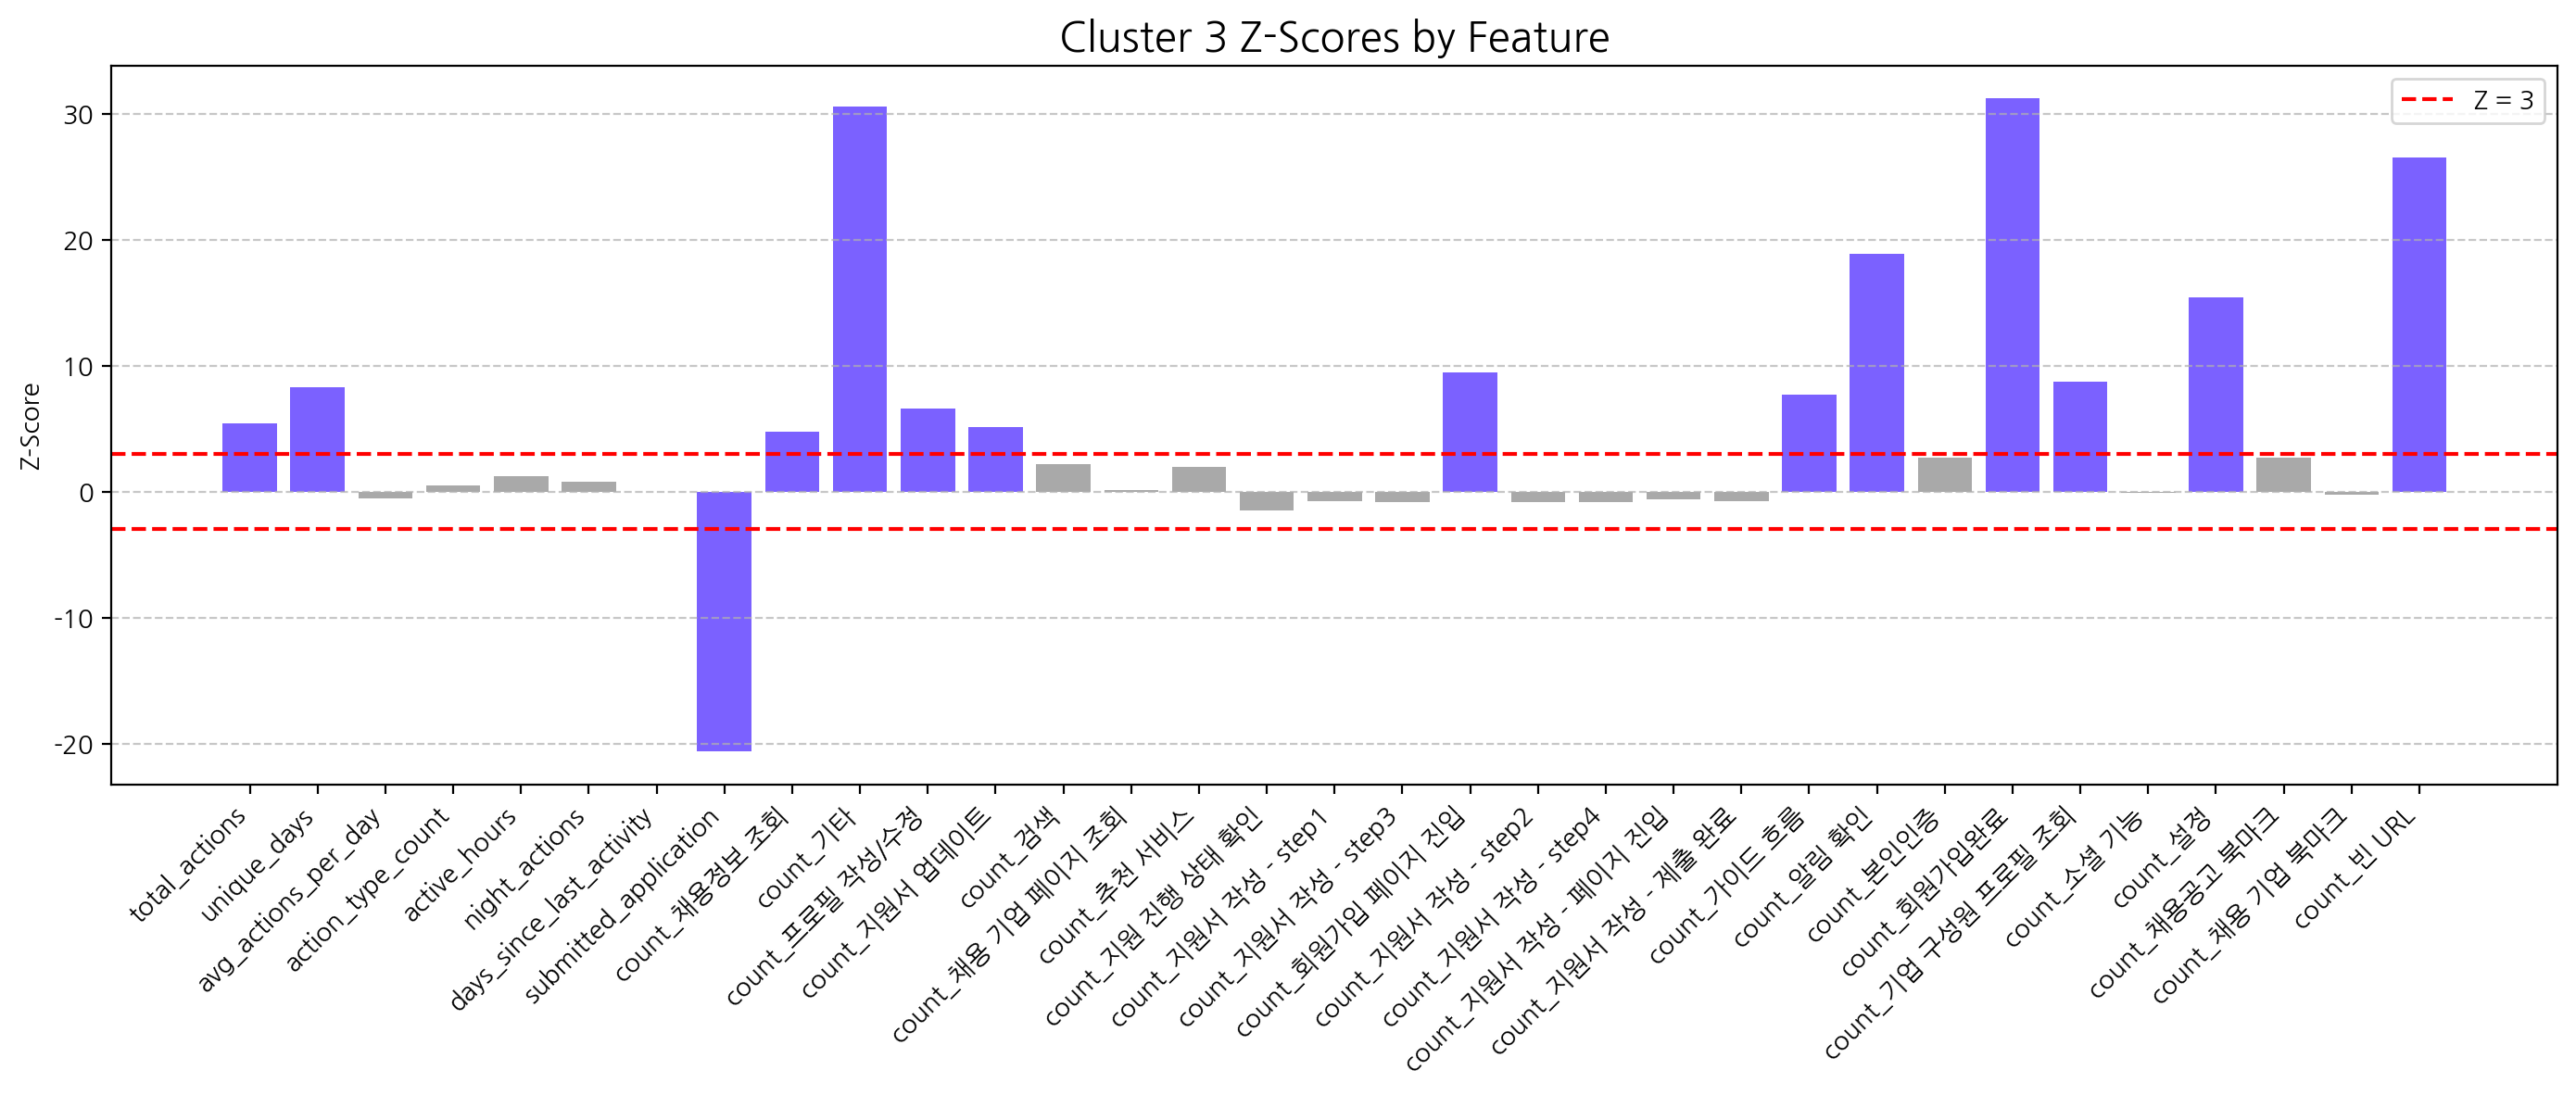

In [ ]:
# 1. 클러스터 0,1,2 데이터
clusters_012 = cluster_profile.loc[[0, 1, 2]]

# 2. 클러스터 3 데이터
cluster_3 = cluster_profile.loc[3]

# 3. 평균과 표준편차 계산
mean_012 = clusters_012.mean()
std_012 = clusters_012.std()

# 4. Z-Score 계산
z_scores = (cluster_3 - mean_012) / std_012

# 4. p-value 계산 (정규분포 기반 양측 검정)
p_values = 2 * (1 - stats.norm.cdf(np.abs(z_scores)))

# 5. 결과 정리
result = pd.DataFrame({
    'Cluster3_Value': cluster_3,
    'Mean_012': mean_012,
    'Std_012': std_012,
    'Z-Score': z_scores,
    'p-value': p_values
})

print(result)

# 6. 시각화 (Z-Score 바 차트)
plt.figure(figsize=(14, 6))
bars = plt.bar(result.index, result['Z-Score'], color=['#7B61FF' if abs(x) >= 3 else '#A9A9A9' for x in result['Z-Score']])
plt.axhline(3, color='red', linestyle='--', label='Z = 3')
plt.axhline(-3, color='red', linestyle='--')
plt.title('Cluster 3 Z-Scores by Feature', fontsize=16)
plt.xticks(rotation=45, ha='right')
plt.ylabel('Z-Score')
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

#### 5.3.2.1. 클러스터 3 통계적 이상치 검토 결과

- Z-Score와 p-value를 활용한 정량적 분석 결과, 클러스터 3은 다수 항목에서 통계적으로 유의미한 수준의 이탈을 보였습니다.

- 활동량 관련 항목 (total_actions, unique_days, count_기타 등)

    - total_actions (Z = 5.41, p < 0.000001), unique_days (Z = 8.24, p ≈ 0) 등은 Z-Score가 5 이상, p-value가 0에 수렴하는 값을 보여 일반적인 사용자 활동 범위를 크게 초과하는 이상치로 해석됩니다.

- 특정 기능 사용 빈도 (count_기타, count_알림 확인, count_회원가입완료 등)

    - count_기타 (Z = 30.58), count_알림 확인 (Z = 18.87), count_회원가입완료 (Z = 31.22) 등은 매우 높은 Z-Score와 유의미한 p-value (p ≈ 0)를 나타내며, 정상적인 사용자 행동으로 설명하기 어려운 과도한 사용 경향을 보였습니다.

- 특정 기능 과소 사용 (submitted_application 등)

    - submitted_application (Z = -20.66, p ≈ 0)은 오히려 평균보다 극단적으로 적은 값을 보여, 정상적인 지원 활동을 거의 하지 않은 것으로 나타났습니다.

- 기타 주요 항목

    - count_프로필 작성/수정, count_지원서 업데이트, count_가이드 흐름, count_기업 구성원 프로필 조회, count_설정, count_빈 URL 항목 등도 Z-Score가 ±5 이상이며, 모두 p-value가 유의수준 0.05보다 훨씬 작은 수준을 보여 통계적으로 명확한 이상치임을 확인했습니다.

### 5.3.3. 클러스터 분석

#### 5.3.3.1. 지원 행동과의 연관성 파악을 위한 상관관계 분석

- 사용자 행동 데이터를 바탕으로 클러스터링을 수행한 이후, 보다 실질적인 전환 행동, 즉 ‘지원서 제출(submitted_application)’에 영향을 미치는 요인을 파악하고자 **상관관계 분석(Pearson Correlation)**을 수행하였습니다.

- 분석 대상은 플랫폼 내에서 사용자가 자주 수행하는 주요 행동 중, 지원 행동과 의미 있는 관련성이 있을 것으로 판단되는 항목들로 구성하였으며, 구체적으로는 다음과 같은 지표들을 선정하였습니다:

    - 추천 서비스 이용

    - 프로필 작성/수정

    - 채용 기업 페이지 조회

    - 지원서 작성 초기 단계(step1)

    - 지원서 제출 완료

    - 검색 기능 사용

- 이들 행동과 submitted_application 간의 Pearson 상관계수를 시각화하여, 어떤 행동이 실제 지원으로 이어지는 데 더 큰 영향을 주는지 파악하려 합니다.


📊 Cluster 0 - Pearson 상관관계 분석


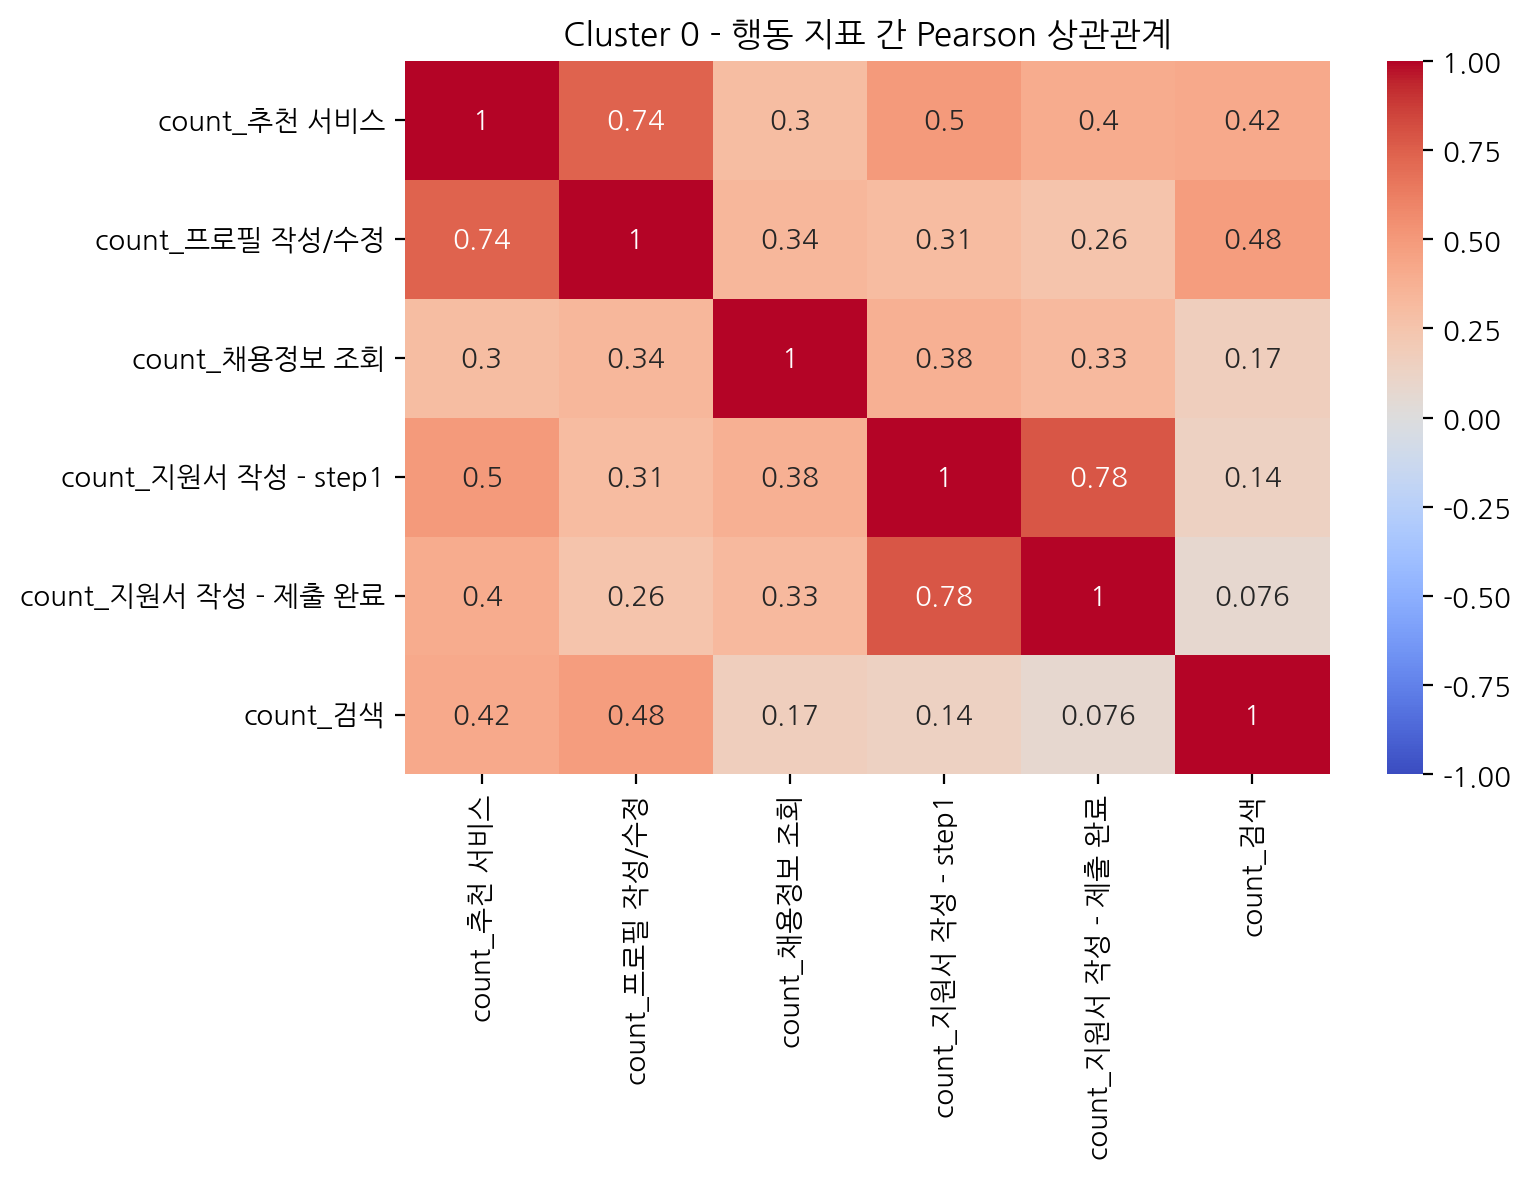


📊 Cluster 1 - Pearson 상관관계 분석


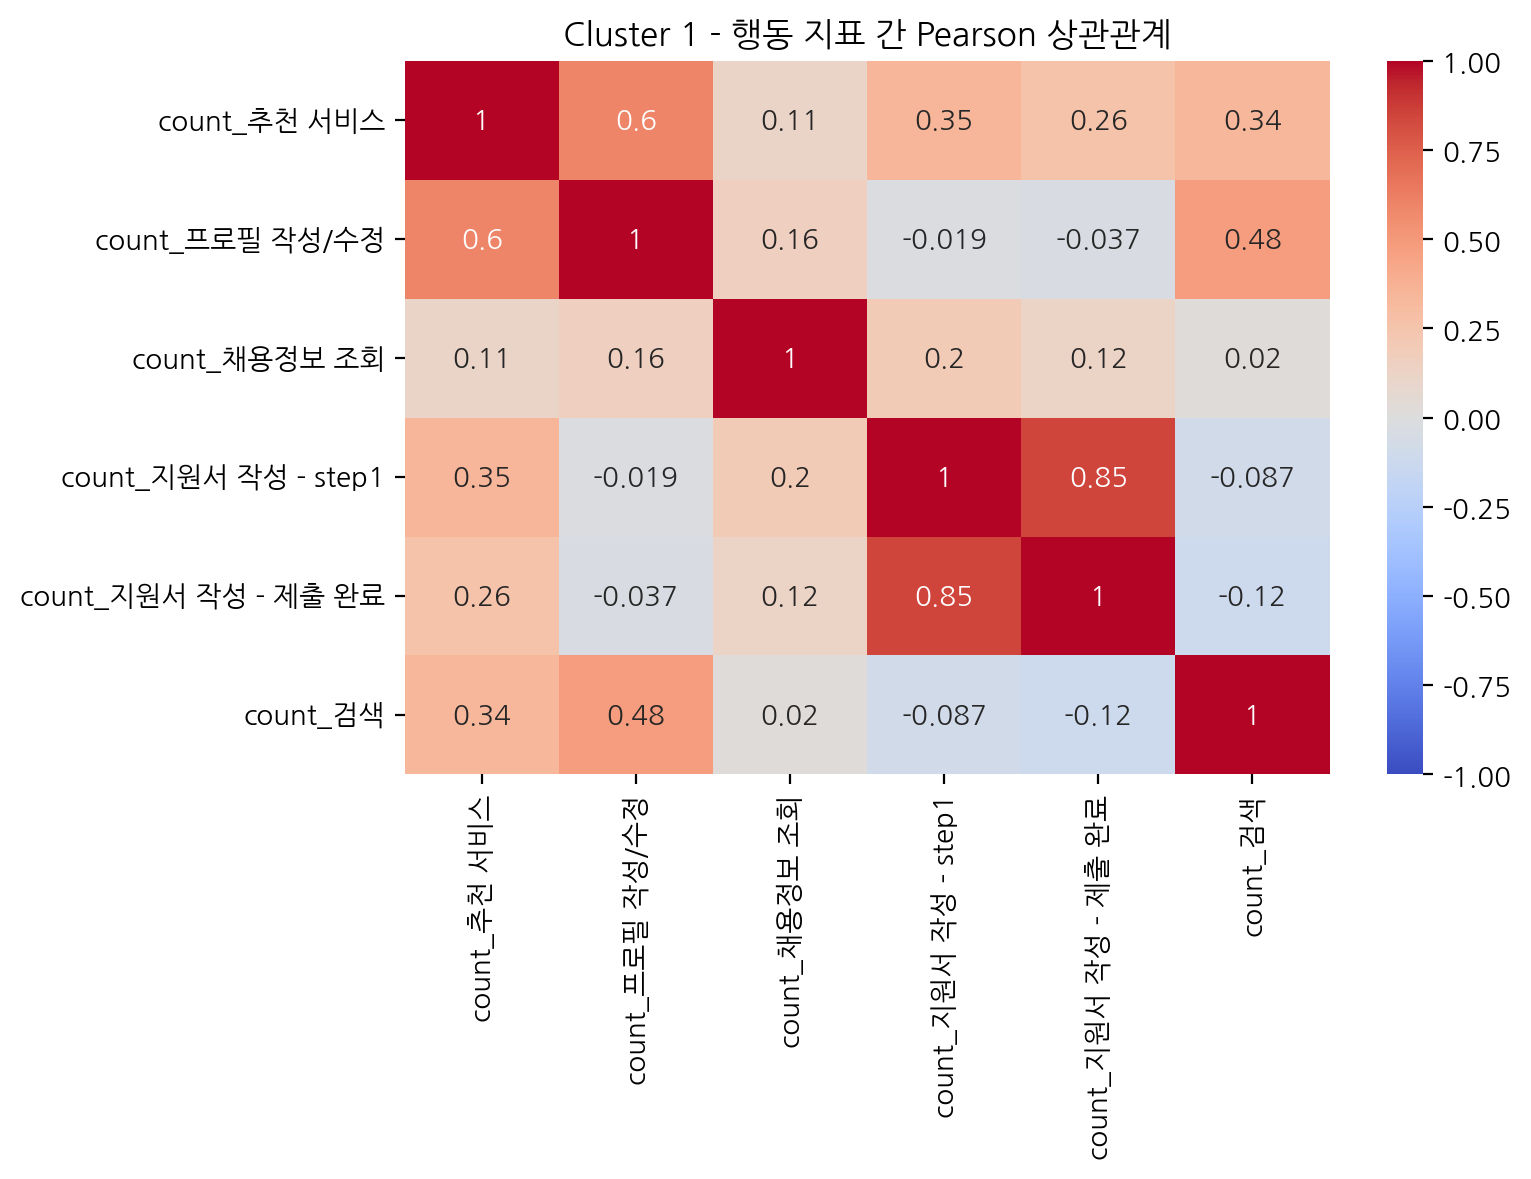


📊 Cluster 2 - Pearson 상관관계 분석


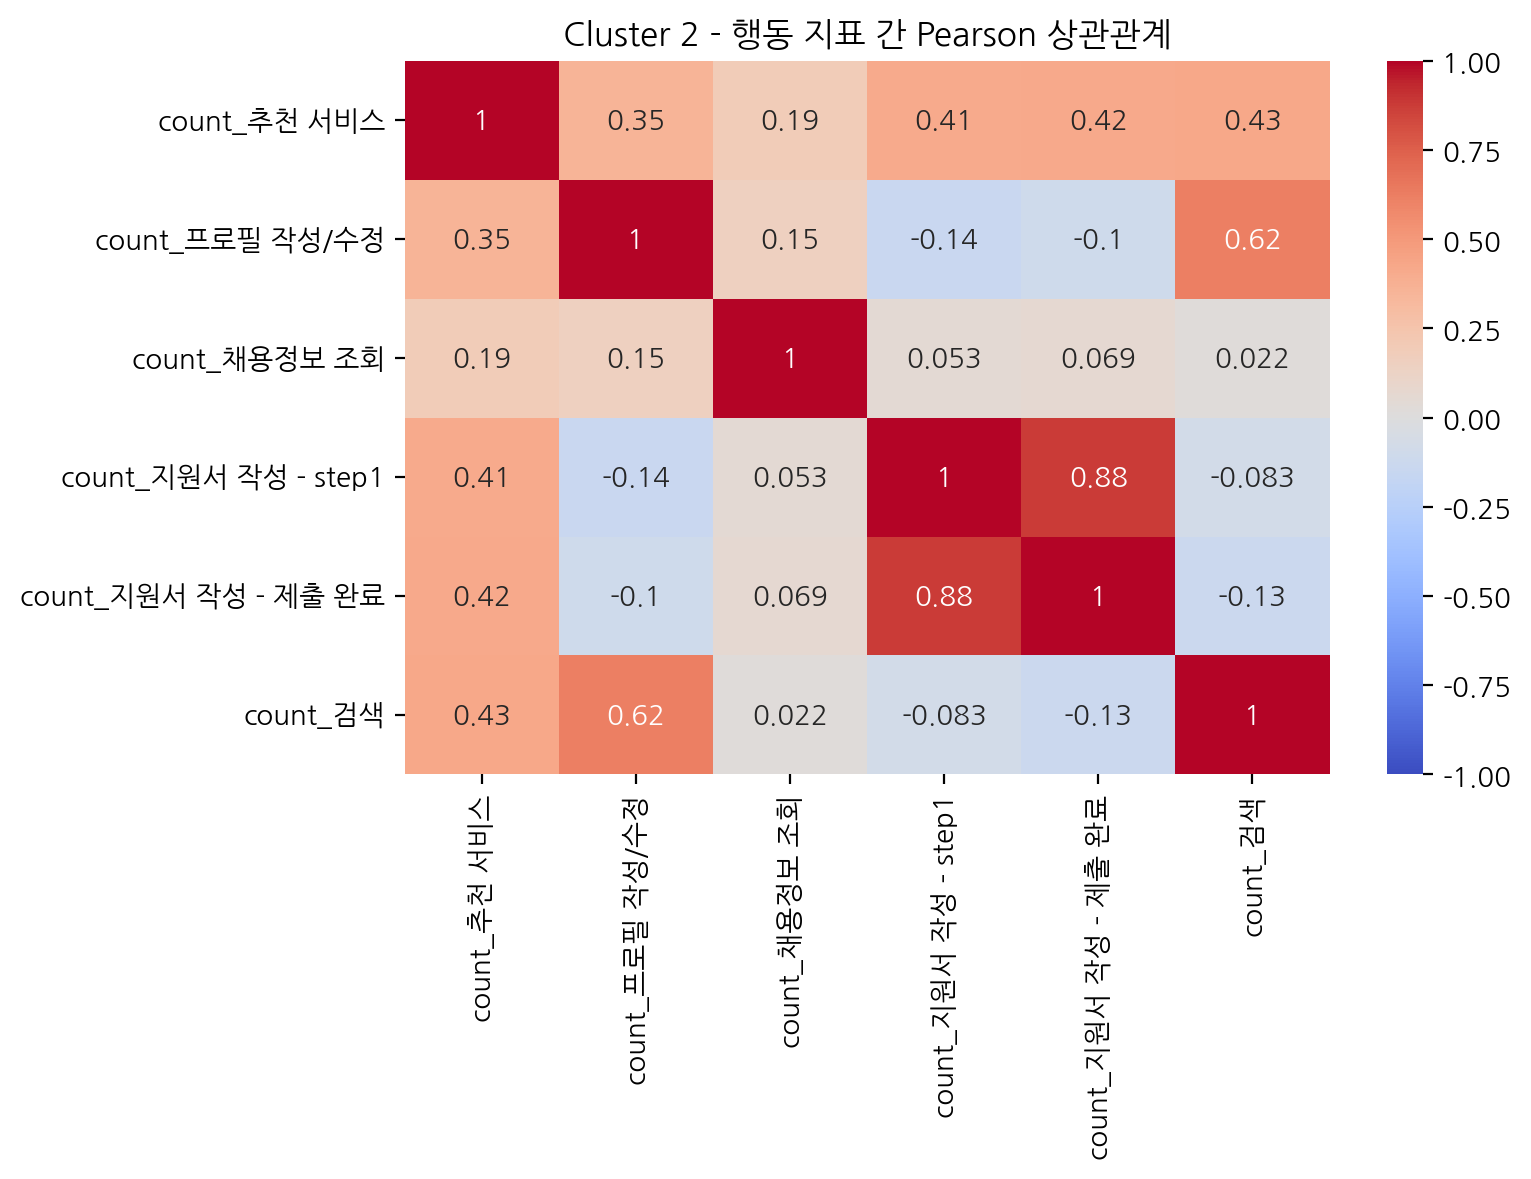


📊 Cluster 3 - Pearson 상관관계 분석


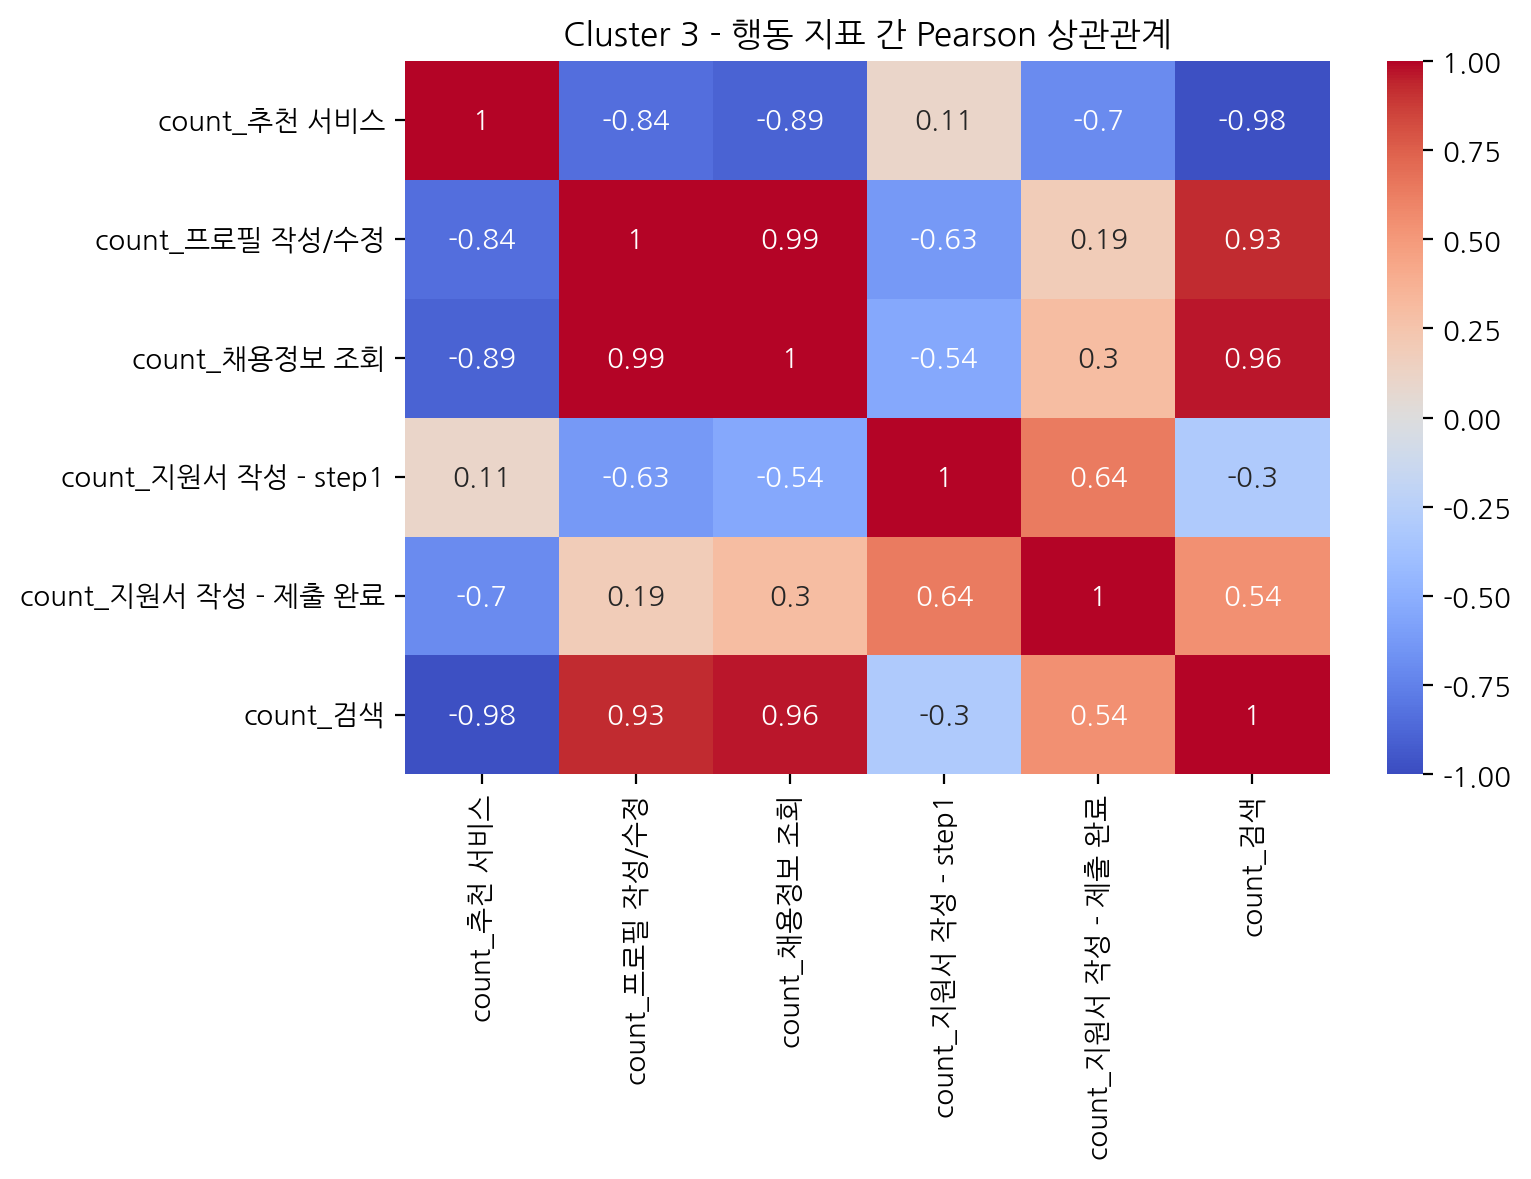

In [ ]:
corr_cols = [
    'count_추천 서비스', 'count_프로필 작성/수정',
    'count_채용정보 조회', 'count_지원서 작성 - step1',
    'count_지원서 작성 - 제출 완료', 'count_검색'
]

# 클러스터별 상관관계 분석
for cluster_id in sorted(user_features['cluster'].unique()):
    print(f"\n📊 Cluster {cluster_id} - Pearson 상관관계 분석")

    # 해당 클러스터 데이터 필터링
    cluster_data = user_features[user_features['cluster'] == cluster_id]

    # 필요한 컬럼만 추출
    corr_data = cluster_data[corr_cols]

    # 상관계수 계산
    corr_matrix = corr_data.corr(method='pearson')

    # 시각화
    plt.figure(figsize=(8, 6))
    sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
    plt.title(f"Cluster {cluster_id} - 행동 지표 간 Pearson 상관관계")
    plt.tight_layout()
    plt.show()

##### 5.3.3.1.1. 상관관계 분석 결과

#### 5.3.3.2. 클러스터별 전환율 계산

In [ ]:
# 전환율 계산 함수
def calculate_conversion_rate(df, action_1, action_2):
    return df[action_1] / df[action_2] if df[action_2] != 0 else 0

# 클러스터별 전환율 계산
cluster_df['회원가입 → 지원서 작성 전환율'] = cluster_df.apply(lambda row: calculate_conversion_rate(row, 'count_회원가입완료', 'count_지원서 작성 - step1'), axis=1)
cluster_df['지원서 작성 → 제출 완료 전환율'] = cluster_df.apply(lambda row: calculate_conversion_rate(row, 'count_지원서 작성 - 제출 완료', 'count_지원서 작성 - step1'), axis=1)
cluster_df['채용 정보 조회 → 채용 공고 북마크 전환율'] = cluster_df.apply(lambda row: calculate_conversion_rate(row, 'count_채용정보 조회', 'count_채용공고 북마크'), axis=1)
cluster_df['프로필 작성 → 프로필 수정 전환율'] = cluster_df.apply(lambda row: calculate_conversion_rate(row, 'count_프로필 작성/수정', 'count_프로필 작성/수정'), axis=1)  # 자기 자신으로 나누면 항상 1
cluster_df['채용 기업 북마크 → 기업 페이지 조회 전환율'] = cluster_df.apply(lambda row: calculate_conversion_rate(row, 'count_채용 기업 북마크', 'count_채용 기업 페이지 조회'), axis=1)
cluster_df['채용 기업 북마크 → 지원서 작성 전환율'] = cluster_df.apply(lambda row: calculate_conversion_rate(row, 'count_채용 기업 북마크', 'count_지원서 작성 - 페이지 진입'), axis=1)

cluster_df[['회원가입 → 지원서 작성 전환율', '지원서 작성 → 제출 완료 전환율', '채용 정보 조회 → 채용 공고 북마크 전환율',
             '프로필 작성 → 프로필 수정 전환율', '채용 기업 북마크 → 기업 페이지 조회 전환율', '채용 기업 북마크 → 지원서 작성 전환율']]

회원가입 → 지원서 작성 전환율  지원서 작성 → 제출 완료 전환율  채용 정보 조회 → 채용 공고 북마크 전환율  \
0           0.097958            0.225804                 63.353450   
1           0.026619            0.248544                 41.740194   
2           0.007582            0.283333                 40.506494   
3           0.769231            0.076923                 63.302632   

   프로필 작성 → 프로필 수정 전환율  채용 기업 북마크 → 기업 페이지 조회 전환율  채용 기업 북마크 → 지원서 작성 전환율  
0                  1.0                   0.010282                0.217972  
1                  1.0                   0.016699                0.398539  
2                  1.0                   0.003670                1.002721  
3                  1.0                   0.002147                1.166667

##### 5.3.3.2.1. 해석 결과

⚪잠자는 숲속의 유저
- 가입 → 지원서 작성 전환율: 9.8%로 가장 높음. 즉, 처음 진입 후 관심은 있지만 적극적이지는 않습니다.

- 작성 → 제출 전환율: 22.6%로 클러스터 0, 1, 2 중 가장 낮은 수치를 가지고 있습니다.

- 공고 북마크율: 63.4로 가장 높습니다. 공고 북마크를 많이 하는 특징을 가지고 있습니다.

- 기업 북마크 → 지원서 작성: 21.8% → 북마크 후 실제 지원으로 잘 이어지지 않는 것을 확인할 수 있습니다.


🟠지원할래말래 유저
- 가입 → 지원서 작성 전환율: 2.6%로 낮습니다.

- 작성 → 제출 전환율: 24.9%로 클러스터 0보다는 높은 전환율을 가집니다.

- 공고 북마크율: 41.7로 상대적으로 북마크를 잘 하지 않는 것을 확인할 수 있습니다.

- 기업 북마크 → 지원서 작성 전환율: 39.9%로 높음 → 북마크한 기업에 실제 지원을 많이 하는 것을 볼 수 있습니다.



🟢취업조아 유저
- 가입 → 지원서 작성 전환율: 0.76%로 매우 낮습니다. 가입 후 지원을 거의 하지 않는 것을 볼 수 있습니다.

- 작성 → 제출 전환율: 28.3%로 전체 최고 → 진입만 하면 가장 적극적으로 제출까지 완료하는 것을 확인할 수 있습니다.

- 공고 북마크율: 40.5%로 낮은 편입니다.

- 기업 북마크 → 지원서 작성 전환율: 100% 초과?! → 데이터상 거의 북마크 후 무조건 지원으로 이어집니다. 다만 수가 적어서 분모 < 분자일 가능성도 존재합니다.

#### 5.3.3.2. 클러스터별 지원서 작성 전환 퍼널

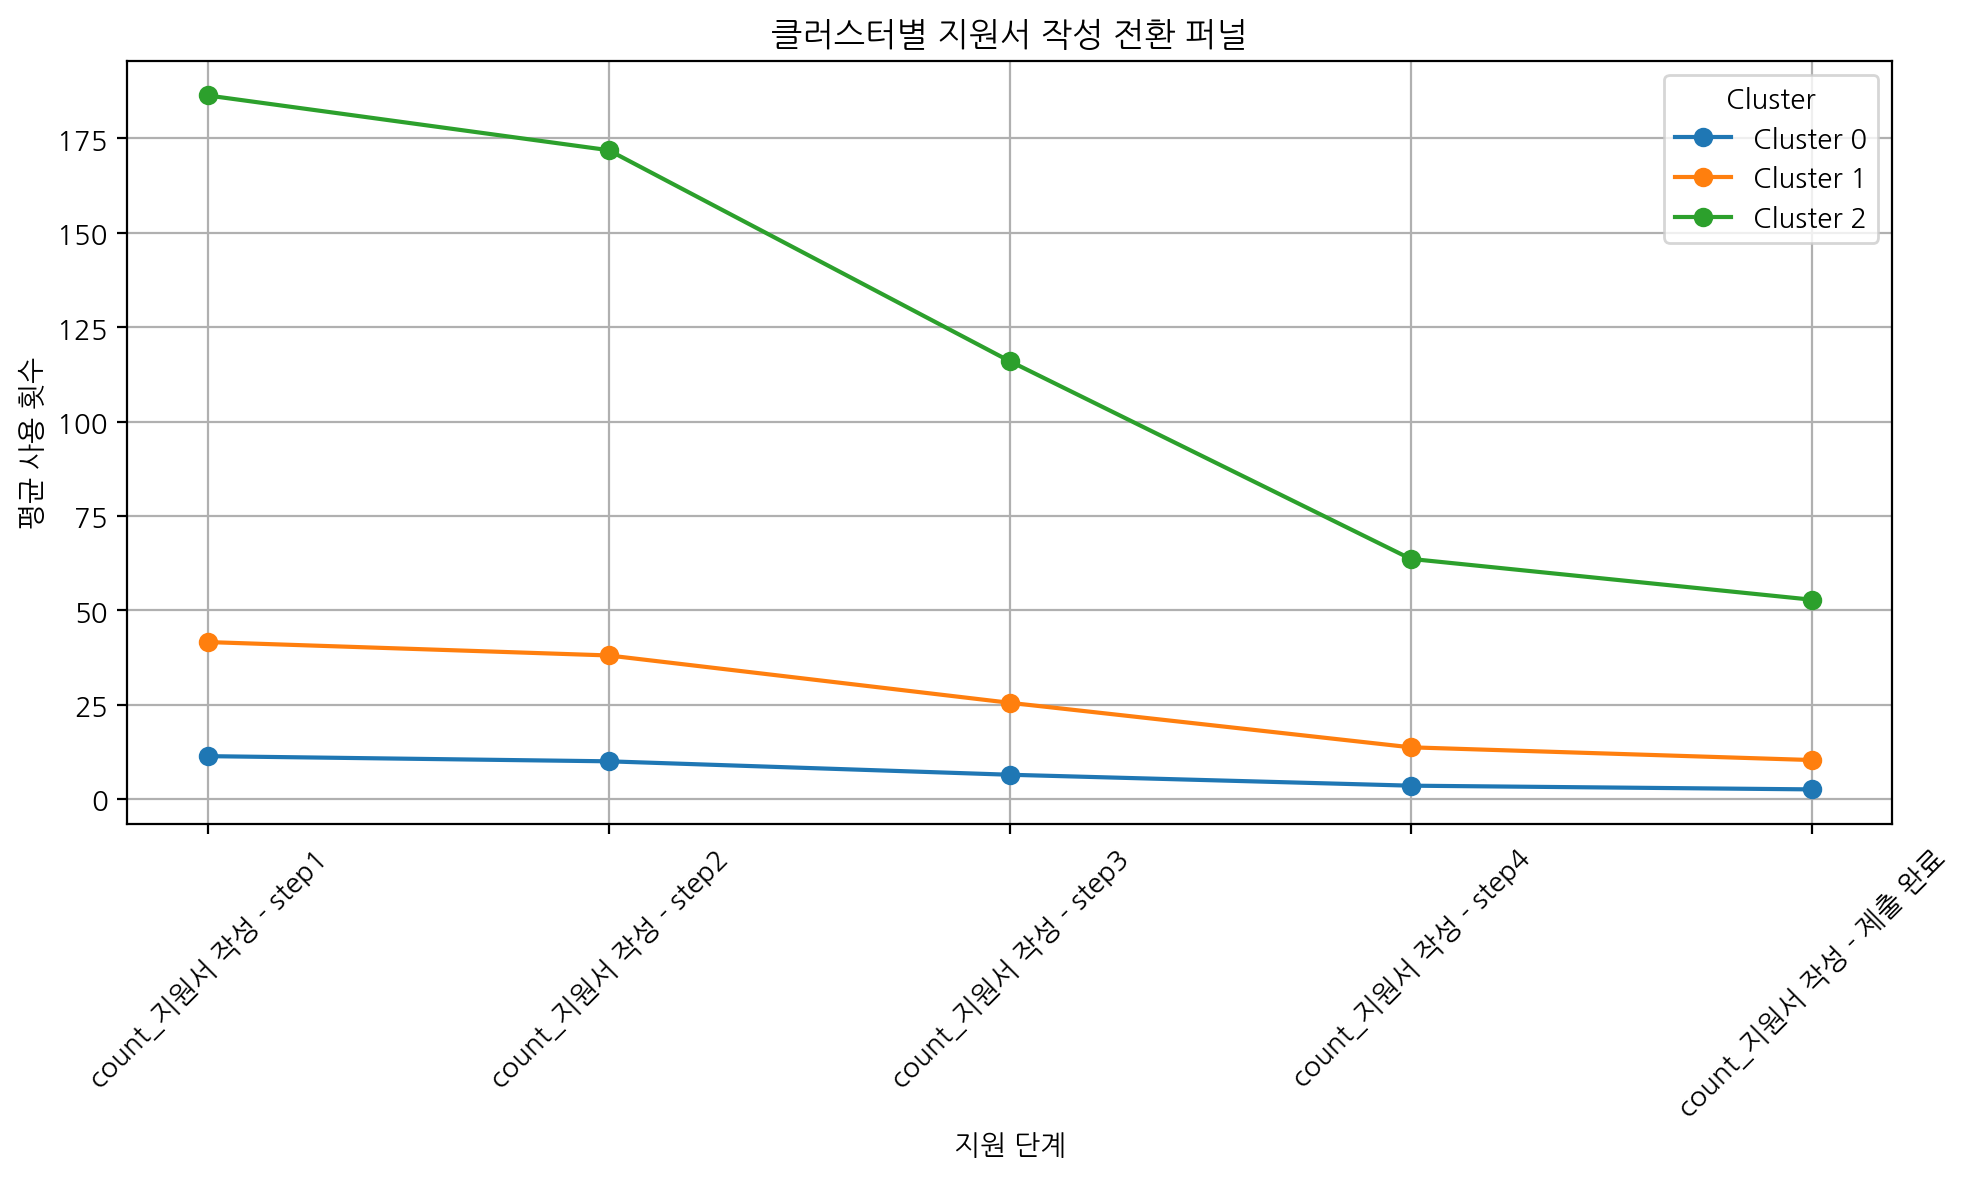

In [ ]:
funnel_steps = [
    'count_지원서 작성 - step1',
    'count_지원서 작성 - step2',
    'count_지원서 작성 - step3',
    'count_지원서 작성 - step4',
    'count_지원서 작성 - 제출 완료'
]

# 각 클러스터의 평균값 추출
funnel_data = filtered_df.groupby("cluster")[funnel_steps].mean().T

# 시각화
plt.figure(figsize=(10, 6))
for cluster_id in funnel_data.columns:
    plt.plot(funnel_data.index, funnel_data[cluster_id], marker="o", label=f"Cluster {cluster_id}")

plt.title("클러스터별 지원서 작성 전환 퍼널")
plt.xlabel("지원 단계")
plt.ylabel("평균 사용 횟수")
plt.xticks(rotation=45)
plt.legend(title="Cluster")
plt.tight_layout()
plt.grid(True)
plt.show()

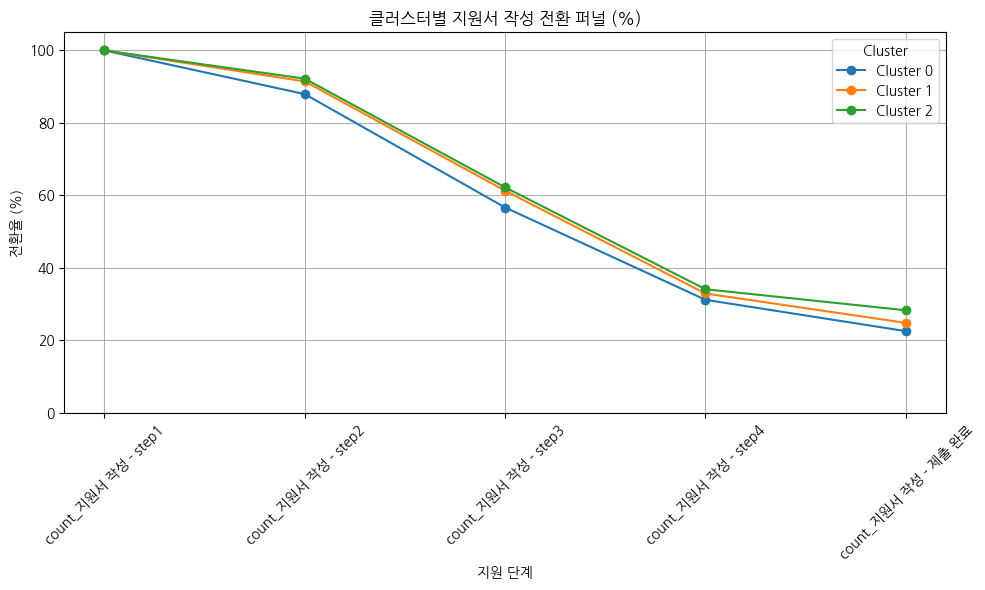

In [ ]:
# Step1을 기준으로 나머지 단계를 백분율로 변환 (전환 퍼널 계산)
funnel_percent = funnel_data.divide(funnel_data.loc['count_지원서 작성 - step1']) * 100

# 시각화
plt.figure(figsize=(10, 6))
for cluster_id in funnel_percent.columns:
    plt.plot(funnel_percent.index, funnel_percent[cluster_id], marker="o", label=f"Cluster {cluster_id}")

plt.title("클러스터별 지원서 작성 전환 퍼널 (%)")
plt.xlabel("지원 단계")
plt.ylabel("전환율 (%)")
plt.xticks(rotation=45)
plt.ylim(0, 105)
plt.legend(title="Cluster")
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
funnel_percent

cluster                        0           1           2
count_지원서 작성 - step1  100.000000  100.000000  100.000000
count_지원서 작성 - step2   87.956184   91.466734   92.221030
count_지원서 작성 - step3   56.681158   61.320187   62.238913
count_지원서 작성 - step4   31.220684   32.965120   34.134478
count_지원서 작성 - 제출 완료   22.580368   24.854403   28.333333

##### 5.3.3.2.1. 지원서 작성 전환 퍼널 결론

- ⚪잠자는 숲속의 유저
    - 전환율이 가장 낮은 그룹입니다.

    - step1 이후 이탈이 점진적으로 발생하며, 특히 step3, step4 이후 급격한 이탈이 관찰됩니다.

    - 최종 제출까지 이어지는 비율도 가장 낮아, 지원 완료까지의 몰입도가 가장 약한 클러스터로 볼 수 있습니다.

- 🟠지원할래말래 유저
    - 중간 정도의 전환율을 보입니다.

    - step1-step2 구간에서는 클러스터 0보다 다소 높은 전환율을 유지하지만, 이후 구간(step3최종 제출)에서는 비슷하게 감소하는 경향을 보입니다.

    - 전반적으로 초기 단계에서는 비교적 잘 진행되지만, 후반 단계에서 이탈이 발생하는 경향이 뚜렷합니다.

- 🟢취업조아 유저
    - 가장 높은 전환율을 기록하는 그룹입니다.

    - step1부터 step4까지 일관되게 다른 클러스터 대비 높은 전환율을 유지하고 있으며, 최종 제출까지의 이탈률도 가장 낮습니다.

    - 지원서를 끝까지 작성하고 제출하려는 의지가 가장 강한 클러스터로 해석됩니다.

📌 요약

|구분	|특징 요약|
|-------|---------|
|클러스터 0|	초반부터 이탈 많고, 최종 제출까지 도달 비율 낮음|
|클러스터 1	|초반 유지율은 괜찮지만, 중후반 이탈이 많음
|클러스터 2	|전 구간에서 가장 높은 전환율, 최종 제출까지 충성도 높음|

#### 5.3.3.3. 클러스터별 사용자의 이탈 지점 TOP 5

- 클러스터별로 사용자의 주요 이탈 지점을 파악하면, 각 그룹 특성에 맞춘 타겟팅 전략을 설계할 수 있으며, 이탈 구간을 집중 개선해 전환율과 리텐션을 효율적으로 높일 수 있습니다.

In [ ]:
# 각 사용자별 회원가입 시점
signup_time_df = log_df[log_df['action_type'] == '회원가입완료'].groupby('user_uuid')['timestamp_log'].min().reset_index()
signup_time_df.columns = ['user_uuid', 'signup_time']

# 원본 로그에 회원가입 시간 merge
log_with_signup = pd.merge(log_df, signup_time_df, on='user_uuid', how='left')

# 회원가입 이후의 로그만 필터링
post_signup_logs = log_with_signup[log_with_signup['timestamp_log'] >= log_with_signup['signup_time']]

user_cluster_df = user_features[['user_uuid', 'cluster']]
post_signup_logs = pd.merge(post_signup_logs, user_cluster_df, on='user_uuid', how='left')

In [ ]:
# 유저별 마지막 행동
last_actions = post_signup_logs.sort_values(by='timestamp_log').groupby('user_uuid').tail(1)

# 클러스터별 마지막 행동 수 세기
dropoff_counts = last_actions.groupby(['cluster', 'action_type']).size().reset_index(name='count')

# 비율 계산
dropoff_counts['percentage'] = (
    dropoff_counts['count'] /
    dropoff_counts.groupby('cluster')['count'].transform('sum') * 100
)

# 보기 쉽게 정렬
dropoff_counts = dropoff_counts.sort_values(by=['cluster', 'count'], ascending=[True, False])

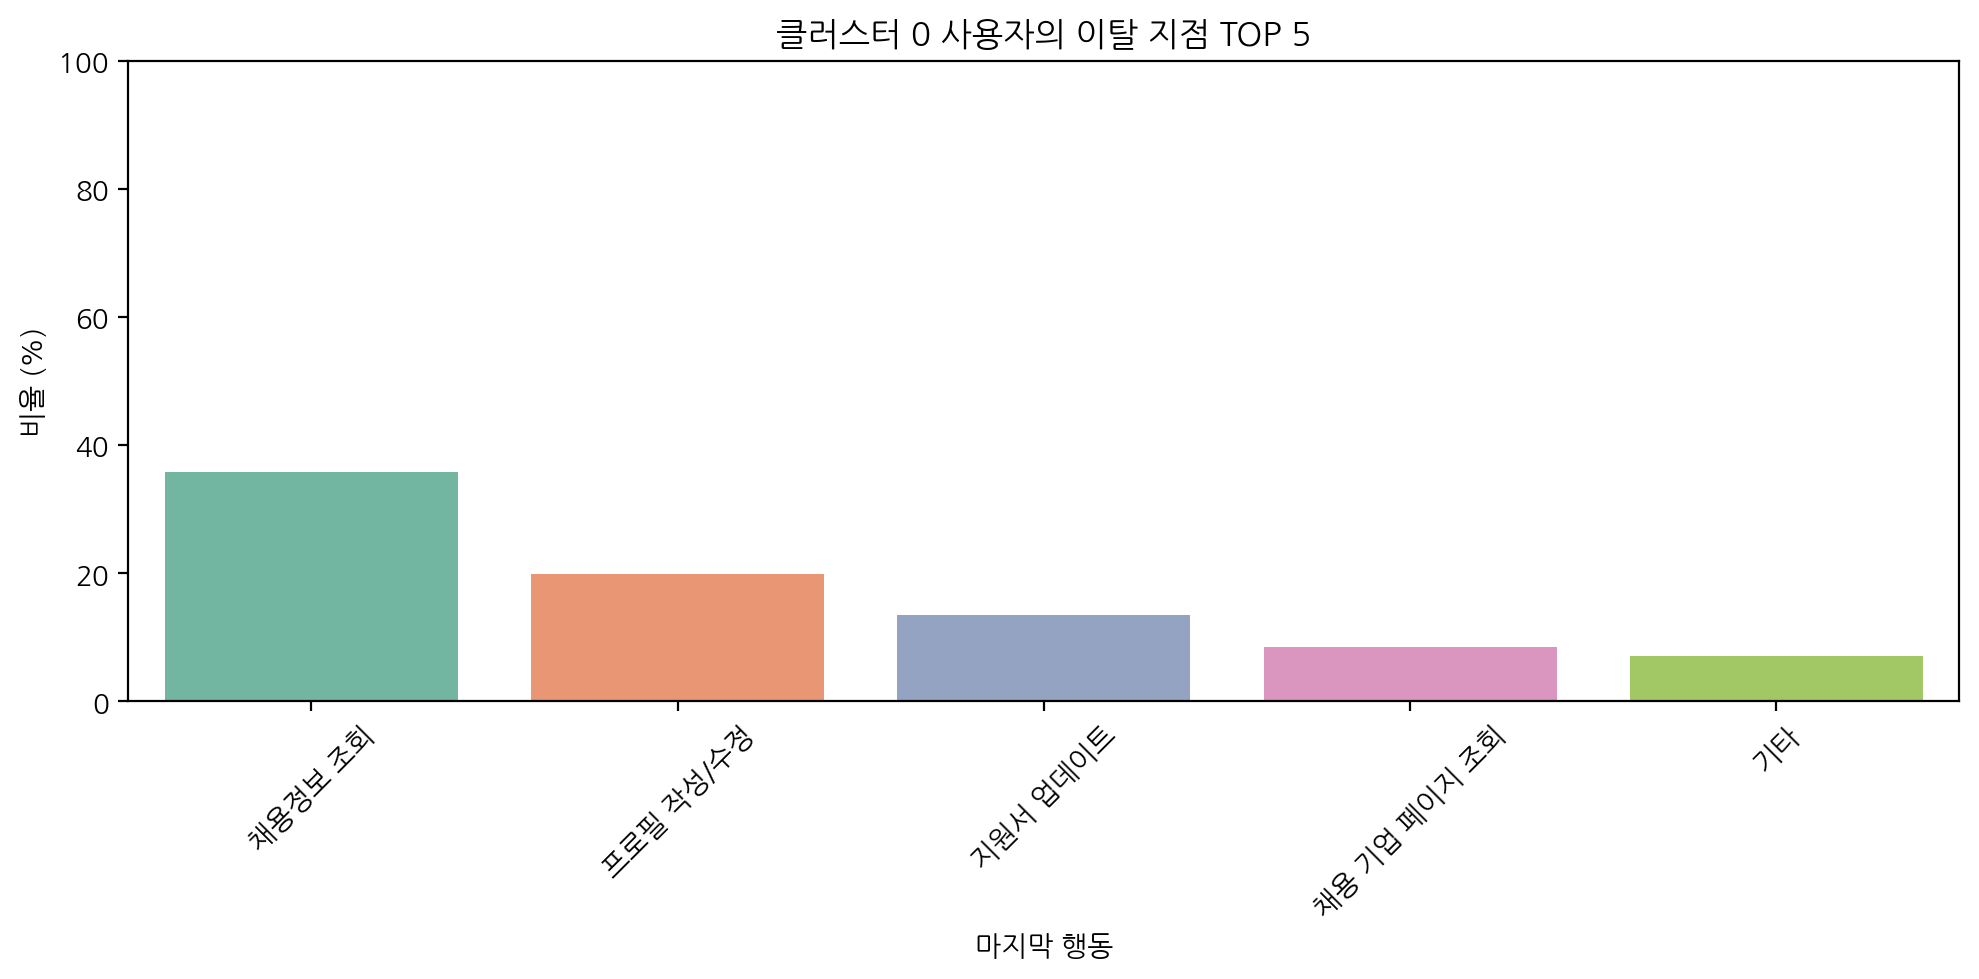

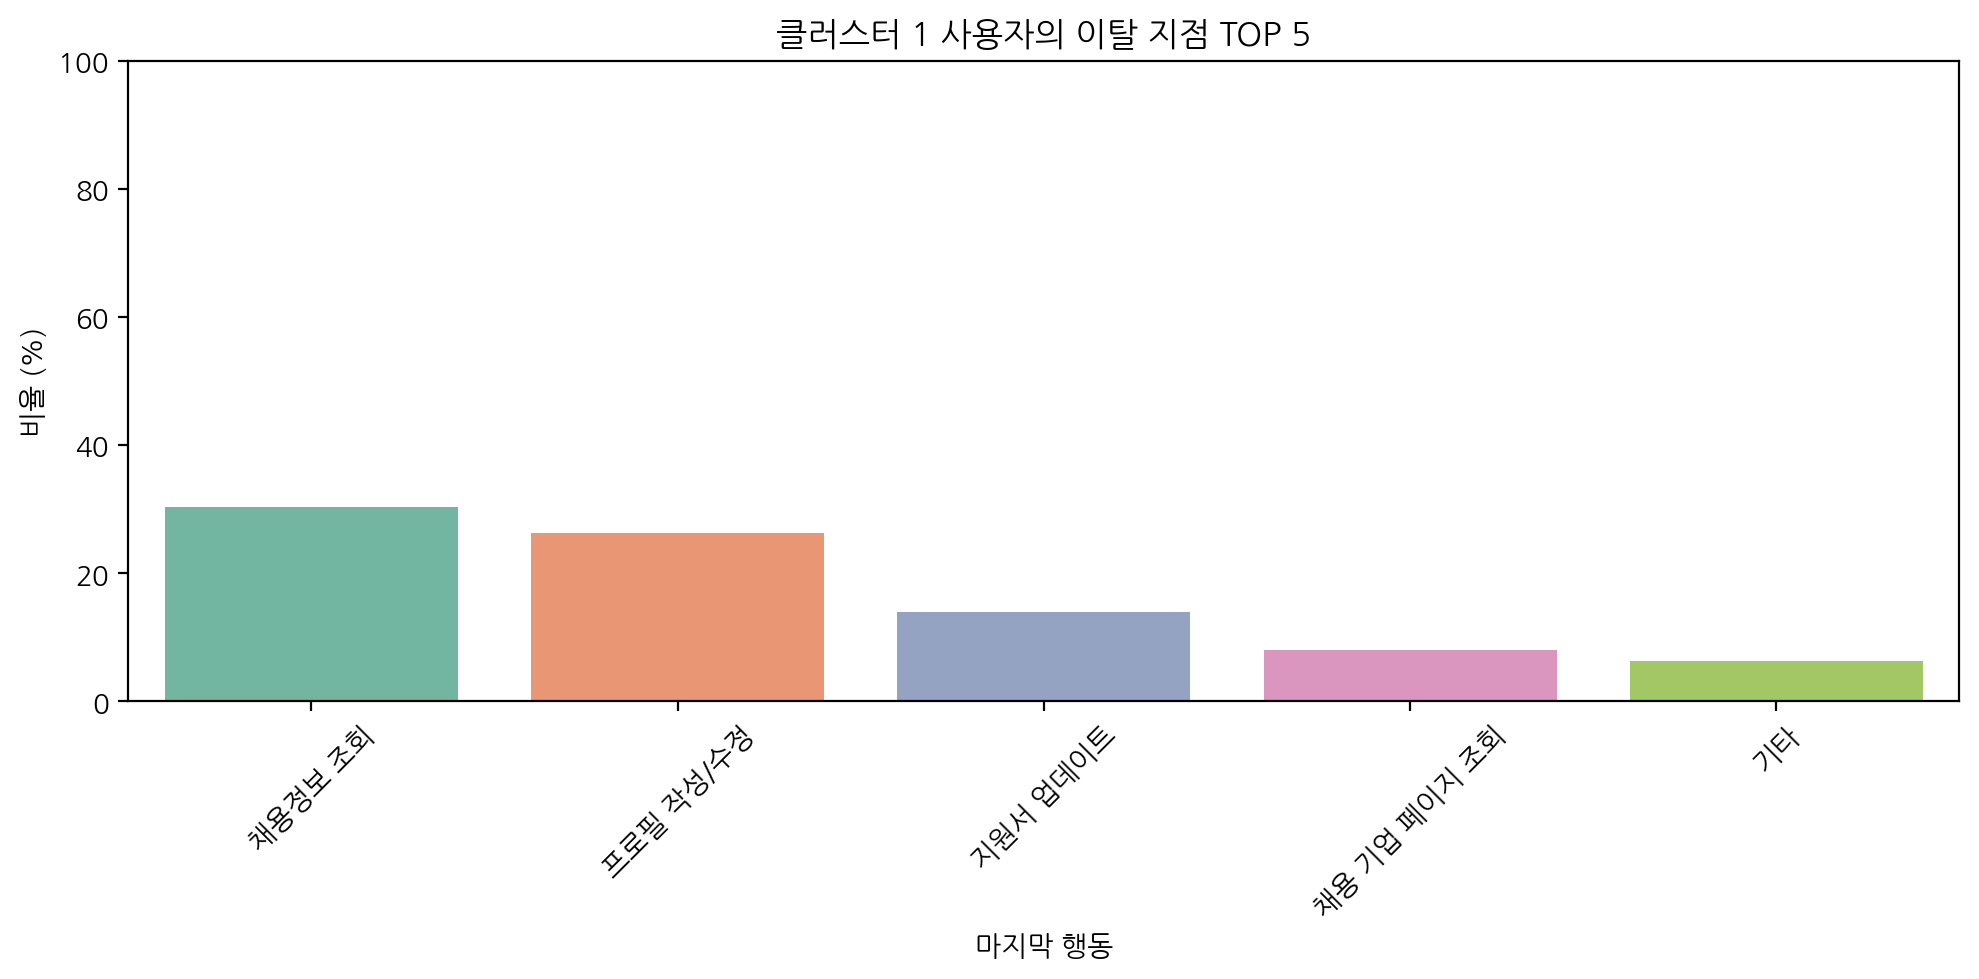

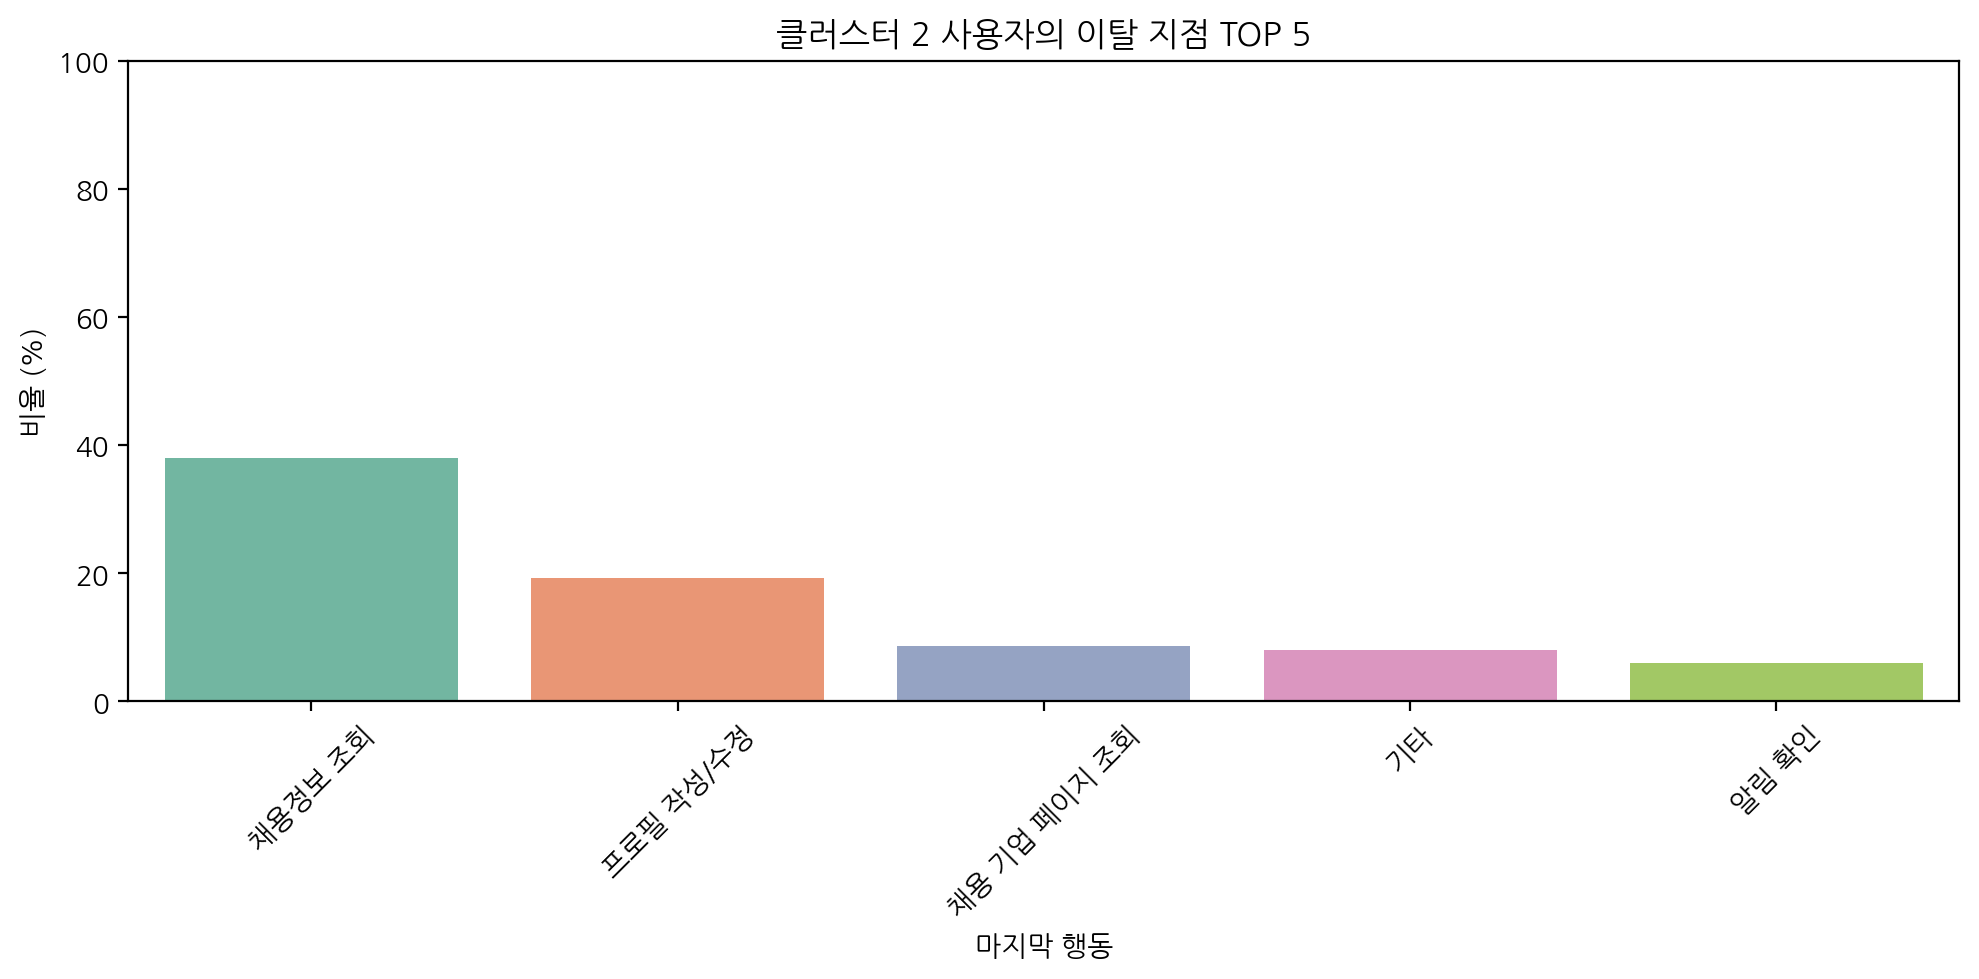

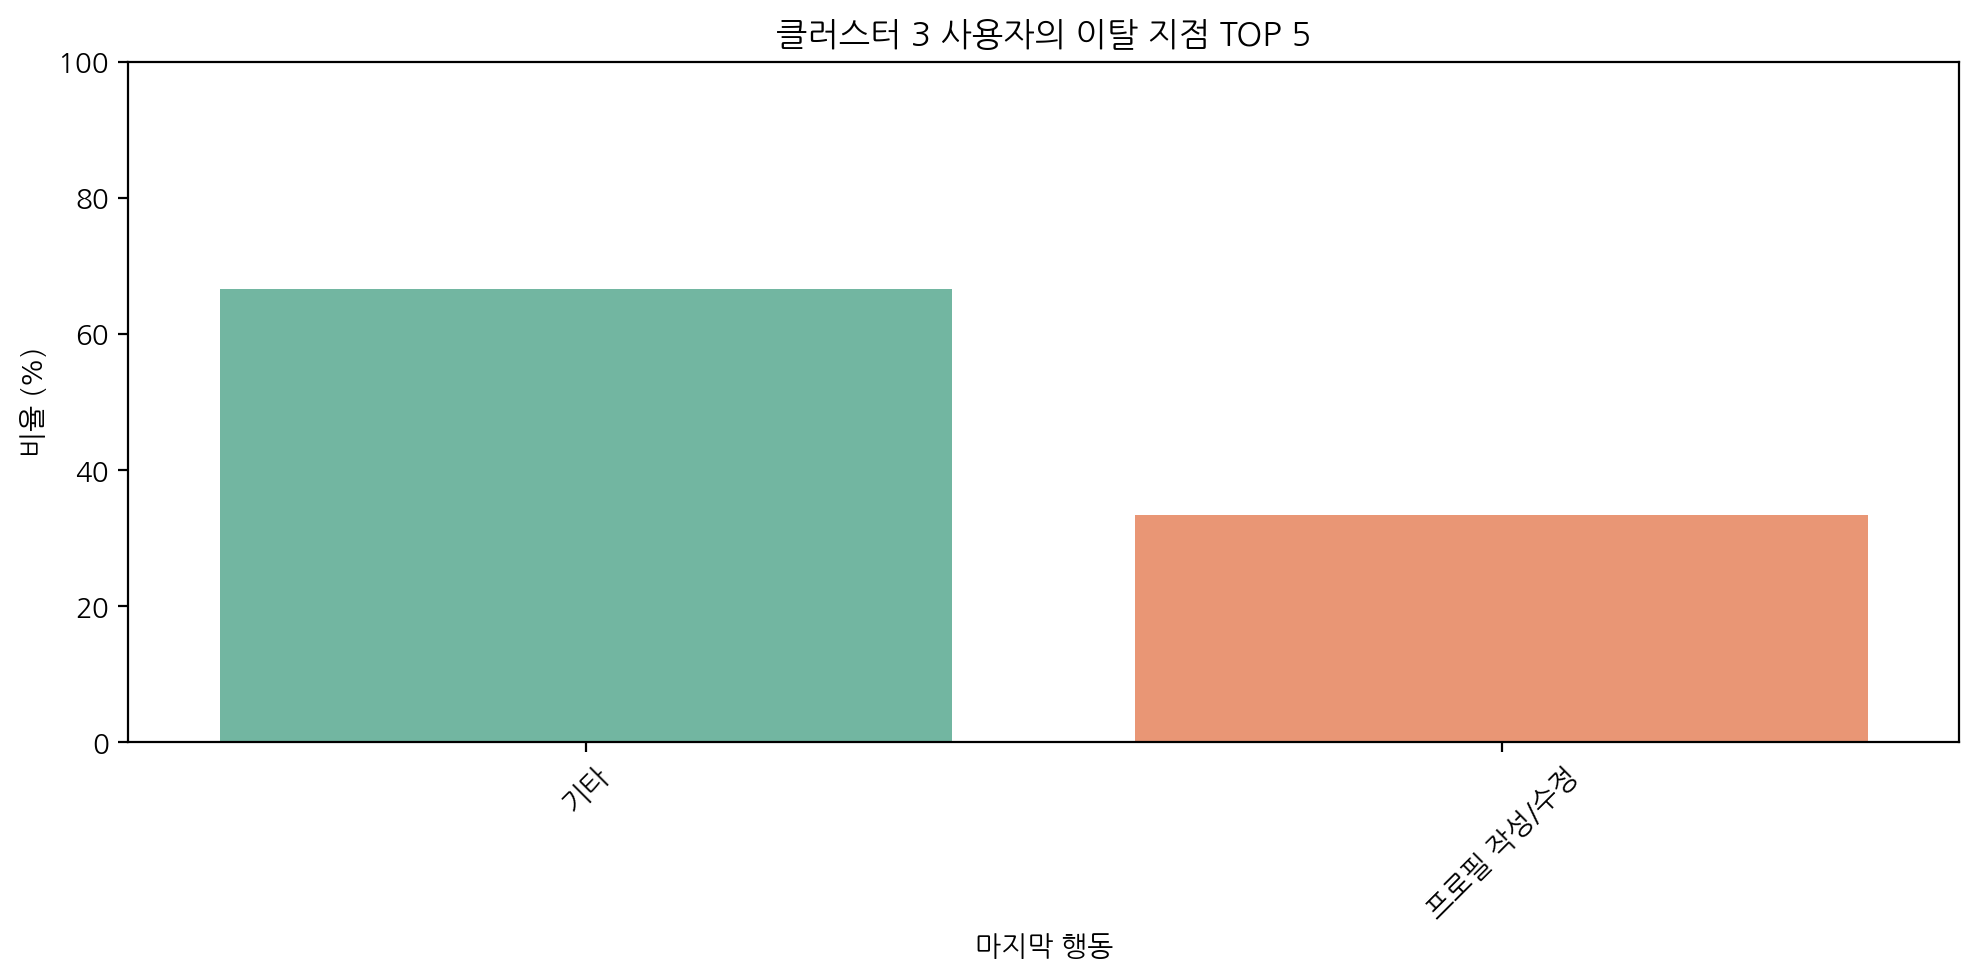

In [ ]:
for cluster_id in dropoff_counts['cluster'].unique():
    plt.figure(figsize=(10, 5))
    cluster_df = dropoff_counts[dropoff_counts['cluster'] == cluster_id].head(5)
    sns.barplot(data=cluster_df, x='action_type', y='percentage', palette='Set2')
    plt.title(f'클러스터 {cluster_id} 사용자의 이탈 지점 TOP 5')
    plt.ylabel('비율 (%)')
    plt.xlabel('마지막 행동')
    plt.xticks(rotation=45)
    plt.ylim(0, 100)
    plt.tight_layout()
    plt.show()

In [ ]:
dropoff_counts

cluster     action_type  count  percentage
20        0         채용정보 조회   1100   35.783995
22        0       프로필 작성/수정    611   19.876383
10        0        지원서 업데이트    416   13.532856
18        0    채용 기업 페이지 조회    260    8.458035
3         0              기타    216    7.026675
..      ...             ...    ...         ...
57        2        채용공고 북마크      2    1.333333
51        2           소셜 기능      1    0.666667
55        2  지원서 작성 - 제출 완료      1    0.666667
61        3              기타      2   66.666667
62        3       프로필 작성/수정      1   33.333333

[63 rows x 4 columns]

##### 5.3.3.3.1. 해석 결과

- ⚪ 잠자는 숲속의 유저
    - 주요 이탈 지점: 채용정보 조회 > 프로필 작성/수정 > 지원서 업데이트 > 채용 기업 페이지 조회 > 기타

    - 특징:

        - 채용정보 조회 단계에서 약 **30%**가 이탈, 초기 탐색 이후 빠르게 관심을 잃는 경향이 강합니다.

        - 이후 단계에서도 꾸준히 이탈이 이어지며, 지원까지 진입하는 비율이 상대적으로 낮습니다.

- 🟠 지원할래말래 유저
    - 주요 이탈 지점: 채용정보 조회 > 프로필 작성/수정 > 지원서 업데이트 > 채용 기업 페이지 조회 > 기타

    - 특징:

        - 이탈 순서는 클러스터 0과 같지만, 채용정보 조회 단계에서 이탈 비율이 다소 낮습니다. (약 30%보다 살짝 낮은 수준)

        - 프로필 작성이나 지원서 업데이트 단계까지 상대적으로 더 오래 머무르는 경향이 있습니다.

        - 초기 관심도가 더 높고, 작성 활동으로 이어질 가능성이 클러스터 0보다 조금 더 높습니다.

- 🟢 취업조아 유저
    - 주요 이탈 지점:
    - 채용정보 조회 > 프로필 작성/수정 > 채용 기업 페이지 조회 > 기타 > 알림 확인

    - 특징:

        - 채용정보 조회 단계 이탈 비율이 40% 이상으로, 클러스터 중 가장 높음 → 짧은 탐색 후 이탈 성향이 강합니다.

        - "알림 확인"이 Top5 안에 등장한 유일한 그룹으로, 알림을 통한 서비스 접속/행동이 활발합니다.

        - 다른 클러스터 대비, 지원 흐름 진입보다는 정보 소비 및 피드 알림에 반응하는 경향이 더 두드러집니다.


- 분석을 통해 얻은 인사이트
    - 잠자는 숲속의 유저는 초반 관심 유도와 빠른 이탈 방지를 위한 초기 페이지 개선이 필요합니다.

    - 지원할래말래 유저는 비교적 작성까지 유도할 수 있으므로, 지원서 작성 편의성 개선이 효과적일 것으로 보입니다.

    - 취업조아 유저는 알림 기능을 적극 활용하는 만큼, 맞춤형 알림 마케팅(ex. 추천 채용 알림, 이력서 업데이트 알림) 전략이 유효할 가능성이 높습니다.

#### 5.3.3.4. 클러스터별 지원 시간대 분포

- 클러스터별 사용자의 실제 지원 행동이 어느 시간대에 집중되는지를 파악하여, 맞춤형 알림 발송, UI 노출 최적화, 전략적 타이밍 유도 등에 활용하려 합니다.

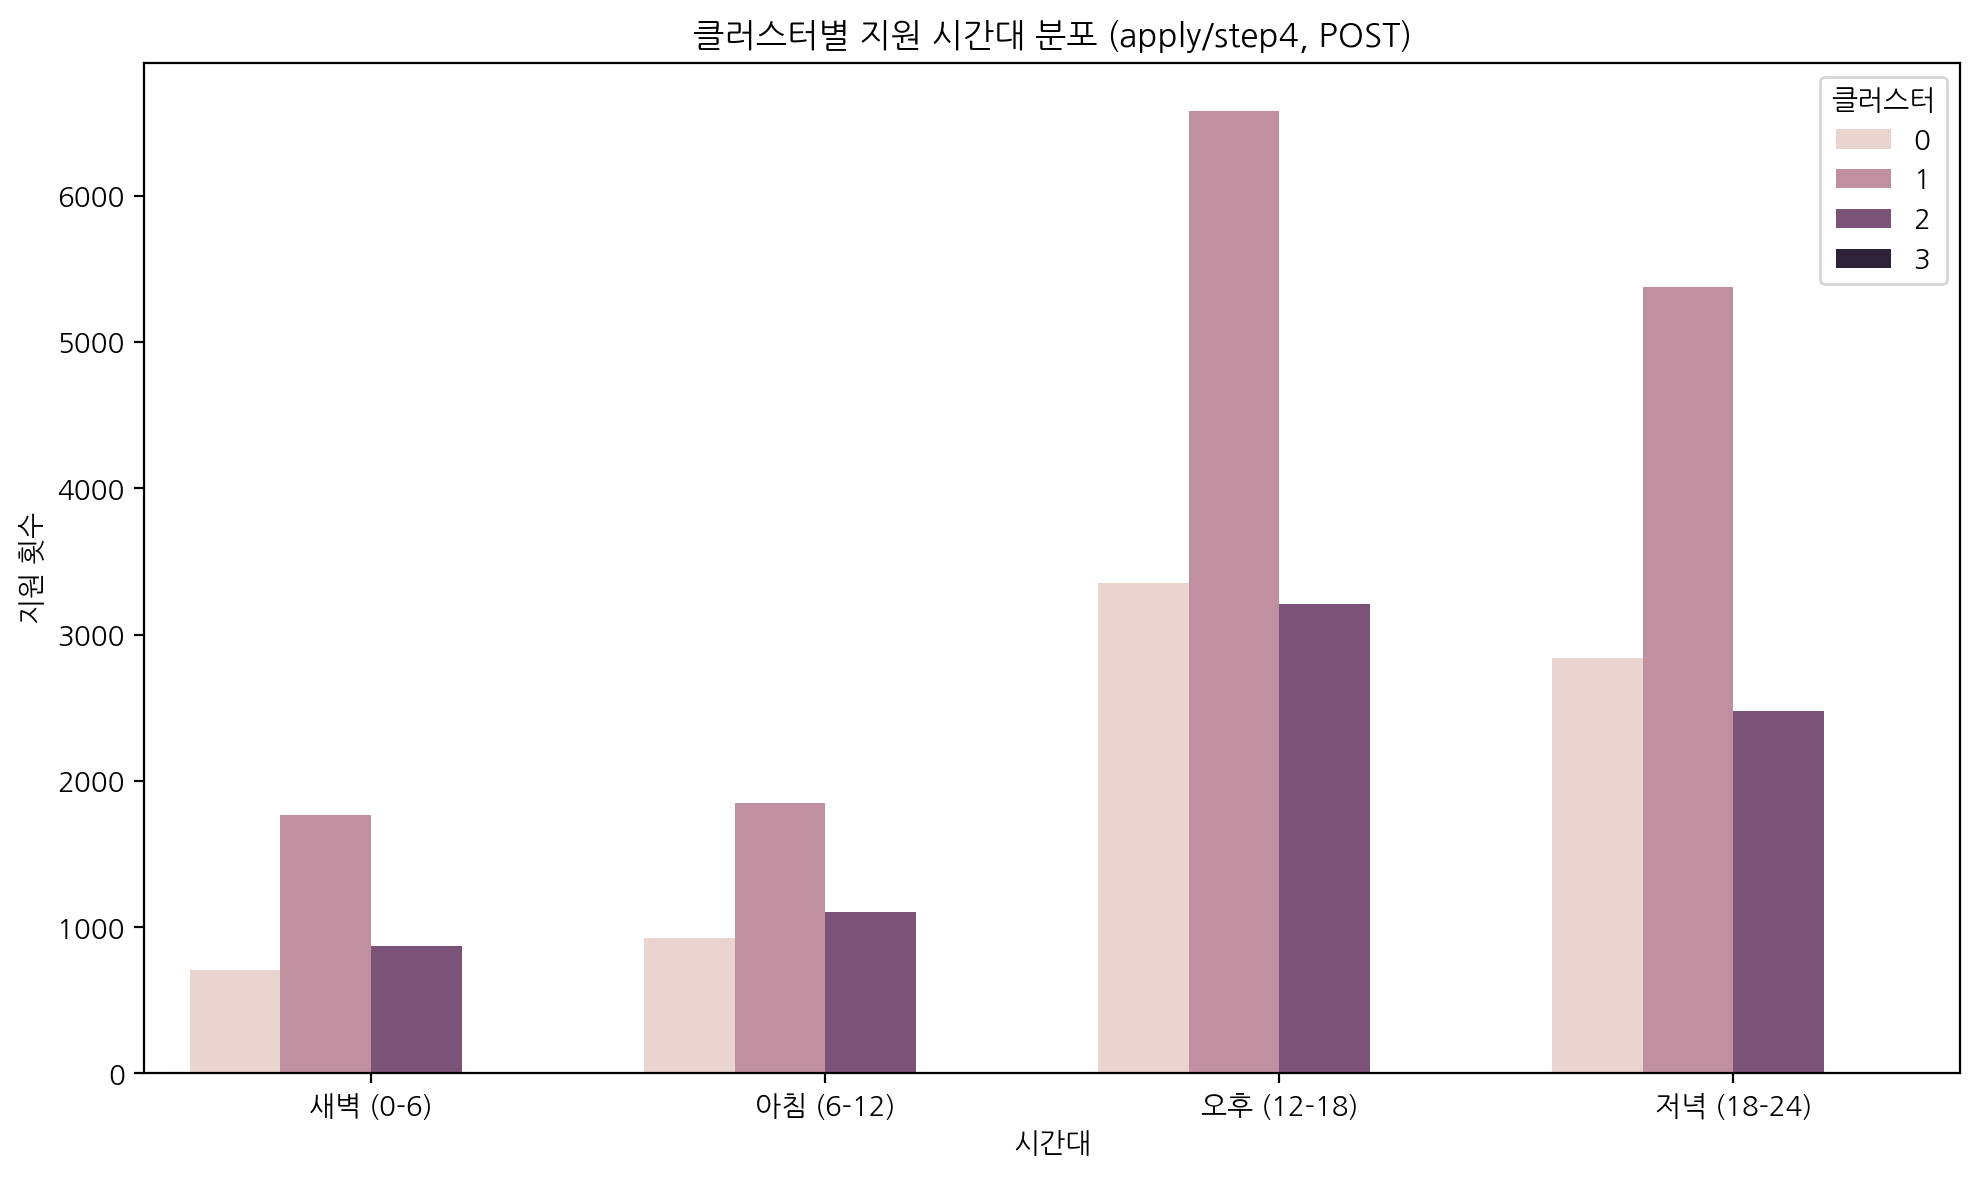

In [ ]:
# 시간대 분류 함수
def get_time_period(hour):
    if 6 <= hour < 12:
        return '아침 (6-12)'
    elif 12 <= hour < 18:
        return '오후 (12-18)'
    elif 18 <= hour < 24:
        return '저녁 (18-24)'
    else:
        return '새벽 (0-6)'

# timestamp를 datetime 형식으로 변환
post_signup_logs['timestamp_log'] = pd.to_datetime(post_signup_logs['timestamp_log'])

# 조건에 맞는 데이터 필터링
filtered_log_df = post_signup_logs[(post_signup_logs['URL'].str.contains('apply/step4')) & (post_signup_logs['method'] == 'POST')]

# 시간대 컬럼 추가
filtered_log_df['hour'] = filtered_log_df['timestamp_log'].dt.hour
filtered_log_df['time_period'] = filtered_log_df['hour'].apply(get_time_period)

# 클러스터별 시간대 지원 수 시각화
plt.figure(figsize=(10, 6))
sns.countplot(data=filtered_log_df, x='time_period', hue='cluster', order=['새벽 (0-6)', '아침 (6-12)', '오후 (12-18)', '저녁 (18-24)'])
plt.title('클러스터별 지원 시간대 분포 (apply/step4, POST)')
plt.xlabel('시간대')
plt.ylabel('지원 횟수')
plt.legend(title='클러스터')
plt.tight_layout()
plt.show()

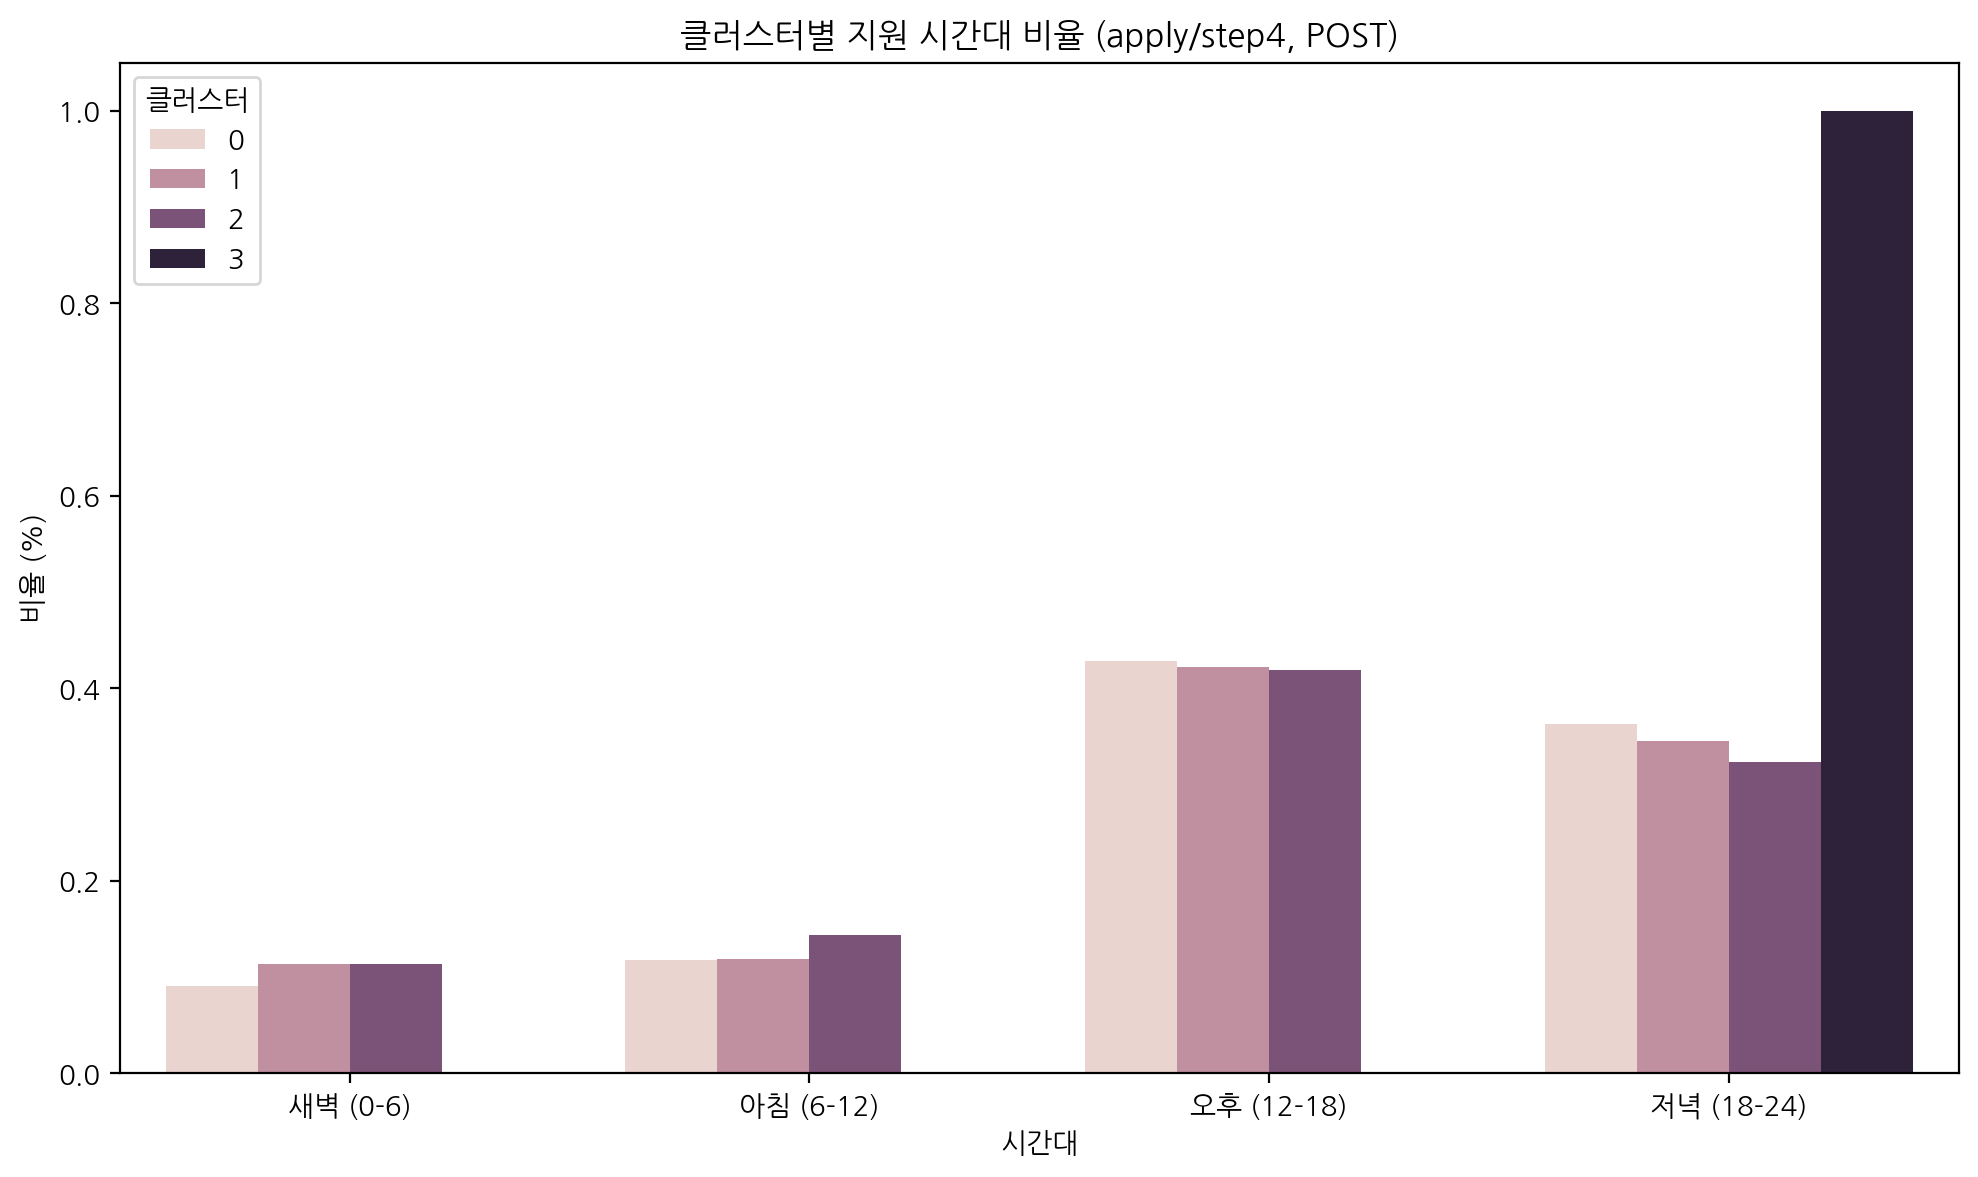

In [ ]:
# 시간대 분류 함수
def get_time_period(hour):
    if 6 <= hour < 12:
        return '아침 (6-12)'
    elif 12 <= hour < 18:
        return '오후 (12-18)'
    elif 18 <= hour < 24:
        return '저녁 (18-24)'
    else:
        return '새벽 (0-6)'

# timestamp를 datetime 형식으로 변환
post_signup_logs['timestamp_log'] = pd.to_datetime(post_signup_logs['timestamp_log'])

# 조건에 맞는 데이터 필터링
filtered_log_df = post_signup_logs[
    (post_signup_logs['URL'].str.contains('apply/step4')) &
    (post_signup_logs['method'] == 'POST')
].copy()

# 시간대 컬럼 추가
filtered_log_df['hour'] = filtered_log_df['timestamp_log'].dt.hour
filtered_log_df['time_period'] = filtered_log_df['hour'].apply(get_time_period)

# 시간대별 클러스터 내 비율 계산
cluster_counts = filtered_log_df.groupby('cluster')['time_period'].value_counts(normalize=True).rename('비율').reset_index()

# 시간대 정렬 순서 지정
time_order = ['새벽 (0-6)', '아침 (6-12)', '오후 (12-18)', '저녁 (18-24)']
cluster_counts['time_period'] = pd.Categorical(cluster_counts['time_period'], categories=time_order, ordered=True)

# 시각화
plt.figure(figsize=(10, 6))
sns.barplot(data=cluster_counts, x='time_period', y='비율', hue='cluster')
plt.title('클러스터별 지원 시간대 비율 (apply/step4, POST)')
plt.xlabel('시간대')
plt.ylabel('비율 (%)')
plt.legend(title='클러스터')
plt.tight_layout()
plt.show()

In [ ]:
cluster_counts

cluster time_period        비율
0         0  오후 (12-18)  0.428498
1         0  저녁 (18-24)  0.362684
2         0   아침 (6-12)  0.118339
3         0    새벽 (0-6)  0.090479
4         1  오후 (12-18)  0.422689
5         1  저녁 (18-24)  0.345217
6         1   아침 (6-12)  0.118777
7         1    새벽 (0-6)  0.113317
8         2  오후 (12-18)  0.418984
9         2  저녁 (18-24)  0.323280
10        2   아침 (6-12)  0.143883
11        2    새벽 (0-6)  0.113853
12        3  저녁 (18-24)  1.000000

##### 5.3.3.4.1. 해석 결과

⚪ 잠자는 숲속의 유저
- 전체 지원량은 클러스터 1보다 낮지만, 오후~저녁 시간대에 집중되는 전형적인 활동 패턴을 보입니다.

- 새벽 시간대 활동은 가장 낮습니다.
    - 일반적인 직장인 혹은 학생층의 가능성이 큽니다.


🟠 지원할래말래 유저
- 가장 활발한 사용자 집단으로, 전체 지원량에서 가장 높은 비중을 차지합니다.

- **오후(12–18시)**와 저녁(18–24시) 시간대에 지원이 집중됩니다.

- 새벽, 아침 시간대에도 상대적으로 높은 참여율 유지하고 있습니다.
    - 지원 의지가 강한 적극적 사용자로 해석이 가능합니다.

🟢 취업조아 유저
- 클러스터 0과 마찬가지로 오후~저녁 시간대에 지원 집중되어 있습니다.

- 하지만 새벽(0–6시) 시간대의 활동 비중이 두드러짐
    - 비정형 근무 시간대나 자율적인 생활 패턴을 가진 사용자군 포함될 가능성이 있습니다.

🟣 이상치
- 활동 시간이 저녁(18-24)시간에 몰려있는 것으로 보아 다시 한 번, 이상치인 것을 확인 할 수 있습니다.

📌 요약 결과
- 클러스터 모두 오후와 저녁 시간에 많은 활동을 보이고 있지만, 새벽과 아침에서 클러스터별로 약간의 차이가 발생하는 것을 볼 수 있습니다.


#### 5.3.3.5 클러스터별 사이트 방문 관련 분석

 - 클러스터 내에서 평균 재방문 일수 및 최근 30일 이상 서비스에 미접속한 유저의 비율을 파악하고자 합니다.

In [ ]:
post_signup_logs['date'] = pd.to_datetime(post_signup_logs['date'])

# 유저가 하루에 여러 번 방문해도 1일 1회로 간주
daily_visits = post_signup_logs[['user_uuid', 'date', 'cluster']].drop_duplicates()

visit_counts = daily_visits.groupby(['cluster', 'user_uuid']).size().reset_index(name='visit_days')

# 클러스터별 평균 방문일 수
avg_visits = visit_counts.groupby('cluster')['visit_days'].agg(['mean', 'median', 'max', 'min']).reset_index()
print("📊 클러스터별 평균 재방문 일수:")
print(avg_visits)

📊 클러스터별 평균 재방문 일수:
   cluster        mean  median  max  min
0        0   11.601171     9.0  101    1
1        1   42.835418    36.0  205    3
2        2  107.660000    96.0  274    6
3        3  281.000000   335.0  477   31


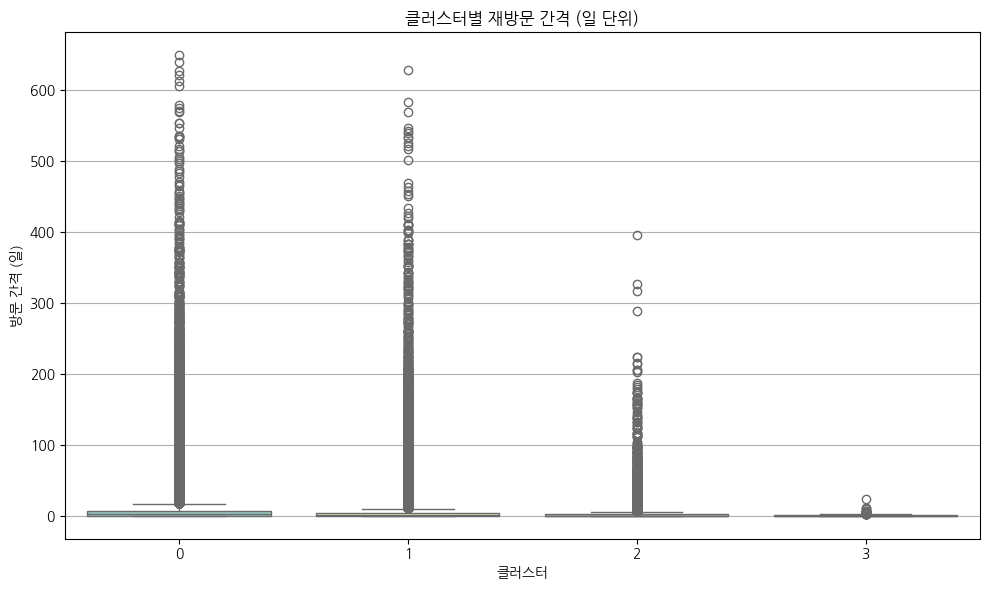

In [ ]:
# 유저별 방문일 정렬 후 간격 계산
gap_data = []

for (cluster, user), group in daily_visits.groupby(['cluster', 'user_uuid']):
    sorted_dates = group.sort_values('date')['date'].tolist()
    gaps = [(sorted_dates[i+1] - sorted_dates[i]).days for i in range(len(sorted_dates) - 1)]
    for g in gaps:
        gap_data.append({'cluster': cluster, 'gap_days': g})

gap_df = pd.DataFrame(gap_data)

plt.figure(figsize=(10, 6))
sns.boxplot(data=gap_df, x='cluster', y='gap_days', palette='Set3')
plt.title('클러스터별 재방문 간격 (일 단위)')
plt.xlabel('클러스터')
plt.ylabel('방문 간격 (일)')
plt.grid(axis='y')
plt.tight_layout()
plt.show()

In [ ]:
# 1. timestamp를 datetime 형식으로 변환 (이미 되어있다면 생략 가능)
post_signup_logs['timestamp_log'] = pd.to_datetime(post_signup_logs['timestamp_log'])

# 2. 가장 최근 날짜 구하기 (date만 추출)
latest_date = post_signup_logs['timestamp_log'].dt.date.max()

# 3. 유저별 마지막 접속일 구하기
last_seen = post_signup_logs.groupby('user_uuid')['timestamp_log'].max().reset_index()
last_seen['last_seen_date'] = pd.to_datetime(last_seen['timestamp_log']).dt.date  # <- 여기를 date 타입으로 확실히 변환
last_seen['days_since_last'] = (latest_date - last_seen['last_seen_date']).apply(lambda x: x.days)

# 4. 클러스터 정보 붙이기
cluster_info = post_signup_logs[['user_uuid', 'cluster']].drop_duplicates()
last_seen = last_seen.merge(cluster_info, on='user_uuid', how='left')

# 5. 클러스터별 30일 이상 미접속 유저 수와 전체 유저 수
inactive_by_cluster = last_seen[last_seen['days_since_last'] > 30].groupby('cluster')['user_uuid'].count()
total_by_cluster = last_seen.groupby('cluster')['user_uuid'].count()

# 6. 비율 계산
inactive_ratio = (inactive_by_cluster / total_by_cluster * 100).round(2)

# 7. 보기 좋게 출력
result = pd.DataFrame({
    '전체 유저 수': total_by_cluster,
    '30일 이상 미접속 유저 수': inactive_by_cluster,
    '미접속 비율 (%)': inactive_ratio
}).fillna(0).astype({'30일 이상 미접속 유저 수': 'int'})

print("\n[클러스터별 30일 이상 미접속 유저 분석 결과]")
print(result)


[클러스터별 30일 이상 미접속 유저 분석 결과]
         전체 유저 수  30일 이상 미접속 유저 수  미접속 비율 (%)
cluster                                      
0           3074             2634       85.69
1           1519             1097       72.22
2            150               81       54.00
3              3                0        0.00


##### 5.3.3.5.1. 해석 결과

⚪잠자는 숲속의 유저
- 전체 유저 수: 3,074명

- 30일 이상 미접속 유저 수: 2,634명

- 미접속 비율: 85.69%

- 클러스터 0은 전체 유저 수가 가장 많은 그룹이며, 동시에 미접속 비율도 가장 높은 것으로 나타났습니다. 이는 해당 클러스터에 속한 유저들이 전반적으로 이탈 가능성이 높거나, 서비스에 대한 관심도가 낮을 수 있음을 시사합니다. 적극적인 리인게이지먼트(re-engagement) 전략이 필요할 것으로 보입니다.

🟠지원할래말래 유저
- 전체 유저 수: 1,519명

- 30일 이상 미접속 유저 수: 1,097명

- 미접속 비율: 72.22%

- 클러스터 1 역시 높은 비율의 미접속 유저가 포함된 그룹입니다. 클러스터 0보다는 낮지만 여전히 이탈 가능성이 높은 그룹으로 판단되며, 서비스 이용 유도를 위한 마케팅 또는 기능 개선이 필요할 수 있습니다.

🟢취업조아 유저
- 전체 유저 수: 150명

- 30일 이상 미접속 유저 수: 81명

- 미접속 비율: 54.00%

- 클러스터 2는 미접속 비율이 비교적 낮은 편이지만, 전체 유저 수가 적기 때문에 절대 수치로는 큰 영향력이 없을 수 있습니다. 다만, 절반 이상의 유저가 최근 30일간 서비스를 이용하지 않았기 때문에 지속적인 모니터링이 요구됩니다.

### 5.3.4. 클러스터 별 정리

|클러스터 | 이름 | 유저 수 | 설명 요약
|-----|-----|---|-------------------------------
|0|  💤잠자는 숲속의 유저|3,074| 	전체 액션수(473), 활동일수(12일), 평균 행동 수(56) 등 비교적 적은 수준.
| | | |검색, 프로필 작성, 채용정보 조회, 채용기업 페이지 조회 등 탐색 위주의 행동이 주를 이룸|
| |  | |지원서 작성은 일부 있으나 '제출 완료' 수치는 낮음(2.5)|
| |  | |서비스에 관심은 있었지만 본격적인 전환까지 이어지지 않은 관망형 유저|
|1|	🛠️ 지원할래말래 유저|	1,519|	활동일수가 44일로 상당히 길고 '지원서 작성', '추천 서비스', '프로필 수정' 등 전환을 위한 준비 활동이 많음|
| |  | |'제출 완료'도 평균 10건으로 높은 편, 다양한 기능을 적극적으로 사용하면서 전환을 시도하는 유저군|
| |  | |적극적으로 구직을 준비하고 있으며, 전환 직전 단계까지 온 유저|
|2|	🚀 취업조아 유저|	150|	평균 112일 동안 7,700 이상의 행동을 보임, 추천서비스(2,677), 채용기업 페이지(232), 지원서 제출(52) 등 작성 단계가 모두 활발함
| |  | |채용공고 북마크, 기업 북마크, 알림 확인 등 고급 기능도 적극 활용|
| |  | |서비스에 정착했으며 다수의 전환을 실제로 이룬 핵심 사용자|
|3|	⚠️이상치|	3|	총 행동 수가 24,000건으로 이례적으로 높음|
| |  | |정상적인 유저로 보기 어려운 자동화 or 테스트 계정, 분석 대상에서 제외

### 5.3.5. 클러스터 분석 결론 및 개선 방향

0️⃣ 잠자는 숲속의 유저 (클러스터 0⚪)

    - 활동일 수는 짧지만 접속 시에는 집중적으로 탐색 활동을 보입니다.

    - 주로 채용공고 조회, 프로필 작성/수정에 머무르고, 실제 지원으로는 이어지지 않습니다.

    - 높은 공고 북마크율에도 불구하고 전환율은 낮습니다.

    - 30일 이상 미접속 비율이 85%를 넘으며, 이탈 가능성이 매우 높습니다.

- 개선 방향 제안
    - 초기 탐색 후 이탈 방지: 추천 공고, 관심 기업을 기반으로 '1:1 맞춤 알림'을 제공합니다.

    - 간편 지원 유도: ‘1분 지원’, ‘빠른 지원서 작성’ 기능을 도입합니다.

    - 관심도 유지: 북마크한 공고의 마감 임박 알림 발송하여 행동을 촉진합니다.

    - 즉시 행동 유도: 북마크한 공고에 "지금 지원하면 이력서 검토 무료!" 같은 프로모션 배너를 삽입합니다.

1️⃣ 지원할래말래 유저 (클러스터 1🟠)

    - 44일 동안 꾸준히 활동하며, 지원서 step1~3까지는 적극적으로 작성합니다.

    - 제출 직전 단계에서 이탈하는 경우가 많습니다.

    - 기업 북마크 후 지원으로 이어지는 전환율이 높습니다.(약 40%)

    - 미접속 비율이 72%로 여전히 높은 편이나, 클러스터 0보다는 낮습니다.

- 개선 방향 제안
    - 마지막 한 걸음 독려: ‘미완성 지원서’ 리마인드 알림을 발송합니다.

    - 제출 장벽 낮추기: 지원서 검토 지원 기능을(예: AI 이력서 체크, 문구 추천) 도입합니다.

    - 기업 매칭 강화: 북마크한 기업과 유사한 채용 공고 추천 기능 강화합니다.

2️⃣ 취업조아 유저 (클러스터 2🟢)

    - 가장 활발하고 전략적으로 활동하는 유저입니다.

    - 가입 후 지원서 작성률은 낮지만, 일단 작성하면 최종 제출까지 이어지는 비율이 가장 높습니다.

    - 새벽 시간대 활동이 뚜렷해 비정형 패턴 사용자도 포함된 것으로 보입니다.

    - 미접속 비율은 54%로 비교적 낮으나, 지속 관리가 필요합니다.

- 개선 방향 제안
    - 심화 맞춤형 알림 제공: 지원 진행 상황, 추천 채용공고 업데이트 실시간 발송합니다.

    - 성취 기반 리워드 제공: 지원서 제출 5회 이상 시 포인트 제공 → 향후 유료 서비스 할인 쿠폰을 지급합니다.

    - 새벽 활동 사용자 최적화: "야간 채용 속보", "자정 특급 공고" 같은 야간 전용 캠페인을 운영합니다.
    - 고객 의견 수집 및 반영: 핵심 유저 대상 만족도 조사 → 서비스 개선 인사이트를 수집합니다.

# 6. 결론 및 전략 제시

## 6.1. 고객 만족도 측면

## 6.2. 플랫폼 수익성 측면

## 6.3. 한계점 및 향후 과제(?)